## Preprocessing de la Data

In [49]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
pip install hmmlearn

   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/127.0 kB ? eta -:--:--
   ------------------- -------------------- 61.4/127.0 kB 3.2 MB/s eta 0:00:01
   ------------------------- ------------- 81.9/127.0 kB 762.6 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/127.0 kB 762.6 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/127.0 kB 762.6 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/127.0 kB 762.6 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/127.0 kB 762.6 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/127.0 kB 762.6 kB/s eta 0:00:01
   -------------------------------------- 127.0/127.0 kB 311.5 kB/s eta 0:00:00
Note:


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from hmmlearn.hmm import GaussianHMM
from tqdm import tqdm



In [53]:
# Charger les fichiers
df = pd.read_excel(r"10_Sensor_Data_with_Rul.xlsx")

# Convertir les dates
df['Heure'] = pd.to_datetime(df['Heure'])

In [54]:
df.head()


Heure  Diff_Temps_Minutes  Temp échappement Droit 540  \
0 2025-04-08 10:06:33                0.00                         510   
1 2025-04-08 10:04:32                2.00                         510   
2 2025-04-08 10:02:33                2.02                         500   
3 2025-04-08 10:00:32                2.00                         493   
4 2025-04-08 09:58:31                2.00                         474   

   Temp échappement Droit 540_Panne  RUL_minute    RUL_heure    RUL_jour  
0                                 0   306773.83  5112.897167  213.037382  
1                                 0   306771.83  5112.863833  213.035993  
2                                 0   306769.81  5112.830167  213.034590  
3                                 0   306767.81  5112.796833  213.033201  
4                                 0   306765.81  5112.763500  213.031812

In [55]:
df.columns

Index(['Heure', 'Diff_Temps_Minutes', 'Temp échappement Droit 540',
       'Temp échappement Droit 540_Panne', 'RUL_minute', 'RUL_heure',
       'RUL_jour'],
      dtype='object')

In [6]:
df.drop(columns=['Heure', 'Engin']).describe()

Temp échappement Droit 540  Temp échappement gauche 538  \
count                92366.000000                 92366.000000   
mean                   415.684570                   414.433179   
std                    101.516914                    98.861474   
min                     30.000000                    30.000000   
25%                    388.000000                   390.000000   
50%                    451.000000                   447.000000   
75%                    480.000000                   477.000000   
max                    644.000000                   663.000000   

       Temp liquide refroidissement 525  Temp sortie convertisseur 544  \
count                      92345.000000                   92341.000000   
mean                          89.364773                     100.755374   
std                            9.309538                      14.275762   
min                            7.000000                      15.000000   
25%                           87.000000                      96.000000   
50%                           89.000000                     103.000000   
75%                           93.000000                     109.000000   
max                          118.000000                     139.000000   

       Pression embrayage impeller 536  Température Essieux avant 531  \
count                     92360.000000                   88379.000000   
mean                       1278.492053                      47.783682   
std                         654.704840                       9.455236   
min                          56.000000                       9.000000   
25%                         565.000000                      43.000000   
50%                        1362.000000                      50.000000   
75%                        1926.000000                      54.000000   
max                        2709.000000                      71.000000   

       Régime moteur 530   Température huile direction 541  \
count        87850.000000                     88379.000000   
mean          1490.611155                        56.745935   
std            280.277237                         9.717864   
min            100.000000                        10.000000   
25%           1443.000000                        52.000000   
50%           1624.000000                        57.000000   
75%           1657.000000                        63.000000   
max           1869.000000                        85.000000   

       Température huile freinage 522  Température PTO avant 532  \
count                    88363.000000               89545.000000   
mean                        81.485565                  64.877481   
std                         14.183022                  10.689861   
min                         10.000000                   1.000000   
25%                         76.000000                  61.000000   
50%                         84.000000                  67.000000   
75%                         90.000000                  72.000000   
max                        129.000000                  85.000000   

       Pression huile moteur 529  
count               89177.000000  
mean                  443.727654  
std                    59.078321  
min                     1.000000  
25%                   431.000000  
50%                   450.000000  
75%                   467.000000  
max                   733.000000

In [56]:
df.shape

(92366, 7)

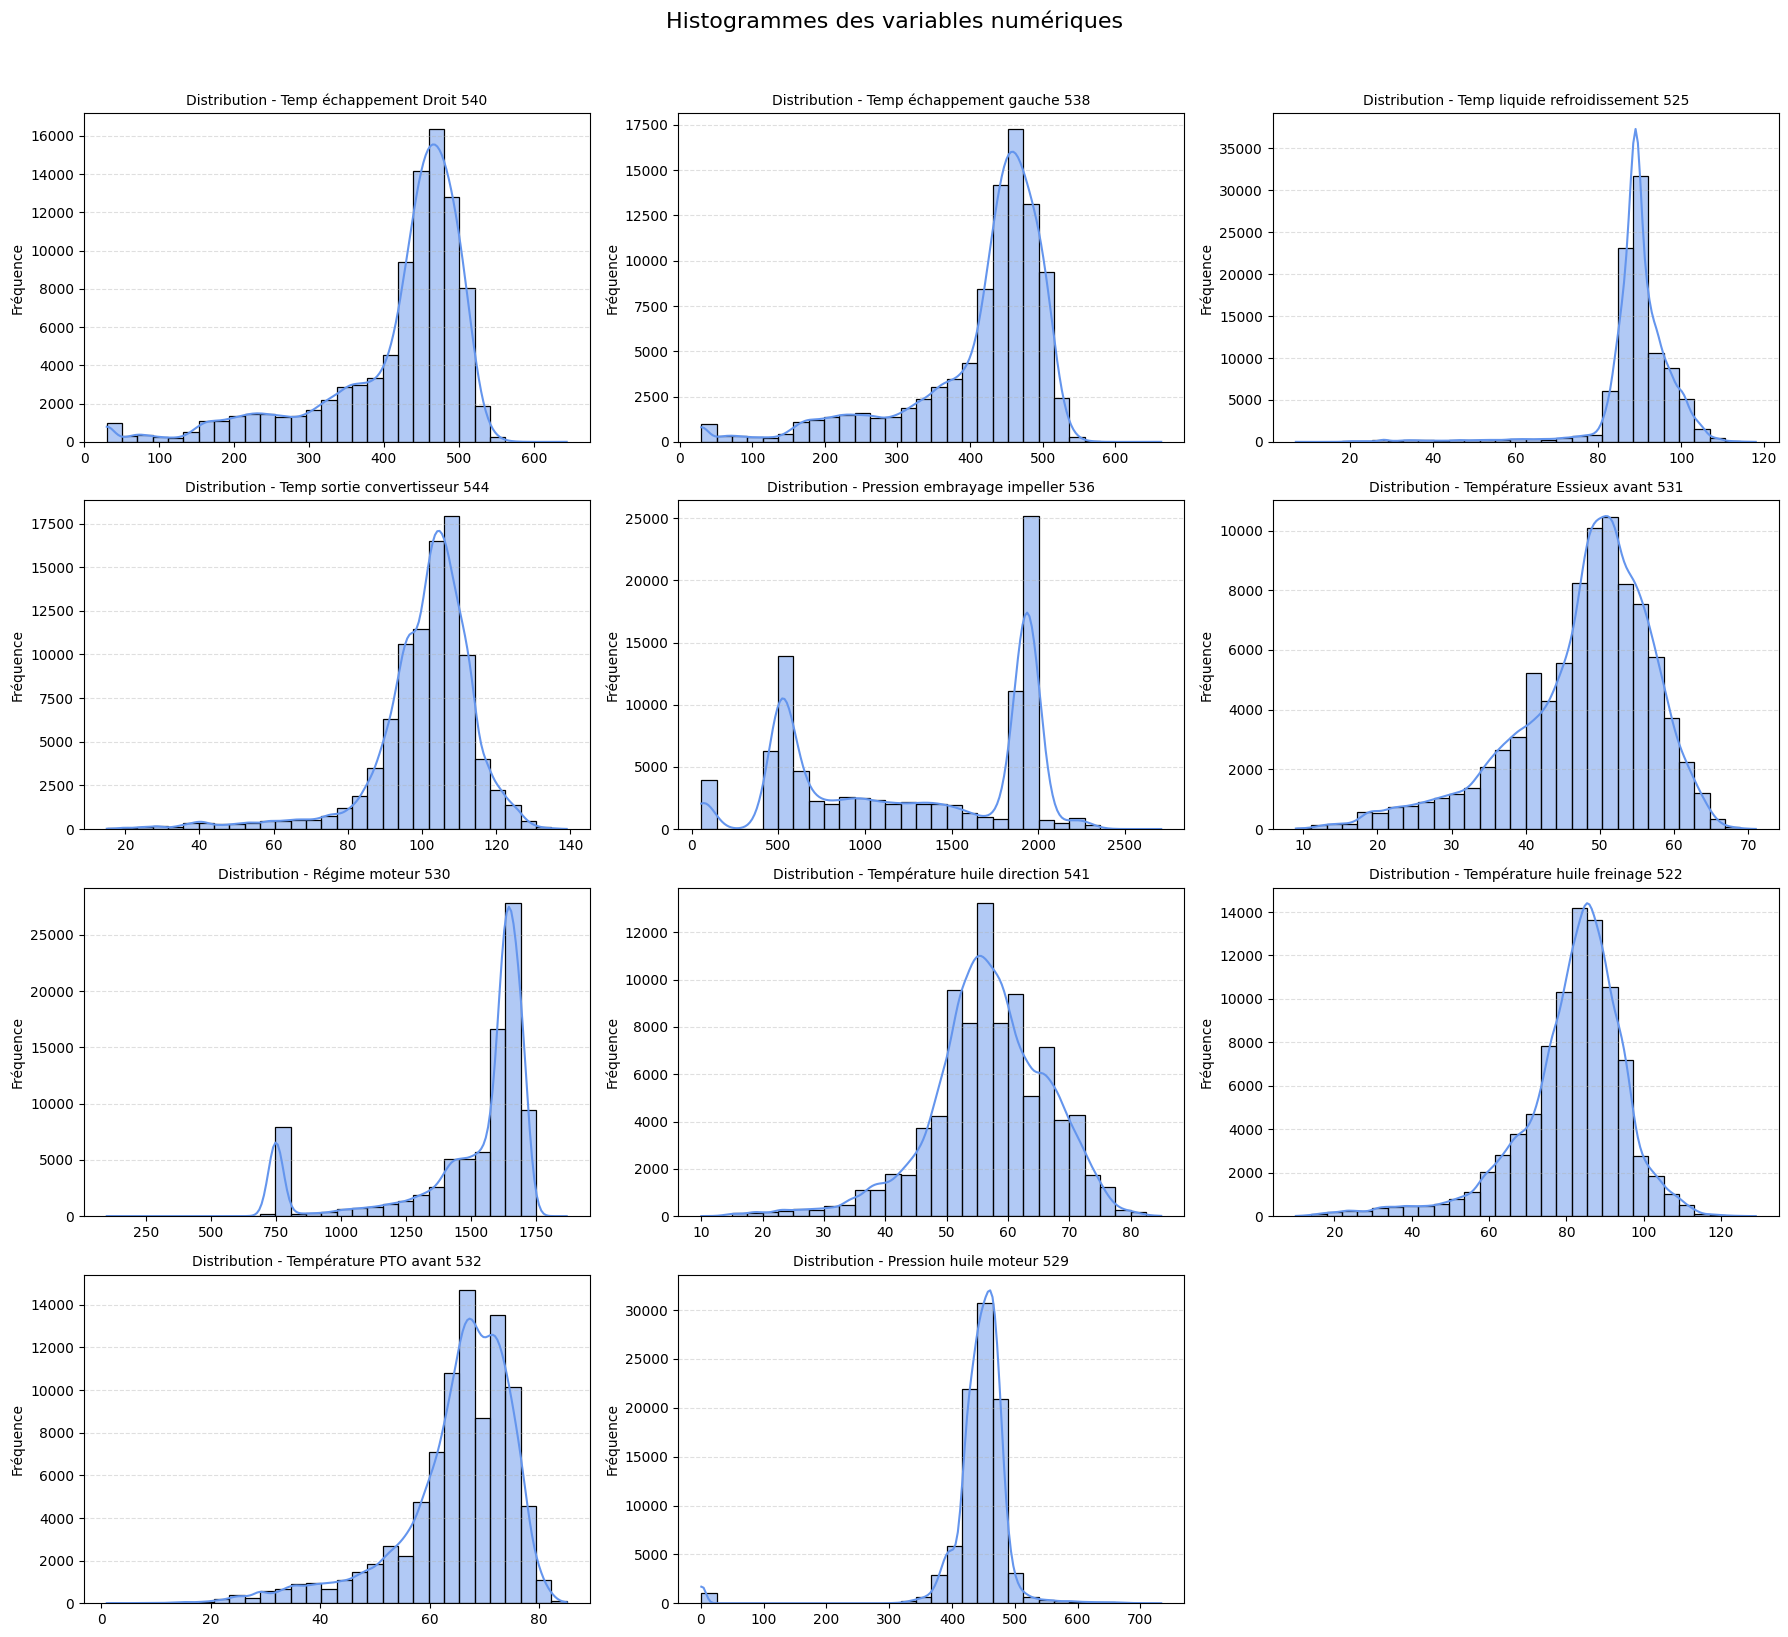

In [8]:
# Étape 1 : Sélection des colonnes numériques
colonnes_numeriques = df.select_dtypes(include="number").columns

# Étape 2 : Définir la disposition de la grille (ex : 3 colonnes)
n_cols = 3
n_rows = int(np.ceil(len(colonnes_numeriques) / n_cols))

# Étape 3 : Création de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Pour itération facile

# Étape 4 : Tracer chaque histogramme
for i, col in enumerate(colonnes_numeriques):
    sns.histplot(data=df, x=col, ax=axes[i], bins=30, kde=True, color='cornflowerblue')
    axes[i].set_title(f"Distribution - {col}", fontsize=10)
    axes[i].set_ylabel("Fréquence")
    axes[i].set_xlabel("")
    axes[i].grid(axis='y', linestyle='--', alpha=0.4)

# Étape 5 : Supprimer les axes vides s'il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Étape 6 : Mise en page propre
plt.suptitle("Histogrammes des variables numériques", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

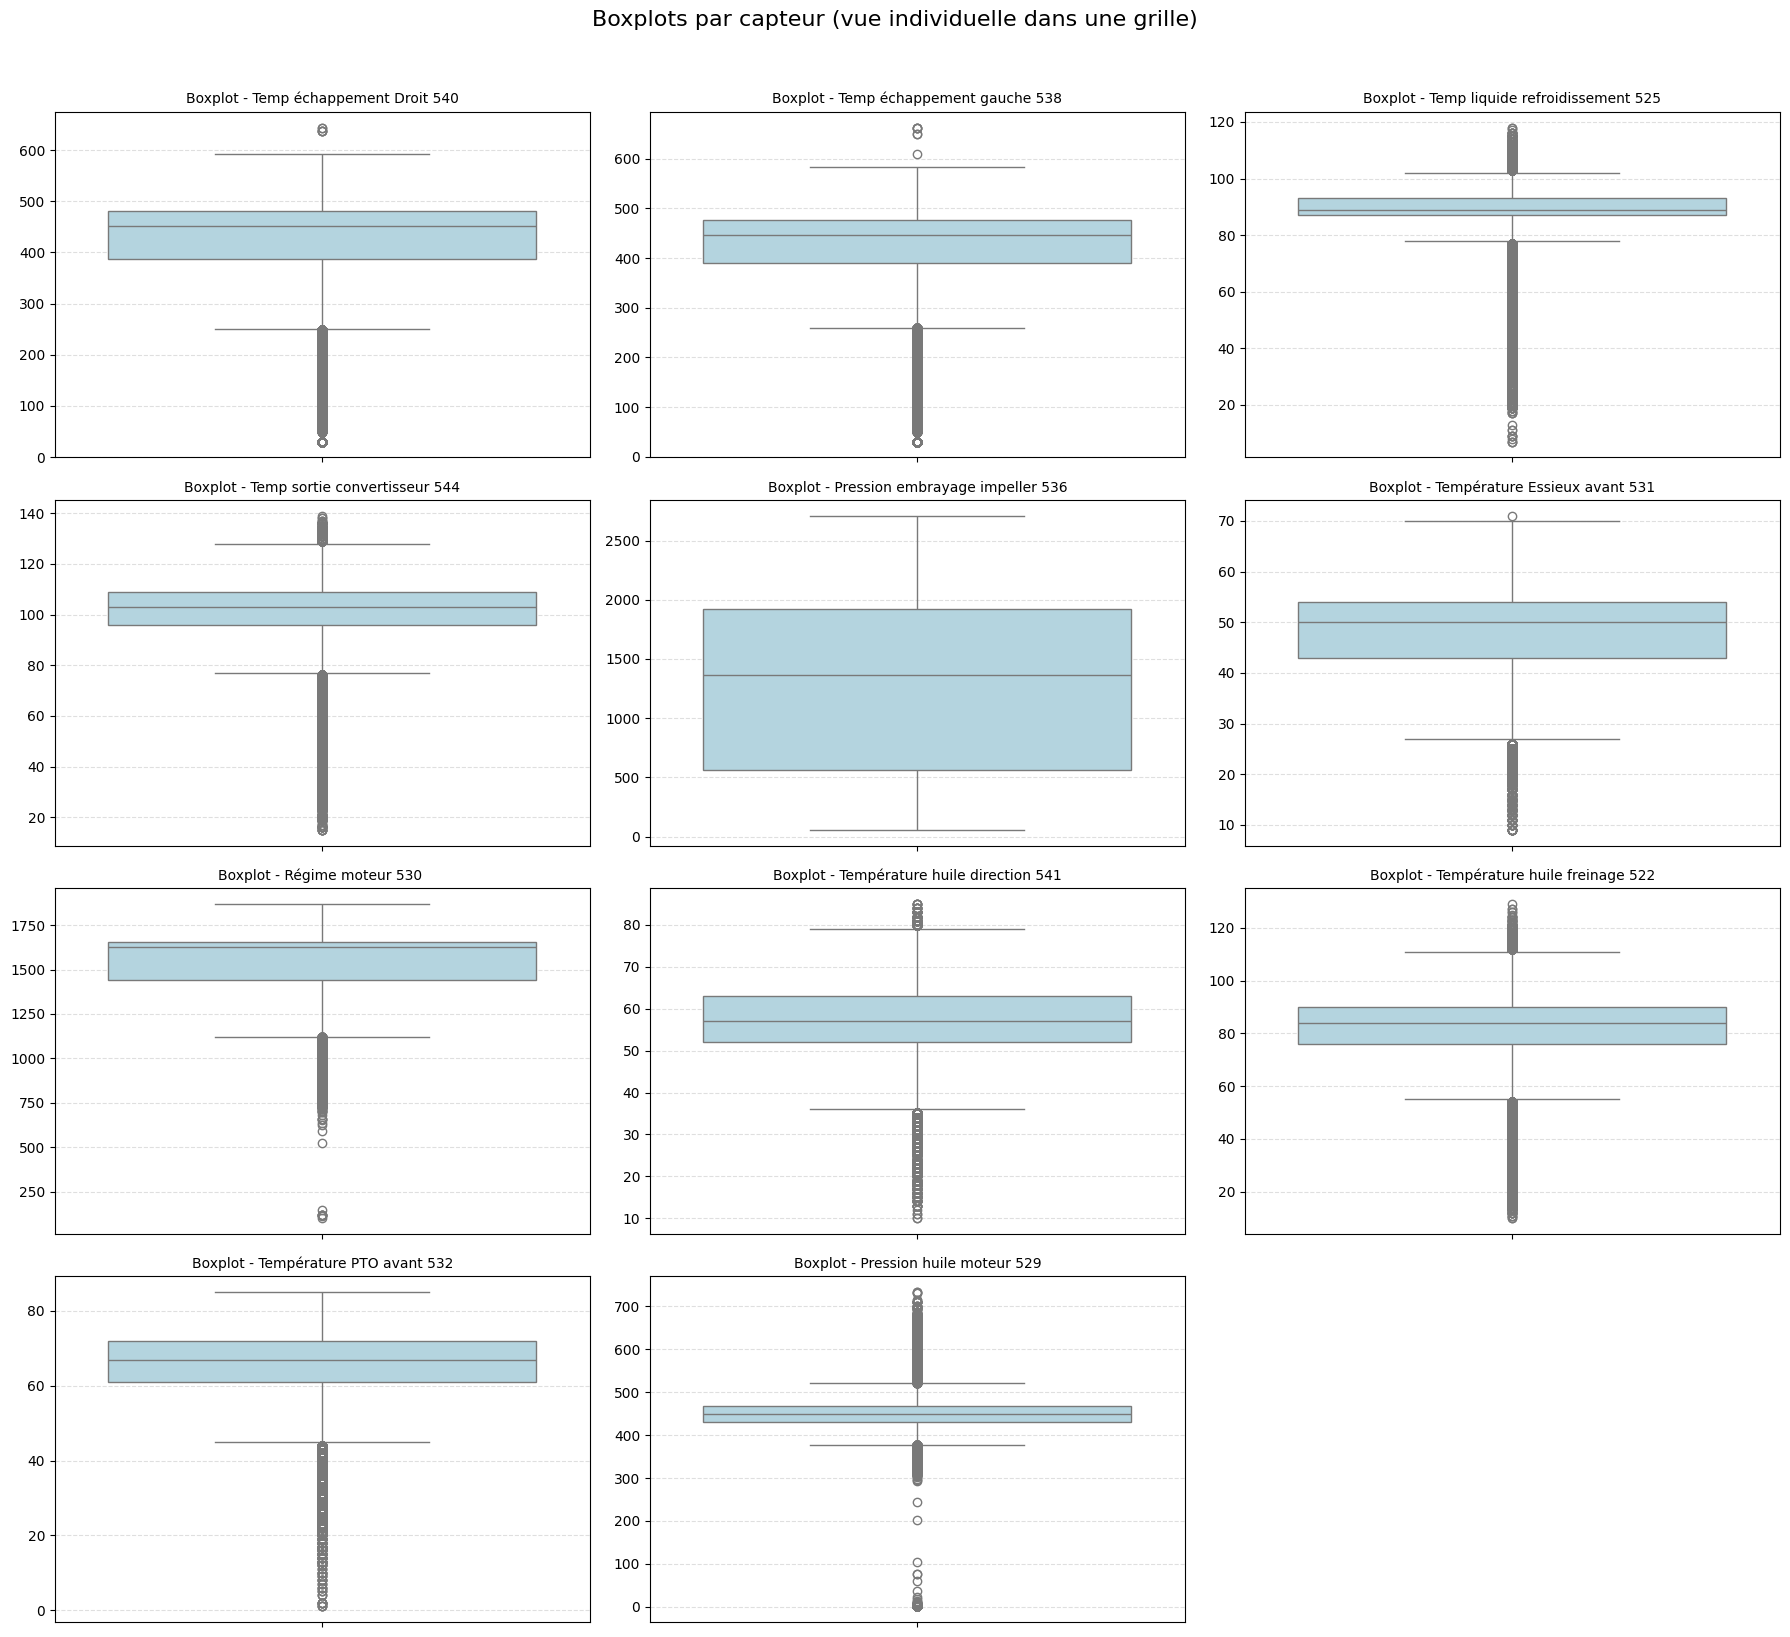

In [ ]:
# Étape 1 : Sélection des colonnes numériques
colonnes_numeriques = df.select_dtypes(include="number").columns

# Étape 2 : Définir la disposition de la grille (par ex. 3 colonnes)
n_cols = 3
n_rows = int(np.ceil(len(colonnes_numeriques) / n_cols))

# Étape 3 : Création de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Aplatir pour itération facile

# Étape 4 : Tracer chaque boxplot dans la grille
for i, col in enumerate(colonnes_numeriques):
    sns.boxplot(data=df, y=col, ax=axes[i], color='lightblue')
    axes[i].set_title(f"Boxplot - {col}", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].grid(axis='y', linestyle='--', alpha=0.4)

# Étape 5 : Supprimer les axes inutilisés (si le nb de colonnes n'est pas un multiple de n_cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Étape 6 : Mise en page et affichage
plt.suptitle("Boxplots par capteur (vue individuelle dans une grille)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

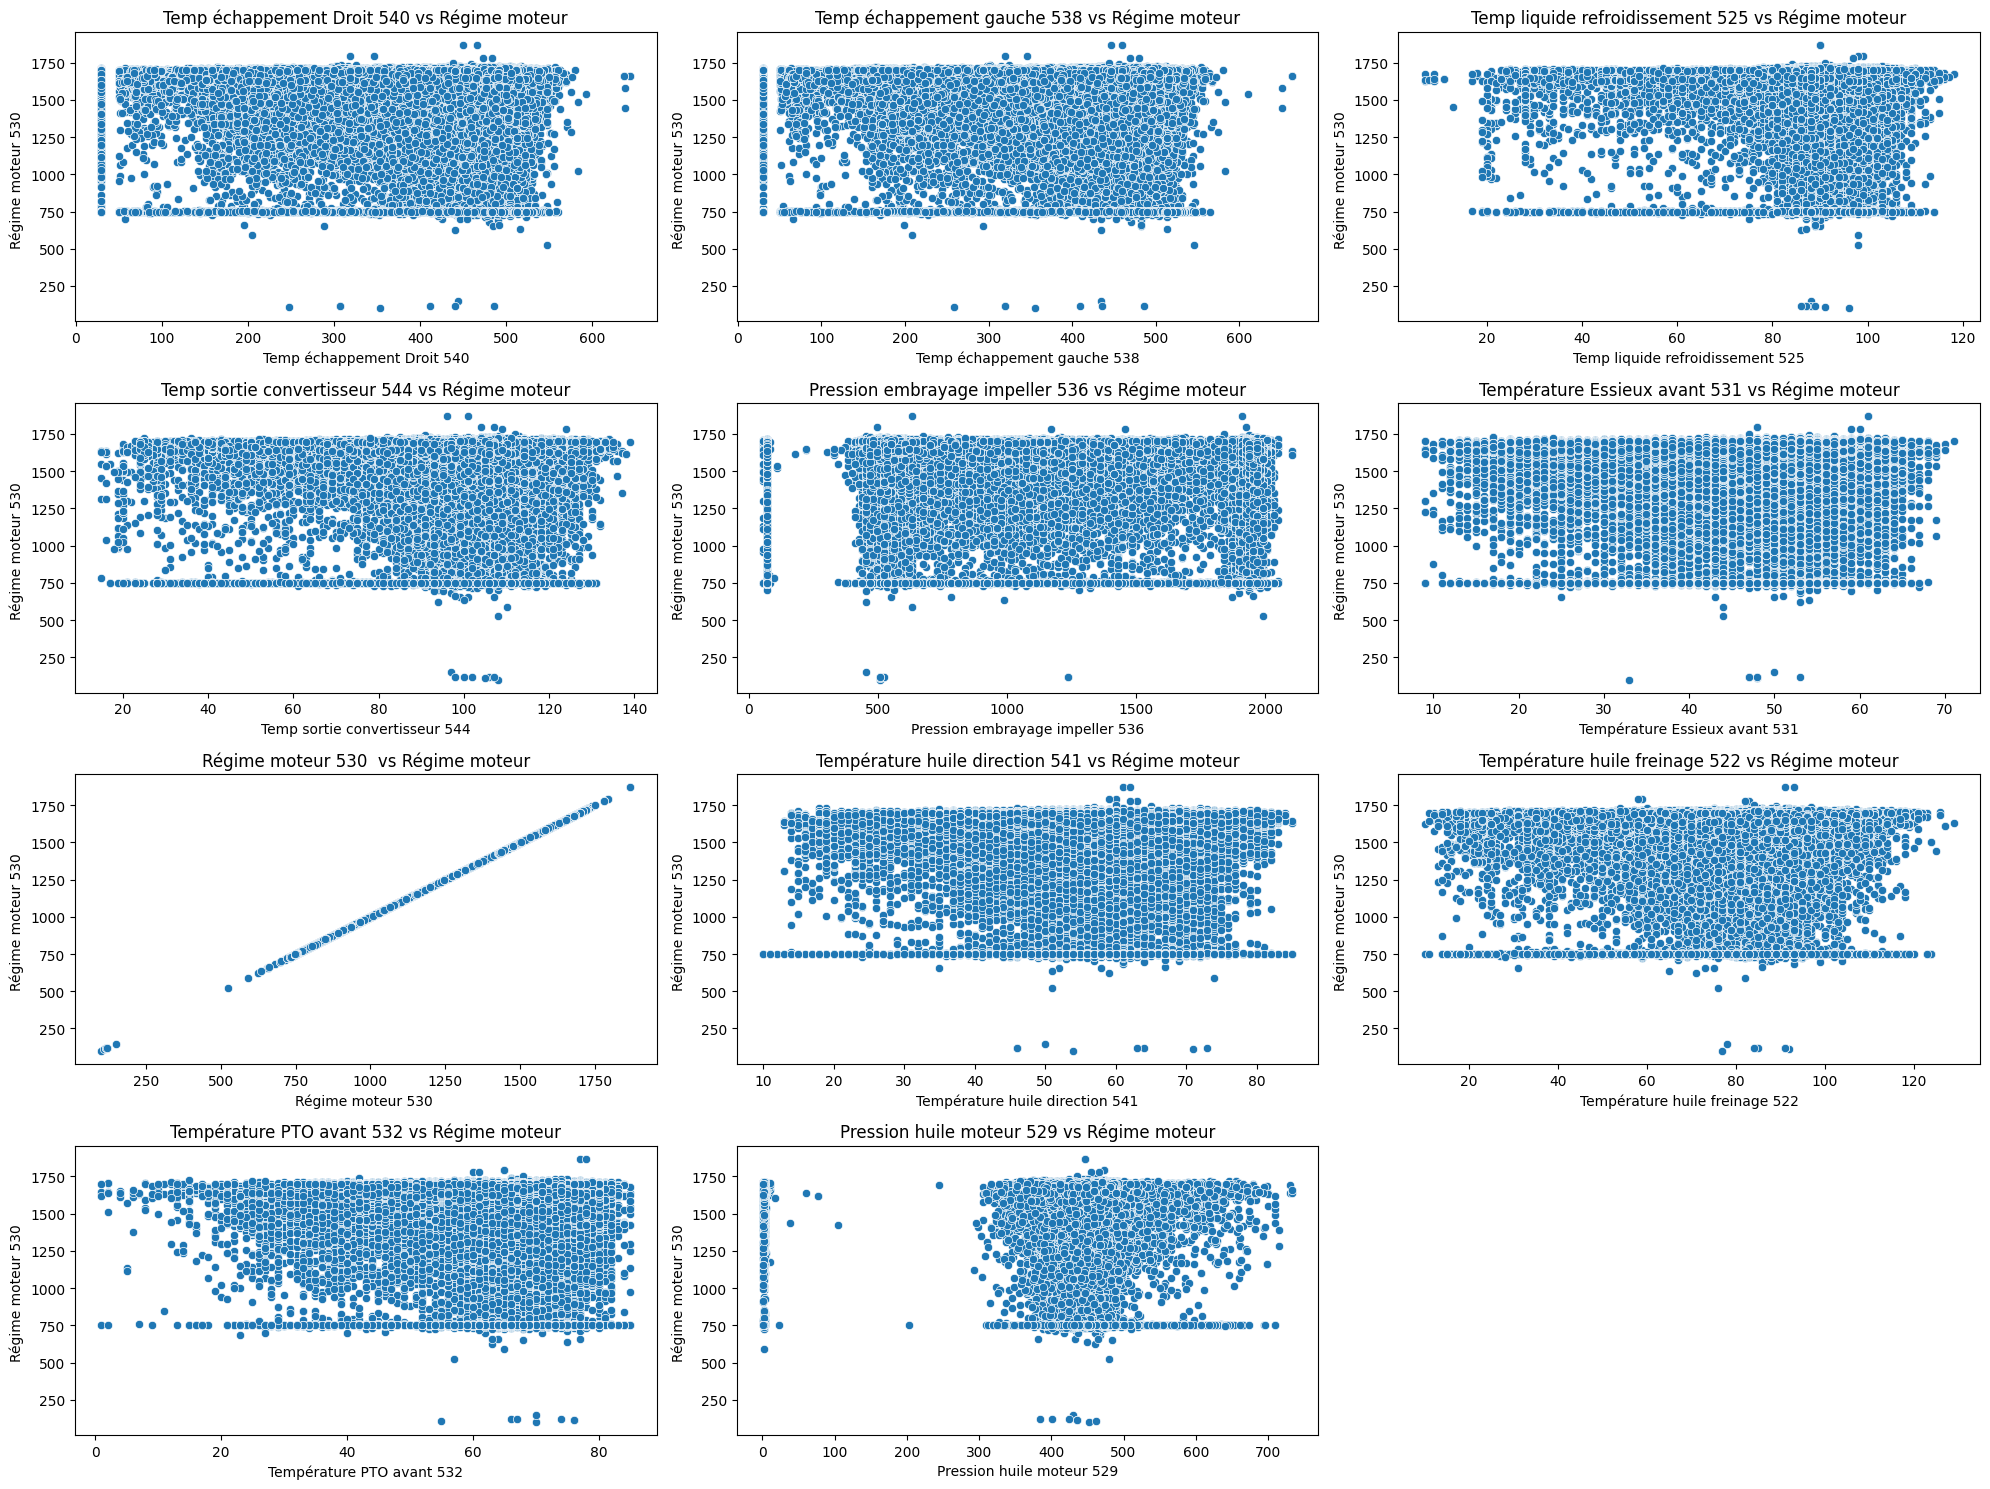

In [10]:
# Liste des capteurs à tracer
capteurs = [
    'Temp échappement Droit 540', 'Temp échappement gauche 538',
    'Temp liquide refroidissement 525', 'Temp sortie convertisseur 544',
    'Pression embrayage impeller 536', 'Température Essieux avant 531',
    'Régime moteur 530 ', 'Température huile direction 541',
    'Température huile freinage 522', 'Température PTO avant 532',
    'Pression huile moteur 529'
]

# Créer une figure avec plusieurs sous-graphes (subplots)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))  # 4 lignes, 3 colonnes
axes = axes.flatten()  # Pour itérer plus facilement sur tous les axes

for idx, capteur in enumerate(capteurs):
    if idx < len(axes):  # pour éviter un bug si il y a moins de capteurs que de cases
        sns.scatterplot(data=df, x=capteur, y='Régime moteur 530 ', ax=axes[idx])
        axes[idx].set_title(f'{capteur} vs Régime moteur')

# Supprimer les cases vides si il reste des subplots inutilisés
for j in range(len(capteurs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: >

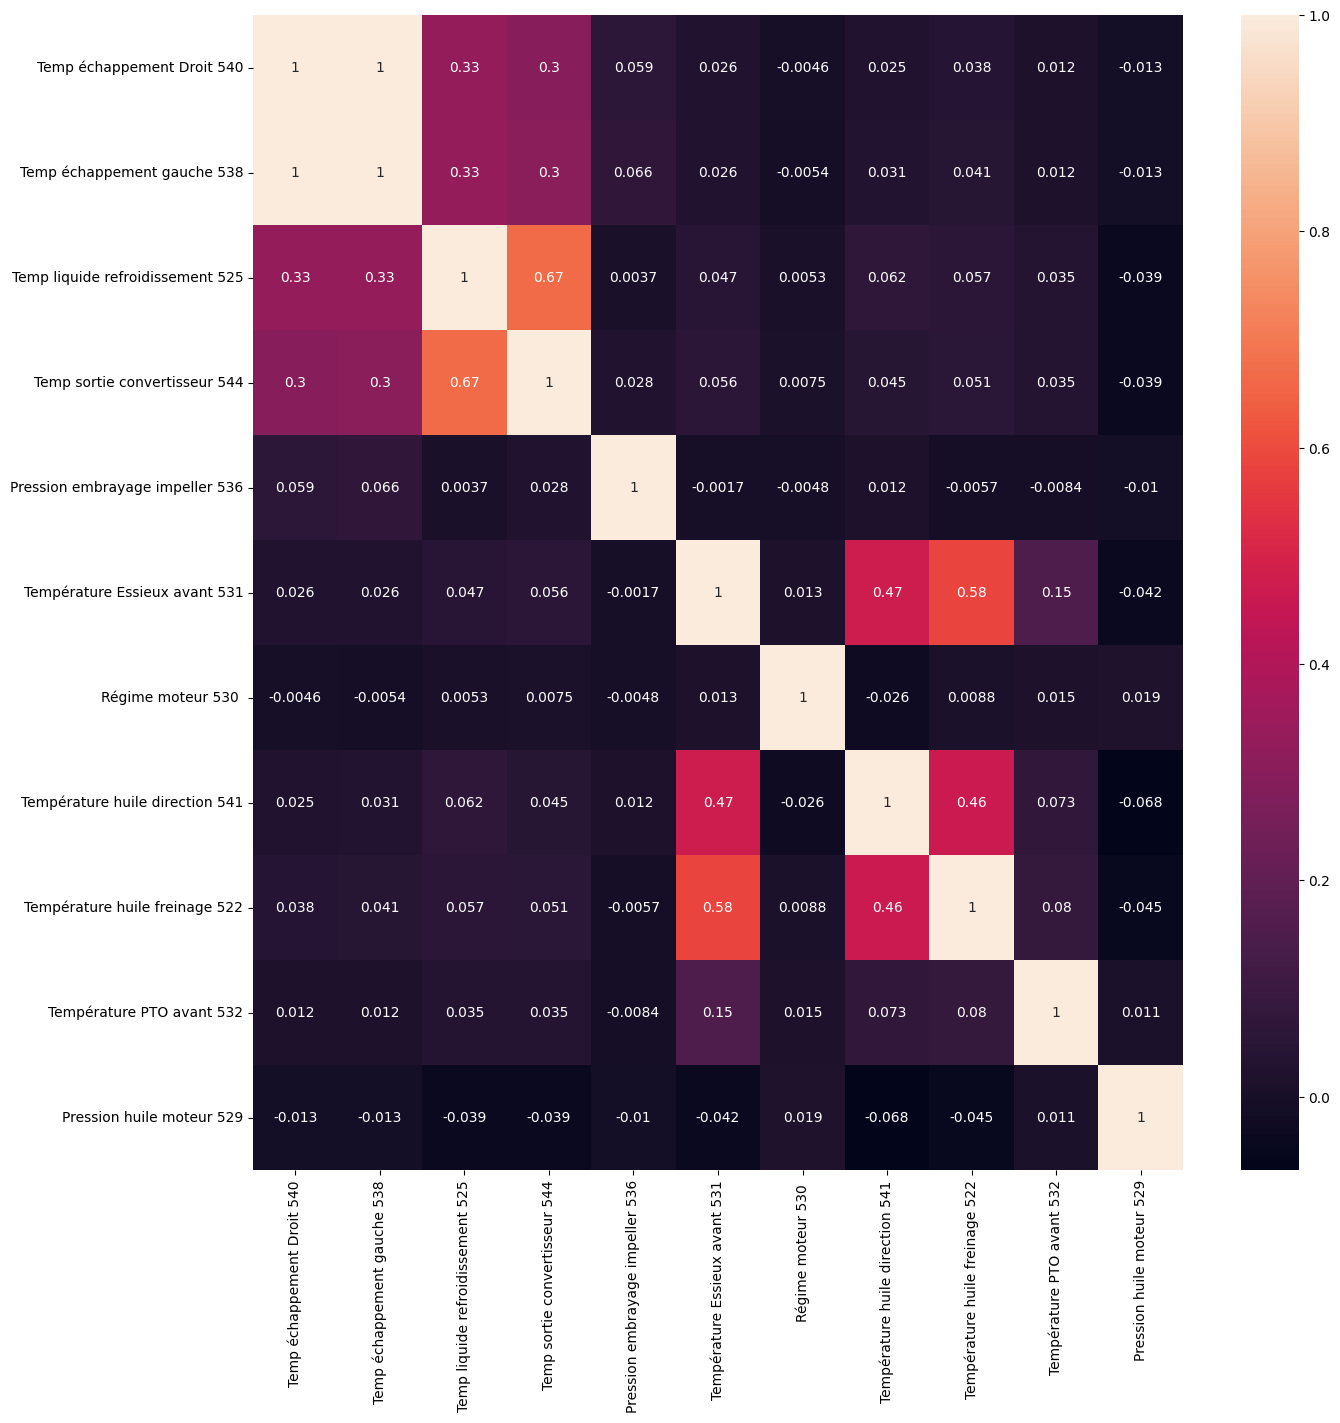

In [11]:
#Correlation with heatmap to interpret the ralation and multicollinearity
s = df.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(s, annot= True)

## Missing Values

In [12]:
impute= KNNImputer()
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])

In [11]:
# Missing values
df.isnull().sum()

Engin                               0
Heure                               0
Temp échappement Droit 540          0
Temp échappement gauche 538         0
Temp liquide refroidissement 525    0
Temp sortie convertisseur 544       0
Pression embrayage impeller 536     0
Température Essieux avant 531       0
Régime moteur 530                   0
Température huile direction 541     0
Température huile freinage 522      0
Température PTO avant 532           0
Pression huile moteur 529           0
dtype: int64

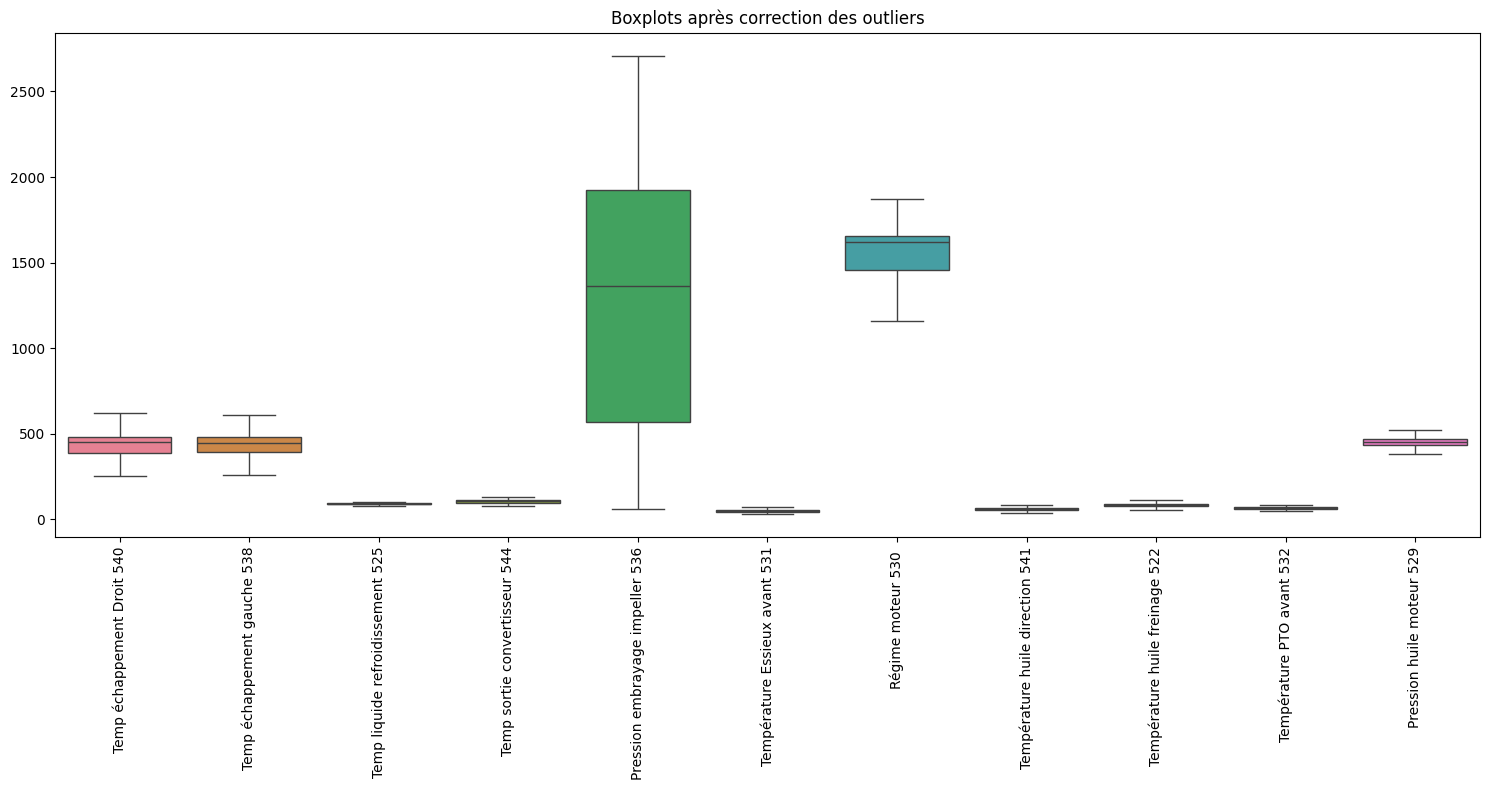

In [103]:
# 1. Correction des outliers pour tous les capteurs
for i in df.select_dtypes(include="number").columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Correction
    df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
    df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])

# 2. AFFICHER tous les boxplots ENSEMBLE sur une seule figure
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.xticks(rotation=90)  # pour tourner les noms de capteurs si nécessaire
plt.title("Boxplots après correction des outliers")
plt.tight_layout()
plt.show()


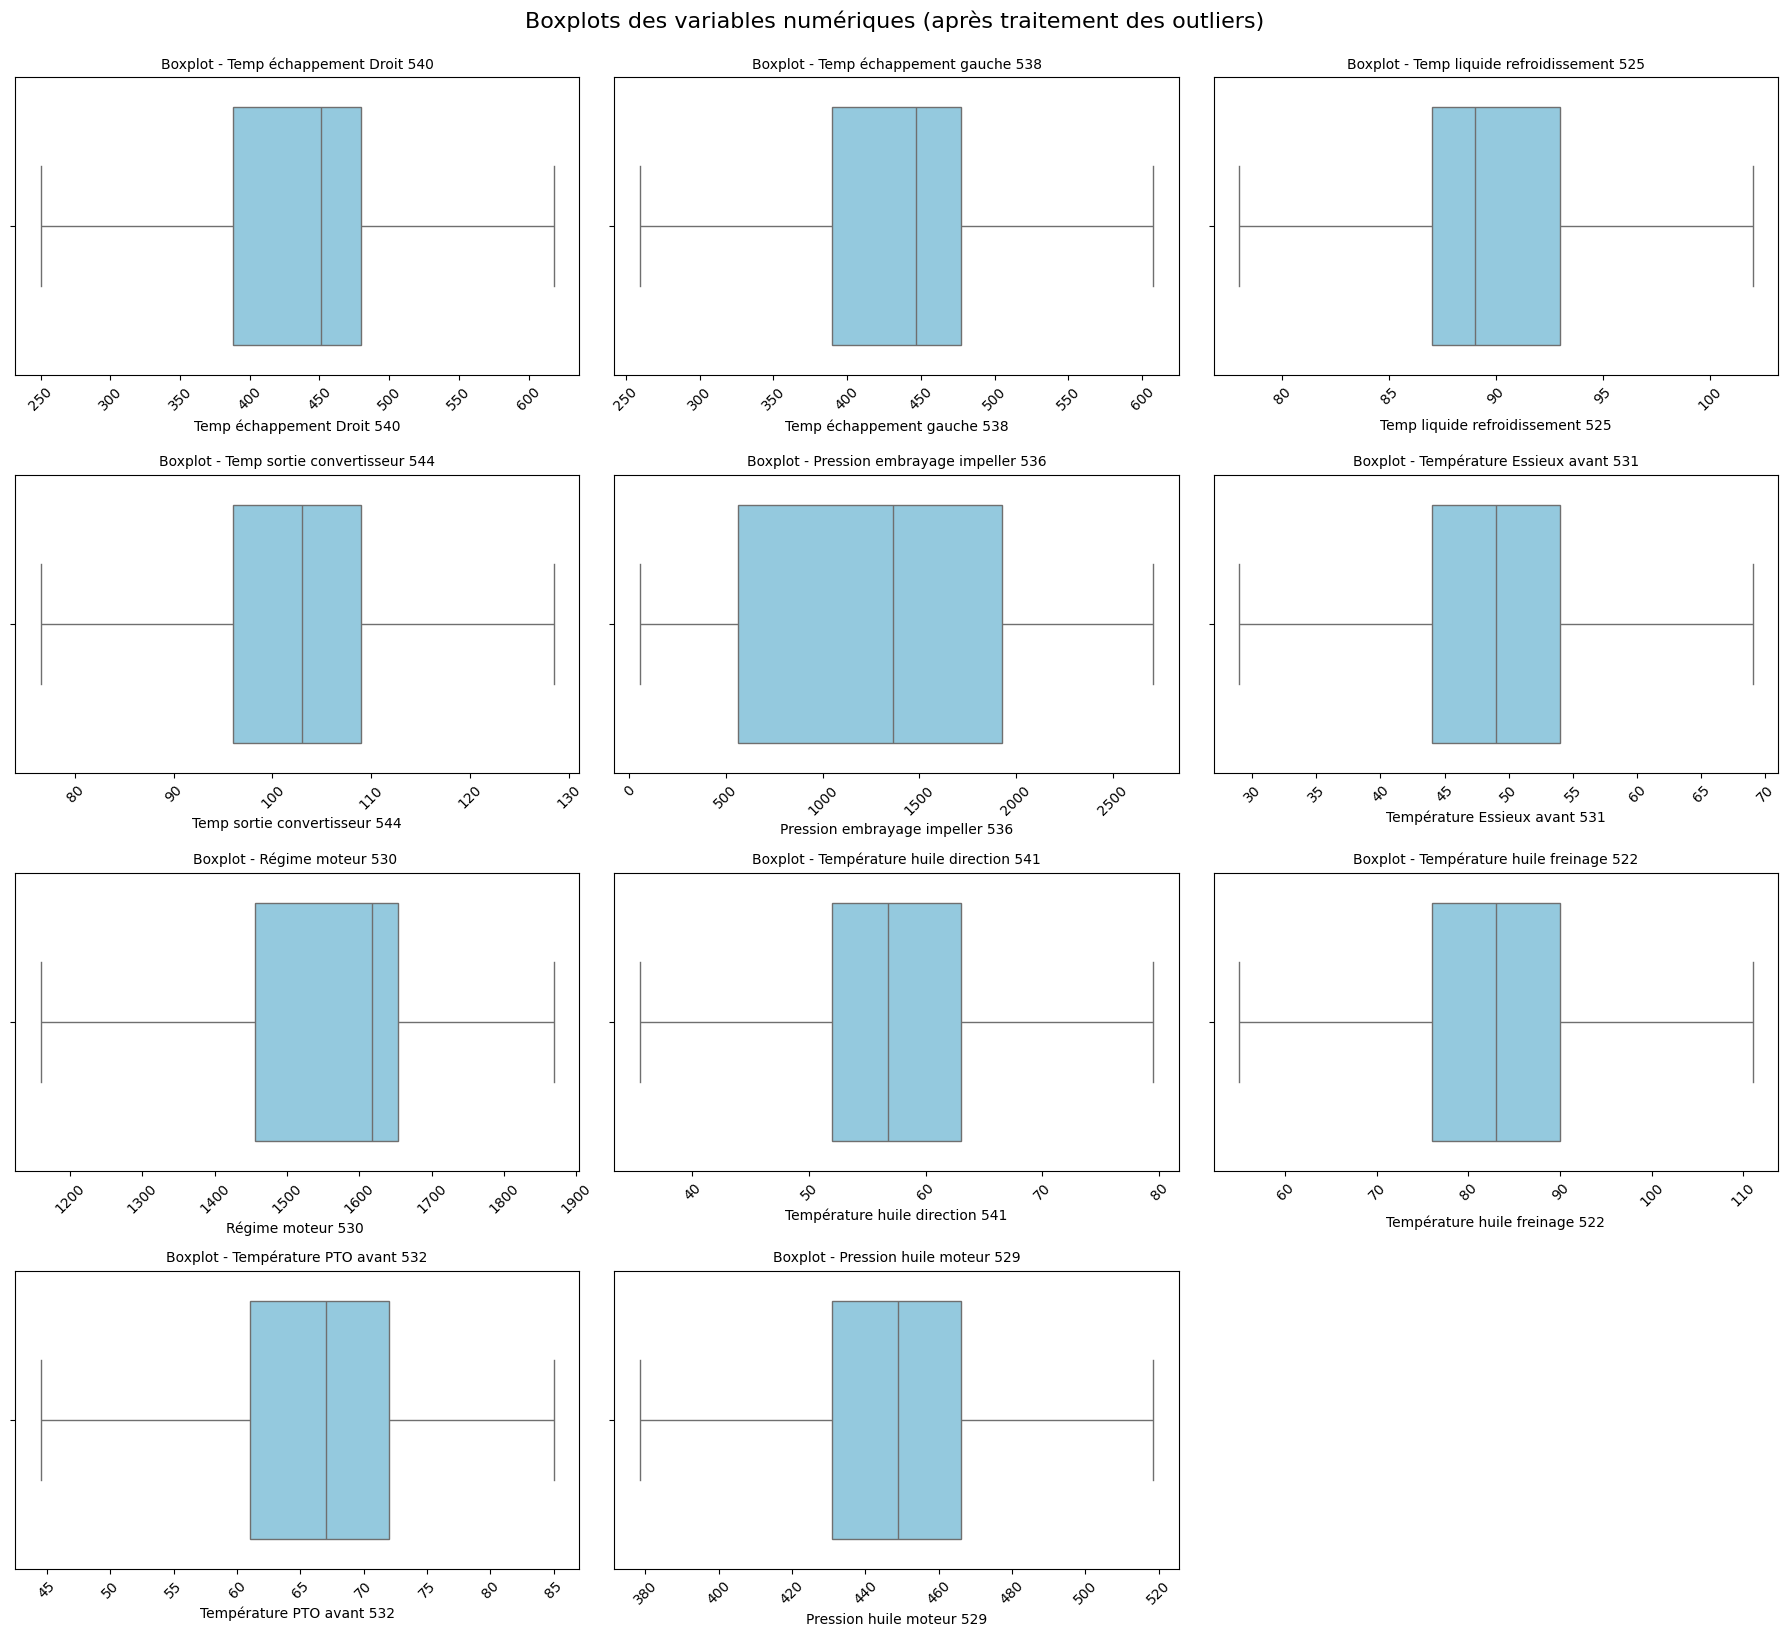

In [15]:
# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include="number").columns

# Traitement des outliers : cap à [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Définir la taille de la grille (3 colonnes par défaut)
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Création de la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Aplatir la grille pour l'indexation facile

# Générer les boxplots pour chaque colonne
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot - {col}", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes inutilisés
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots des variables numériques (après traitement des outliers)", fontsize=16, y=1.02)
plt.show()

## Seuil Anomalie 

In [47]:
# Calculer Lower Bound et Upper Bound pour chaque capteur
seuils_outliers = []

for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Correction : Si lower_bound est négatif, on le met à zéro
    if lower_bound < 0:
        lower_bound = 0
    
    seuils_outliers.append({
        "Capteur": col,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    })

# Créer un DataFrame pour afficher tout proprement
seuils_outliers_df = pd.DataFrame(seuils_outliers)

# Afficher le tableau complet
print(seuils_outliers_df)


                               Capteur  Lower Bound    Upper Bound
0        Température Essieux avant 531        29.00      69.000000
1  Température Essieux avant 531_Panne         0.00       0.000000
2                   Diff_Temps_Minutes         1.97       2.050000
3                           RUL_minute         0.00  766192.580000
4                            RUL_heure         0.00   12769.876333
5                             RUL_jour         0.00     532.078181


## Seuil Panne 

In [15]:
# Dictionnaire des seuils initiaux
seuils = {
    'Temp échappement Droit 540': 618.0,
    'Temp échappement gauche 538': 607.5,
    'Temp liquide refroidissement 525': 102.0,
    'Temp sortie convertisseur 544': 128.5,
    'Pression embrayage impeller 536': 3967.5,
    'Température Essieux avant 531': 69.0,
    'Régime moteur 530 ': 1833.0,
    'Température huile direction 541': 79.5,
    'Température huile freinage 522': 111.0,
    'Température PTO avant 532': 80.5,
    'Pression huile moteur 529': 518.5
}

# Calcul des seuils de panne avec 5% de marge
marge = 0.02
seuils_panne = {capteur: seuil * (1 + marge) for capteur, seuil in seuils.items()}

# Affichage
for capteur, seuil_panne in seuils_panne.items():
    print(f"{capteur}: seuil panne = {seuil_panne:.2f}")


Temp échappement Droit 540: seuil panne = 630.36
Temp échappement gauche 538: seuil panne = 619.65
Temp liquide refroidissement 525: seuil panne = 104.04
Temp sortie convertisseur 544: seuil panne = 131.07
Pression embrayage impeller 536: seuil panne = 4046.85
Température Essieux avant 531: seuil panne = 70.38
Régime moteur 530 : seuil panne = 1869.66
Température huile direction 541: seuil panne = 81.09
Température huile freinage 522: seuil panne = 113.22
Température PTO avant 532: seuil panne = 82.11
Pression huile moteur 529: seuil panne = 528.87


## Fichier Panne 

In [ ]:
import pandas as pd

# Dictionnaire seuils initiaux
seuils = {
    'Temp échappement Droit 540': 618.0,
    'Temp échappement gauche 538': 607.5,
    'Temp liquide refroidissement 525': 102.0,
    'Temp sortie convertisseur 544': 128.5,
    'Pression embrayage impeller 536': 3967.5,
    'Température Essieux avant 531': 69.0,
    'Régime moteur 530 ': 1951.0,
    'Température huile direction 541': 79.5,
    'Température huile freinage 522': 111.0,
    'Température PTO avant 532': 88.5,
    'Pression huile moteur 529': 518.5
}

marge = 0.02  # 2% marge

# Calcul seuils panne avec marge
seuils_panne = {k: v * (1 + marge) for k, v in seuils.items()}

# Charger les données depuis un fichier Excel
# Supposons que le fichier s'appelle 'donnees_capteurs.xlsx' et que chaque capteur est une colonne
df = pd.read_excel(r"C:\Users\hp\Desktop\Données Capteurs global with HI.xlsx")

# Initialiser un DataFrame pour stocker les colonnes panne
df_panne = pd.DataFrame()

# Pour chaque capteur, calculer la panne : 1 si valeur > seuil panne, sinon 0
for capteur, seuil_panne in seuils_panne.items():
    if capteur not in df.columns:
        print(f"Attention : capteur '{capteur}' absent des données.")
        continue
    df_panne[capteur + '_Panne'] = (df[capteur] > seuil_panne).astype(int)

# Sauvegarder le fichier Excel avec les colonnes panne
df_panne.to_excel('pannes_11_capteurs.xlsx', index=False)

print("Fichier 'pannes_11_capteurs.xlsx' généré avec succès.")


Fichier 'pannes_11_capteurs.xlsx' généré avec succès.


## Calcule Rul Pour Chaque Capteur 

In [11]:
import pandas as pd

# Charger les données
file_path = r"C:\Users\hp\Desktop\Capteur with panne.xlsx"
df = pd.read_excel(file_path)

# Trouver les colonnes panne (contenant 'Panne' dans le nom)
panne_cols = [col for col in df.columns if 'Panne' in col]
print("Colonnes panne détectées :", panne_cols)

# Afficher les valeurs uniques et leur fréquence dans chaque colonne panne
for col in panne_cols:
    print(f"\nColonne : {col}")
    print(df[col].value_counts(dropna=False))


Colonnes panne détectées : ['Temp échappement Droit 540_Panne', 'Temp échappement gauche 538_Panne', 'Temp liquide refroidissement 525_Panne', 'Temp sortie convertisseur 544_Panne', 'Pression embrayage impeller 536_Panne', 'Température Essieux avant 531_Panne', 'Régime moteur 530 _Panne', 'Température huile direction 541_Panne', 'Température huile freinage 522_Panne', 'Température PTO avant 532_Panne', 'Pression huile moteur 529_Panne']

Colonne : Temp échappement Droit 540_Panne
Temp échappement Droit 540_Panne
0    92360
1        6
Name: count, dtype: int64

Colonne : Temp échappement gauche 538_Panne
Temp échappement gauche 538_Panne
0    92360
1        6
Name: count, dtype: int64

Colonne : Temp liquide refroidissement 525_Panne
Temp liquide refroidissement 525_Panne
0    90942
1     1424
Name: count, dtype: int64

Colonne : Temp sortie convertisseur 544_Panne
Temp sortie convertisseur 544_Panne
0    92284
1       82
Name: count, dtype: int64

Colonne : Pression embrayage impeller 

In [1]:
import pandas as pd

# Charger le fichier Excel
input_file = r"C:\Users\hp\Desktop\donnees_completes with RUL.xlsx"  # Remplace par le nom réel de ton fichier
sheet_name = "Sensor1HI"

# Lire la feuille
df = pd.read_excel(input_file, sheet_name=sheet_name)

# Conversion de la colonne 'Heure' en datetime
df['Heure'] = pd.to_datetime(df['Heure'])

# Calcul de la différence en minutes entre lignes
df['Différence en minutes'] = df['Heure'].diff().dt.total_seconds() / 60
df['Différence en minutes'] = df['Différence en minutes'].fillna(0).round(2)

# Sauvegarde dans un nouveau fichier Excel
output_file = "data_with_diff.xlsx"
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name=sheet_name, index=False)

print("✅ Fichier généré avec la colonne 'Différence en minutes' :", output_file)


✅ Fichier généré avec la colonne 'Différence en minutes' : data_with_diff.xlsx


In [4]:

import pandas as pd # Charger le fichier Excel
df = pd.read_excel(r"C:\Users\hp\Desktop\donnees_completes with RUL.xlsx", sheet_name="Sensor5HI")

# Renommer pour plus de simplicité
df.columns = ['Pression embrayage impeller 536_Panne', 'Diff_Temps_Minutes']
df['RUL_minute'] = 0.0

i = 0
n = len(df)

while i < n:
    if df.loc[i, 'Pression embrayage impeller 536_Panne'] == 0:
        # Trouver la fin du cycle (jusqu’à la prochaine panne = 1 ou fin)
        start = i
        end = i
        while end < n and df.loc[end, 'Pression embrayage impeller 536_Panne'] == 0:
            end += 1

        # Somme des temps pour ce cycle
        total_rul = df.loc[start:end-1, 'Diff_Temps_minute'].sum()
        rul = total_rul

        # Remplir les RUL pour ce cycle
        for j in range(start, end):
            df.at[j, 'RUL_minute'] = max(rul, 0)
            rul -= df.loc[j, 'Diff_Temps_minute']
            if rul < 0:
                break  # On ne va pas plus loin si le RUL devient négatif

        i = end  # Reprendre après la panne
    else:
        df.at[i, 'RUL_minute'] = 0  # Si c’est une panne, RUL = 0
        i += 1

# Sauvegarder dans un nouveau fichier Excel
df.to_excel("RUL_Calculé_Sensor5HI.xlsx", index=False)


ValueError: Length mismatch: Expected axis has 5 elements, new values have 2 elements

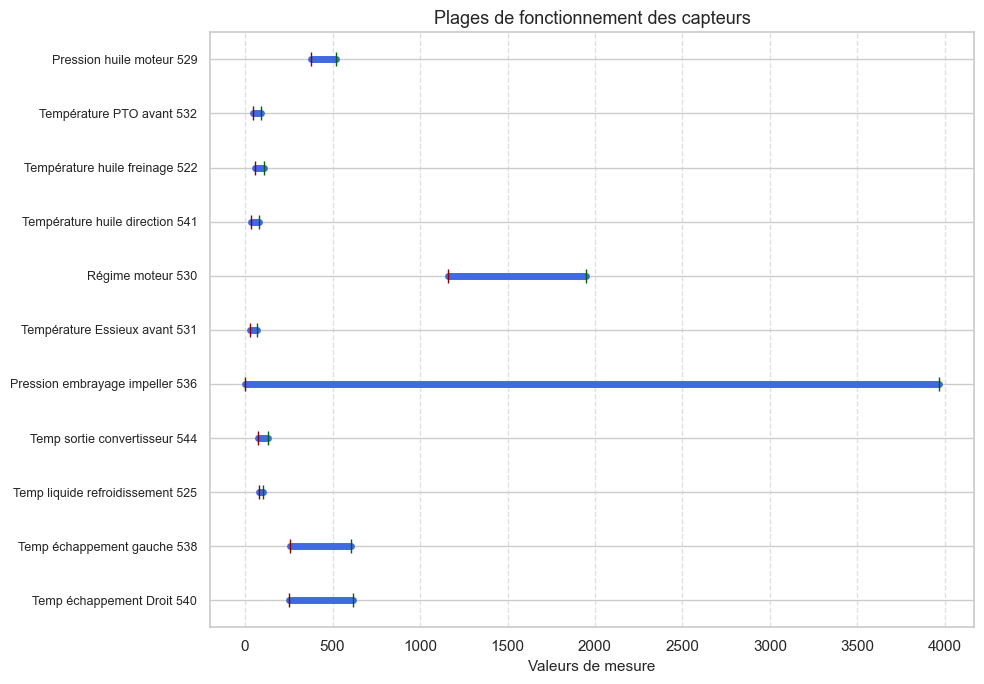

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de style
sns.set(style="whitegrid")

# Données des capteurs et leurs seuils (extraites de ton image)
data = {
    "Capteur": [
        "Temp échappement Droit 540", "Temp échappement gauche 538", "Temp liquide refroidissement 525",
        "Temp sortie convertisseur 544", "Pression embrayage impeller 536", "Température Essieux avant 531",
        "Régime moteur 530", "Température huile direction 541", "Température huile freinage 522",
        "Température PTO avant 532", "Pression huile moteur 529"
    ],
    "Lower Bound": [250.0, 259.5, 78.0, 76.5, 0.0, 29.0, 1159.0, 35.5, 55.0, 44.5, 378.5],
    "Upper Bound": [618.0, 607.5, 102.0, 128.5, 3967.5, 69.0, 1951.0, 79.5, 111.0, 88.5, 518.5]
}

df = pd.DataFrame(data)

# Création du graphique à barres horizontales
plt.figure(figsize=(10, 7))
for idx, row in df.iterrows():
    plt.plot([row["Lower Bound"], row["Upper Bound"]], [idx, idx], color="royalblue", linewidth=5)
    plt.plot(row["Lower Bound"], idx, marker="|", color="darkred", markersize=10)
    plt.plot(row["Upper Bound"], idx, marker="|", color="darkgreen", markersize=10)

# Personnalisation de l'axe y
plt.yticks(range(len(df)), df["Capteur"], fontsize=9)
plt.xlabel("Valeurs de mesure", fontsize=11)
plt.title("Plages de fonctionnement des capteurs", fontsize=13)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## La normalisation

In [105]:
# Sélectionner seulement les colonnes numériques
numeric_cols = df.select_dtypes(include='number').columns

# Créer un scaler
scaler = MinMaxScaler()

# Appliquer la normalisation
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Maintenant toutes tes colonnes numériques sont normalisées entre 0 et 1
print(df.head())


    Engin               Heure  Temp échappement Droit 540  \
0  994 F2 2025-04-08 10:06:33                    0.706522   
1  994 F2 2025-04-08 10:04:32                    0.706522   
2  994 F2 2025-04-08 10:02:33                    0.679348   
3  994 F2 2025-04-08 10:00:32                    0.660326   
4  994 F2 2025-04-08 09:58:31                    0.608696   

   Temp échappement gauche 538  Temp liquide refroidissement 525  \
0                     0.688218                          0.916667   
1                     0.688218                          0.916667   
2                     0.662356                          0.916667   
3                     0.650862                          0.875000   
4                     0.604885                          0.875000   

   Temp sortie convertisseur 544  Pression embrayage impeller 536  \
0                       0.836538                         0.689031   
1                       0.836538                         0.492273   
2                

## Model CNN-Tranformer-LSTM-SSM

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Dropout, LSTM
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Configuration du modèle
class ModelConfig:
    def __init__(self):
        # Paramètres généraux
        self.window_size = 128  # Taille de la fenêtre temporelle
        self.feature_size = 11  # Nombre de caractéristiques (sans 'Engin' et 'Heure')
        
        # Paramètres CNN
        self.cnn_filters = 64
        self.cnn_kernel_size = 3
        
        # Paramètres Transformer
        self.transformer_heads = 4
        self.transformer_dim = 64
        self.transformer_ff_dim = 128
        self.transformer_layers = 2
        
        # Paramètres LSTM
        self.lstm_units_1 = 128
        self.lstm_units_2 = 128
        
        # Paramètres SSM (Smooth Semi-Martingale)
        self.ssm_dim = 64
        
        # Paramètres RUL
        self.rul_layers = [64, 32]
        
        # Paramètres d'entraînement
        self.batch_size = 32
        self.epochs = 100
        self.learning_rate = 0.001
        self.dropout_rate = 0.2

# Prétraitement des données
class DataPreprocessor:
    def __init__(self, config):
        self.config = config
        self.scalers = {}
    
    def load_data(self, filepath):
        # Charger les données depuis un fichier CSV
        df = pd.read_csv(filepath)
        return df
    
    def preprocess_data(self, df):
        # Séparer les données par engin
        engines = df['Engin'].unique()
        sequences = []
        
        for engine in engines:
            engine_data = df[df['Engin'] == engine].sort_values('Heure')
            
            # Exclure les colonnes 'Engin' et 'Heure'
            sensor_data = engine_data.drop(['Engin', 'Heure', 'RUL'], axis=1).values
            rul_data = engine_data['RUL'].values
            
            # Normalisation des données par caractéristique
            if engine not in self.scalers:
                self.scalers[engine] = {}
                for i in range(sensor_data.shape[1]):
                    self.scalers[engine][i] = MinMaxScaler()
                    sensor_data[:, i] = self.scalers[engine][i].fit_transform(sensor_data[:, i].reshape(-1, 1)).flatten()
            else:
                for i in range(sensor_data.shape[1]):
                    sensor_data[:, i] = self.scalers[engine][i].transform(sensor_data[:, i].reshape(-1, 1)).flatten()
            
            # Créer des séquences de taille window_size
            for i in range(0, len(sensor_data) - self.config.window_size + 1):
                sequences.append((sensor_data[i:i+self.config.window_size], rul_data[i+self.config.window_size-1]))
        
        # Convertir en arrays numpy
        X = np.array([seq[0] for seq in sequences])
        y = np.array([seq[1] for seq in sequences])
        
        # Diviser en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        return X_train, X_test, y_train, y_test
    
    def segment_data(self, X, segment_size=16):
        """Segmenter les données en segments de taille fixe pour le CNN"""
        batch_size, seq_len, features = X.shape
        n_segments = seq_len // segment_size
        
        # Redimensionner X pour avoir des segments
        X_segmented = np.zeros((batch_size, n_segments, segment_size, features))
        
        for i in range(n_segments):
            start_idx = i * segment_size
            end_idx = start_idx + segment_size
            X_segmented[:, i] = X[:, start_idx:end_idx]
        
        return X_segmented

# Couches CNN pour l'extraction de caractéristiques spatiales
def build_cnn_layer(inputs, config):
    # Redimensionner l'entrée pour le CNN
    batch_size, time_steps, features = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2]
    
    # Application de la couche CNN
    x = Conv1D(
        filters=config.cnn_filters,
        kernel_size=config.cnn_kernel_size,
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(0.001)
    )(inputs)
    
    x = LayerNormalization()(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    x = Dropout(config.dropout_rate)(x)
    
    return x

# Couche Transformer pour la dynamique temporelle
def transformer_encoder_block(inputs, config):
    # Multi-head attention
    attention_output = MultiHeadAttention(
        num_heads=config.transformer_heads,
        key_dim=config.transformer_dim // config.transformer_heads
    )(inputs, inputs)
    
    # Add & Normalize
    attention_output = Add()([inputs, attention_output])
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    
    # Feed-forward network
    ffn = Dense(config.transformer_ff_dim, activation="relu")(attention_output)
    ffn = Dense(inputs.shape[-1])(ffn)
    
    # Add & Normalize
    ffn_output = Add()([attention_output, ffn])
    ffn_output = LayerNormalization(epsilon=1e-6)(ffn_output)
    
    return ffn_output

# Construction du bloc Transformer complet
def build_transformer_layer(inputs, config):
    x = inputs
    for _ in range(config.transformer_layers):
        x = transformer_encoder_block(x, config)
    
    return x

# Couche LSTM pour les dépendances à long terme
def build_lstm_layer(inputs, config):
    # Premier bloc LSTM
    x = LSTM(
        units=config.lstm_units_1,
        return_sequences=True,
        kernel_regularizer=regularizers.l2(0.001)
    )(inputs)
    x = LayerNormalization()(x)
    x = Dropout(config.dropout_rate)(x)
    
    # Deuxième bloc LSTM
    x = LSTM(
        units=config.lstm_units_2,
        return_sequences=False,  # On ne conserve que la sortie finale
        kernel_regularizer=regularizers.l2(0.001)
    )(x)
    x = LayerNormalization()(x)
    x = Dropout(config.dropout_rate)(x)
    
    return x

# Couche SSM (Smooth Semi-Martingale)
def build_ssm_layer(inputs, config):
    # Cette implémentation est une simplification conceptuelle du SSM
    # En pratique, il faudrait implémenter les équations de SSM comme une couche personnalisée
    
    # Utiliser une couche dense pour simuler la transformation SSM
    x = Dense(config.ssm_dim, activation='tanh')(inputs)
    x = LayerNormalization()(x)
    
    return x

# Couche RUL pour la prédiction finale
def build_rul_prediction_layer(inputs, config):
    x = inputs
    
    for units in config.rul_layers:
        x = Dense(units, activation='relu')(x)
        x = Dropout(config.dropout_rate)(x)
    
    # Sortie de prédiction RUL (valeur unique)
    output = Dense(1, activation='linear', name='rul_output')(x)
    
    return output

# Construction du modèle complet
def build_model(config):
    # Entrée du modèle
    inputs = Input(shape=(config.window_size, config.feature_size))
    
    # Couche de prétraitement des données (partie du réseau)
    preprocessed = LayerNormalization()(inputs)
    
    # Extraction des caractéristiques spatiales avec CNN
    cnn_features = build_cnn_layer(preprocessed, config)
    
    # Modélisation de la dynamique temporelle avec Transformer
    transformer_features = build_transformer_layer(cnn_features, config)
    
    # Gestion des dépendances à long terme avec LSTM
    lstm_features = build_lstm_layer(transformer_features, config)
    
    # Lissage avec SSM
    ssm_features = build_ssm_layer(lstm_features, config)
    
    # Couche de prédiction RUL
    outputs = build_rul_prediction_layer(ssm_features, config)
    
    # Création du modèle
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compilation du modèle
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
        loss='mse',  # Mean Squared Error pour la régression
        metrics=['mae']  # Mean Absolute Error
    )
    
    return model

# Fonction principale pour l'entraînement et l'évaluation
def train_and_evaluate(filepath):
    # Initialisation de la configuration
    config = ModelConfig()
    
    # Prétraitement des données
    preprocessor = DataPreprocessor(config)
    df = preprocessor.load_data(filepath)
    
    # Vérifier la présence des colonnes nécessaires
    required_columns = ['Engin', 'Heure', 'RUL', 'Temp échappement Droit 540', 'Temp échappement gauche 538',
                       'Temp liquide refroidissement 525', 'Temp sortie convertisseur 544', 
                       'Pression embrayage impeller 536', 'Température Essieux avant 531',
                       'Régime moteur 530 ', 'Température huile direction 541', 
                       'Température huile freinage 522', 'Température PTO avant 532', 
                       'Pression huile moteur 529']
    
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Colonne manquante: {col}")
    
    X_train, X_test, y_train, y_test = preprocessor.preprocess_data(df)
    
    # Construction du modèle
    model = build_model(config)
    print(model.summary())
    
    # Callbacks pour l'entraînement
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=0.00001
        )
    ]
    
    # Entraînement du modèle
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=config.epochs,
        batch_size=config.batch_size,
        callbacks=callbacks,
        verbose=1
    )
    
    # Évaluation du modèle
    evaluation = model.evaluate(X_test, y_test)
    print(f"Test Loss: {evaluation[0]}")
    print(f"Test MAE: {evaluation[1]}")
    
    return model, history, preprocessor

# Exemple d'utilisation
if __name__ == "__main__":
    # Remplacer par le chemin de votre fichier de données
    filepath = "data_rul.csv"  
    
    model, history, preprocessor = train_and_evaluate(filepath)
    
    # Sauvegarder le modèle
    model.save("cnn_transformer_lstm_ssm_rul_model.h5")
    
    # Pour faire des prédictions avec de nouvelles données
    def predict_rul(new_data, model, preprocessor):
        # Prétraitement des nouvelles données
        # (À adapter en fonction de la structure des nouvelles données)
        # ...
        
        # Prédiction
        predictions = model.predict(new_data)
        
        return predictions

## CNN-Transformers-LSTM with RLHT


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader

# ==== CONFIG ====
SEQ_LEN = 30
EPISODES = 5
DEVICE = torch.device("cpu")  # ← Forcer le CPU

ACTION_SPACE = ['inc_lr', 'dec_lr', 'inc_lstm', 'dec_lstm', 'inc_cnn', 'dec_cnn']
HYPERPARAM_BOUNDS = {'lr': [1e-5, 1e-1], 'lstm': [32, 256], 'cnn': [16, 128]}

# ==== VISUALISATION ====
def plot_rul_prediction(engine_ids, true_rul, predicted_rul, sensor_name="SensorXHI"):
    true_rul = np.array(true_rul)
    predicted_rul = np.array(predicted_rul)
    error = np.abs(predicted_rul - true_rul)

    plt.figure(figsize=(10, 5))
    plt.plot(engine_ids, predicted_rul, 'b-', label='Predicted RUL')
    plt.plot(engine_ids, true_rul, 'ro', label='True RUL')
    plt.fill_between(engine_ids, predicted_rul - error, predicted_rul + error,
                     color='orange', alpha=0.3, label='Error Range')

    plt.title(f"RUL Prediction for {sensor_name}", fontsize=13)
    plt.xlabel("Sample Index")
    plt.ylabel("Remaining Useful Life (RUL)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{sensor_name}_rul_prediction.png")
    plt.close()

# ==== DATASET ====
class SensorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# ==== MODEL ====
class HybridModel(nn.Module):
    def __init__(self, input_size, cnn_filters, lstm_hidden):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(input_size, cnn_filters, kernel_size=3, padding=1),
            nn.ReLU(), nn.MaxPool1d(2),
            nn.Conv1d(cnn_filters, cnn_filters*2, kernel_size=3, padding=1),
            nn.ReLU(), nn.MaxPool1d(2)
        )
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=cnn_filters*2, nhead=2, batch_first=True), num_layers=1)
        self.lstm = nn.LSTM(cnn_filters*2, lstm_hidden, num_layers=2, batch_first=True, dropout=0.2)
        self.regressor = nn.Sequential(nn.Linear(lstm_hidden, 64), nn.ReLU(), nn.Linear(64, 1))

    def forward(self, x):
        x = self.cnn(x.permute(0, 2, 1)).permute(0, 2, 1)
        x = self.transformer(x)
        x, _ = self.lstm(x)
        return self.regressor(x[:, -1, :])

# ==== RLHT AGENT ====
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, action_size)
    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.out(x)

class ReplayBuffer:
    def __init__(self, capacity): self.buffer = deque(maxlen=capacity)
    def push(self, t): self.buffer.append(t)
    def sample(self, size): return random.sample(self.buffer, size)
    def __len__(self): return len(self.buffer)

class RLHTAgent:
    def __init__(self, state_size, action_size, lr=1e-3, gamma=0.9, eps=1.0, eps_min=0.05, eps_decay=0.95):
        self.q_net = QNetwork(state_size, action_size).float()
        self.target_net = QNetwork(state_size, action_size).float()
        self.target_net.load_state_dict(self.q_net.state_dict())
        self.memory = ReplayBuffer(10000)
        self.opt = optim.Adam(self.q_net.parameters(), lr=lr)
        self.gamma = gamma
        self.eps = eps
        self.eps_min = eps_min
        self.eps_decay = eps_decay
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.eps:
            return random.randint(0, len(ACTION_SPACE)-1)
        with torch.no_grad():
            return torch.argmax(self.q_net(torch.FloatTensor(state))).item()

    def remember(self, t): self.memory.push(t)

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size: return
        batch = self.memory.sample(batch_size)
        for s, a, r, s_next in batch:
            s, s_next = torch.FloatTensor(s), torch.FloatTensor(s_next)
            target = self.q_net(s).detach()
            target[a] = r + self.gamma * torch.max(self.target_net(s_next)).item()
            output = self.q_net(s)[a]
            loss = self.loss_fn(output, target[a])
            self.opt.zero_grad(); loss.backward(); self.opt.step()
        self.eps = max(self.eps * self.eps_decay, self.eps_min)

# ==== UTILS ====
def apply_action(p, a):
    if ACTION_SPACE[a] == 'inc_lr': p['lr'] = min(p['lr'] * 1.5, HYPERPARAM_BOUNDS['lr'][1])
    elif ACTION_SPACE[a] == 'dec_lr': p['lr'] = max(p['lr'] / 1.5, HYPERPARAM_BOUNDS['lr'][0])
    elif ACTION_SPACE[a] == 'inc_lstm': p['lstm'] = min(p['lstm'] + 16, HYPERPARAM_BOUNDS['lstm'][1])
    elif ACTION_SPACE[a] == 'dec_lstm': p['lstm'] = max(p['lstm'] - 16, HYPERPARAM_BOUNDS['lstm'][0])
    elif ACTION_SPACE[a] == 'inc_cnn': p['cnn'] = min(p['cnn'] + 8, HYPERPARAM_BOUNDS['cnn'][1])
    elif ACTION_SPACE[a] == 'dec_cnn': p['cnn'] = max(p['cnn'] - 8, HYPERPARAM_BOUNDS['cnn'][0])
    return p

def preprocess(df):
    df.columns = df.columns.str.strip()
    if 'RUL_jour' not in df.columns: return None, None
    if 'Heure' in df.columns: df = df.drop(columns=['Heure'])
    y = df['RUL_jour'].values
    X = df.drop(columns=[c for c in df.columns if 'RUL' in c], errors='ignore')
    X_scaled = StandardScaler().fit_transform(X)
    segs, labels = [], []
    for i in range(len(X_scaled) - SEQ_LEN):
        segs.append(X_scaled[i:i+SEQ_LEN])
        labels.append(y[i+SEQ_LEN-1])
    return np.array(segs), np.array(labels)

def s_score(y_true, y_pred):
    score = 0
    for yt, yp in zip(y_true, y_pred):
        d = yt - yp
        if d >= 0:
            score += np.exp(-d / 13) - 1
        else:
            score += np.exp(d / 10) - 1
    return -score / len(y_true)

# ==== MAIN LOOP ====
xls = pd.ExcelFile("10_Sensor_Data_with_Rul.xlsx")  # ← Mets ton fichier ici
results_rmse = {}
results_sscore = {}

for sheet in xls.sheet_names:
    print(f"\n🚀 Traitement : {sheet}")
    df = pd.read_excel(xls, sheet_name=sheet).dropna()
    X, y = preprocess(df)
    if X is None or len(X) < 200:
        print(f"❌ Données insuffisantes : {sheet}")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    agent = RLHTAgent(state_size=3, action_size=len(ACTION_SPACE))
    params = {'lr': 1e-3, 'lstm': 64, 'cnn': 32}
    rmse_curve = []

    for ep in range(EPISODES):
        state = [params['lr'], params['lstm'], params['cnn']]
        a = agent.act(state)
        params = apply_action(params, a)

        model = HybridModel(X.shape[2], params['cnn'], params['lstm']).to(DEVICE)
        opt = optim.Adam(model.parameters(), lr=params['lr'])
        train_loader = DataLoader(SensorDataset(X_train, y_train), batch_size=64, shuffle=True)
        test_loader = DataLoader(SensorDataset(X_test, y_test), batch_size=64)

        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE).view(-1, 1)
            opt.zero_grad()
            loss = nn.MSELoss()(model(xb), yb)
            loss.backward()
            opt.step()

        model.eval()
        y_pred, y_true = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb = xb.to(DEVICE)
                y_pred.extend(model(xb).cpu().numpy().flatten())
                y_true.extend(yb.numpy().flatten())
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        rmse_curve.append(rmse)

        reward = -rmse
        next_state = [params['lr'], params['lstm'], params['cnn']]
        agent.remember((state, a, reward, next_state))
        agent.replay()
        agent.target_net.load_state_dict(agent.q_net.state_dict())

    results_rmse[sheet] = rmse_curve[-1]
    results_sscore[sheet] = s_score(y_true, y_pred)

    # 🎯 Visualisation RUL
    engine_ids = list(range(len(y_true)))
    plot_rul_prediction(engine_ids, y_true, y_pred, sensor_name=sheet)

# 📋 Résumé final
df_final = pd.DataFrame({
    "RMSE final": results_rmse,
    "S-score final": results_sscore
})
print("\n📊 Résumé des performances :\n")
print(df_final.round(3))




🚀 Traitement : Sensor1HI

🚀 Traitement : Sensor2HI

🚀 Traitement : Sensor3HI

🚀 Traitement : Sensor4HI

🚀 Traitement : Sensor6HI

🚀 Traitement : Sensor7HI

🚀 Traitement : Sensor8HI

🚀 Traitement : Sensor9HI

🚀 Traitement : Sensor10HI

🚀 Traitement : Sensor11HI

📊 Résumé des performances :

            RMSE final  S-score final
Sensor1HI       56.844          0.878
Sensor2HI       66.208          0.902
Sensor3HI        9.767          0.397
Sensor4HI       48.294          0.867
Sensor6HI      100.297          0.951
Sensor7HI       54.884          0.841
Sensor8HI       53.973          0.895
Sensor9HI       29.830          0.797
Sensor10HI      32.433          0.786
Sensor11HI       3.436          0.189


## Verification


🚀 Traitement : Sensor1HI
Épisode 1/100 - Capteur Sensor1HI
Train Loss: 4662.0680 | Test Loss: 3717.4187 | RMSE: 60.9706 | S-score: -0.8869
Épisode 2/100 - Capteur Sensor1HI
Train Loss: 4366.1648 | Test Loss: 3699.1403 | RMSE: 60.8206 | S-score: -0.8891
Épisode 3/100 - Capteur Sensor1HI
Train Loss: 4531.3739 | Test Loss: 3696.7925 | RMSE: 60.8013 | S-score: -0.8886
Épisode 4/100 - Capteur Sensor1HI
Train Loss: 4430.1298 | Test Loss: 3300.2460 | RMSE: 57.4478 | S-score: -0.9044
Épisode 5/100 - Capteur Sensor1HI
Train Loss: 4412.6677 | Test Loss: 3546.4509 | RMSE: 59.5521 | S-score: -0.8944
Épisode 6/100 - Capteur Sensor1HI
Train Loss: 4159.5483 | Test Loss: 3027.1755 | RMSE: 55.0198 | S-score: -0.8780
Épisode 7/100 - Capteur Sensor1HI
Train Loss: 4181.5719 | Test Loss: 3704.1511 | RMSE: 60.8617 | S-score: -0.8899
Épisode 8/100 - Capteur Sensor1HI
Train Loss: 4135.9814 | Test Loss: 3696.7386 | RMSE: 60.8008 | S-score: -0.8888
Épisode 9/100 - Capteur Sensor1HI
Train Loss: 4206.8048 | Test

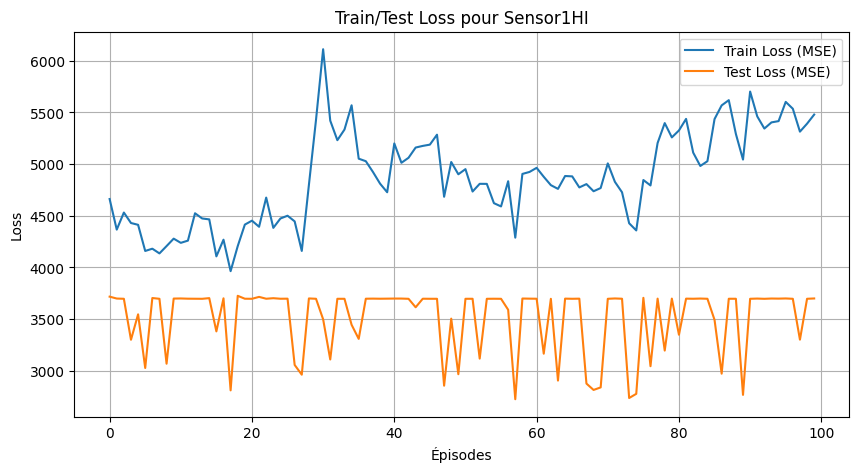


🚀 Traitement : Sensor2HI
Épisode 1/100 - Capteur Sensor2HI
Train Loss: 4909.2123 | Test Loss: 4356.6376 | RMSE: 66.0048 | S-score: -0.9004
Épisode 2/100 - Capteur Sensor2HI
Train Loss: 4996.7523 | Test Loss: 4362.3331 | RMSE: 66.0480 | S-score: -0.9010
Épisode 3/100 - Capteur Sensor2HI
Train Loss: 5130.8724 | Test Loss: 4355.3328 | RMSE: 65.9949 | S-score: -0.8997
Épisode 4/100 - Capteur Sensor2HI
Train Loss: 4721.9660 | Test Loss: 4356.5694 | RMSE: 66.0043 | S-score: -0.9004
Épisode 5/100 - Capteur Sensor2HI
Train Loss: 4683.7492 | Test Loss: 4356.3960 | RMSE: 66.0030 | S-score: -0.8972
Épisode 6/100 - Capteur Sensor2HI
Train Loss: 4916.3753 | Test Loss: 4363.2422 | RMSE: 66.0548 | S-score: -0.8965
Épisode 7/100 - Capteur Sensor2HI
Train Loss: 4763.2661 | Test Loss: 4357.9025 | RMSE: 66.0144 | S-score: -0.9007
Épisode 8/100 - Capteur Sensor2HI
Train Loss: 4757.1296 | Test Loss: 4358.8879 | RMSE: 66.0219 | S-score: -0.8967
Épisode 9/100 - Capteur Sensor2HI
Train Loss: 4849.5650 | Test

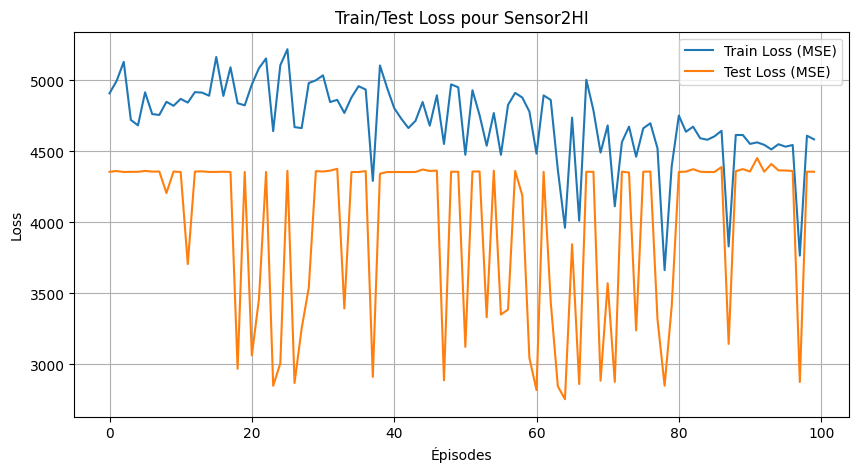


🚀 Traitement : Sensor3HI
Épisode 1/100 - Capteur Sensor3HI
Train Loss: 93.4083 | Test Loss: 87.6271 | RMSE: 9.3609 | S-score: -0.3716
Épisode 2/100 - Capteur Sensor3HI
Train Loss: 93.9574 | Test Loss: 87.5397 | RMSE: 9.3563 | S-score: -0.3699
Épisode 3/100 - Capteur Sensor3HI
Train Loss: 98.9724 | Test Loss: 94.9406 | RMSE: 9.7437 | S-score: -0.3907
Épisode 4/100 - Capteur Sensor3HI
Train Loss: 93.3853 | Test Loss: 87.7277 | RMSE: 9.3663 | S-score: -0.3550
Épisode 5/100 - Capteur Sensor3HI
Train Loss: 98.9290 | Test Loss: 95.1997 | RMSE: 9.7570 | S-score: -0.4018
Épisode 6/100 - Capteur Sensor3HI
Train Loss: 96.9594 | Test Loss: 89.7278 | RMSE: 9.4725 | S-score: -0.3502
Épisode 7/100 - Capteur Sensor3HI
Train Loss: 93.8546 | Test Loss: 89.8100 | RMSE: 9.4768 | S-score: -0.3399
Épisode 8/100 - Capteur Sensor3HI
Train Loss: 94.3212 | Test Loss: 87.8211 | RMSE: 9.3713 | S-score: -0.3764
Épisode 9/100 - Capteur Sensor3HI
Train Loss: 94.0519 | Test Loss: 88.1453 | RMSE: 9.3886 | S-score: -

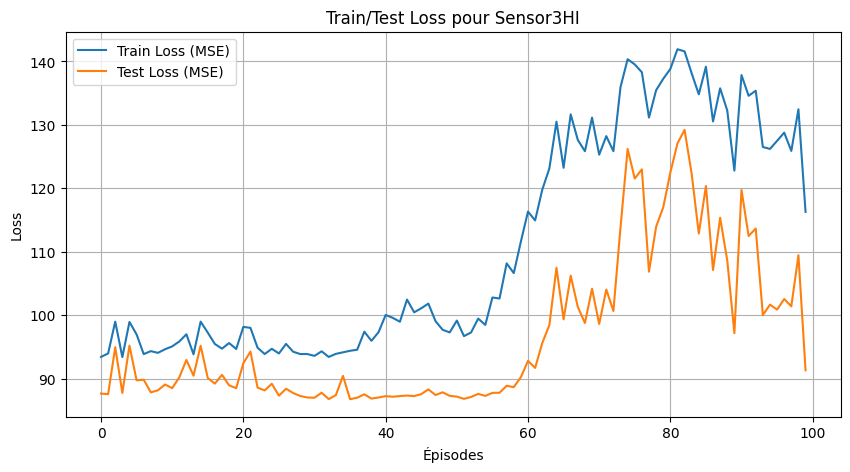


🚀 Traitement : Sensor4HI
Épisode 1/100 - Capteur Sensor4HI
Train Loss: 2658.2322 | Test Loss: 2529.2660 | RMSE: 50.2918 | S-score: -0.8934
Épisode 2/100 - Capteur Sensor4HI
Train Loss: 2475.6878 | Test Loss: 2161.7531 | RMSE: 46.4947 | S-score: -0.8370
Épisode 3/100 - Capteur Sensor4HI
Train Loss: 2490.1543 | Test Loss: 2164.2210 | RMSE: 46.5212 | S-score: -0.8158
Épisode 4/100 - Capteur Sensor4HI
Train Loss: 2454.4470 | Test Loss: 2149.9713 | RMSE: 46.3678 | S-score: -0.8363
Épisode 5/100 - Capteur Sensor4HI
Train Loss: 2417.9943 | Test Loss: 2115.3692 | RMSE: 45.9931 | S-score: -0.8352
Épisode 6/100 - Capteur Sensor4HI
Train Loss: 2638.2915 | Test Loss: 2237.7776 | RMSE: 47.3052 | S-score: -0.7788
Épisode 7/100 - Capteur Sensor4HI
Train Loss: 2467.7622 | Test Loss: 2165.0312 | RMSE: 46.5299 | S-score: -0.8585
Épisode 8/100 - Capteur Sensor4HI
Train Loss: 2554.6091 | Test Loss: 2217.5673 | RMSE: 47.0911 | S-score: -0.8552
Épisode 9/100 - Capteur Sensor4HI
Train Loss: 2477.9612 | Test

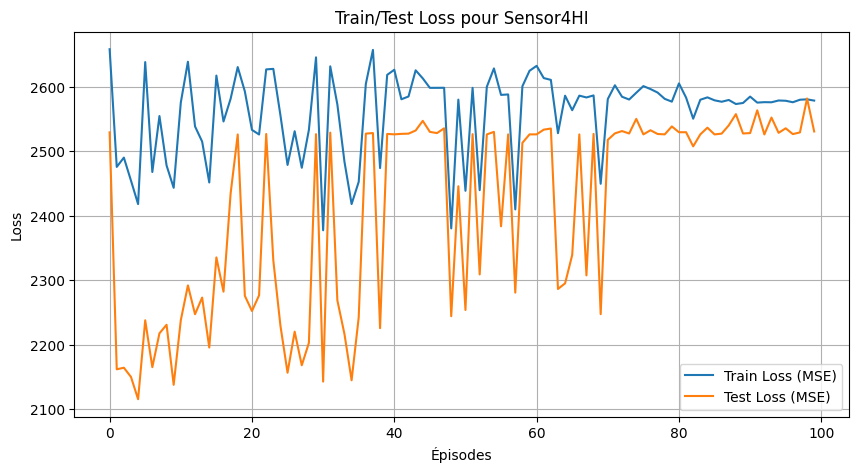


🚀 Traitement : Sensor6HI
Épisode 1/100 - Capteur Sensor6HI
Train Loss: 12092.6019 | Test Loss: 9915.3080 | RMSE: 99.5756 | S-score: -0.9437
Épisode 2/100 - Capteur Sensor6HI
Train Loss: 11873.9942 | Test Loss: 9325.0251 | RMSE: 96.5662 | S-score: -0.9474
Épisode 3/100 - Capteur Sensor6HI
Train Loss: 12472.9310 | Test Loss: 9913.0922 | RMSE: 99.5645 | S-score: -0.9473
Épisode 4/100 - Capteur Sensor6HI
Train Loss: 13003.9079 | Test Loss: 9914.7374 | RMSE: 99.5728 | S-score: -0.9483
Épisode 5/100 - Capteur Sensor6HI
Train Loss: 14313.2348 | Test Loss: 9913.0522 | RMSE: 99.5643 | S-score: -0.9456
Épisode 6/100 - Capteur Sensor6HI
Train Loss: 13610.8716 | Test Loss: 9913.0360 | RMSE: 99.5642 | S-score: -0.9457
Épisode 7/100 - Capteur Sensor6HI
Train Loss: 12843.6709 | Test Loss: 9913.3966 | RMSE: 99.5660 | S-score: -0.9449
Épisode 8/100 - Capteur Sensor6HI
Train Loss: 13735.2693 | Test Loss: 9917.8263 | RMSE: 99.5883 | S-score: -0.9495
Épisode 9/100 - Capteur Sensor6HI
Train Loss: 13738.23

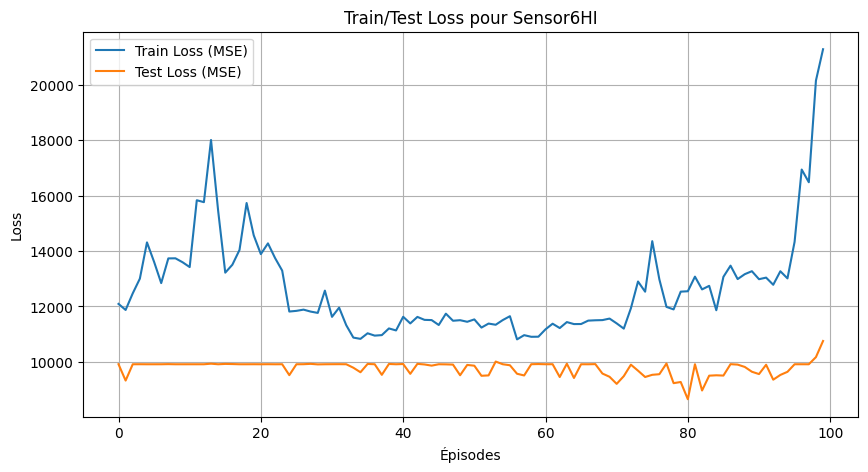


🚀 Traitement : Sensor7HI
Épisode 1/100 - Capteur Sensor7HI
Train Loss: 3918.4801 | Test Loss: 3046.7433 | RMSE: 55.1973 | S-score: -0.8463
Épisode 2/100 - Capteur Sensor7HI
Train Loss: 3881.9857 | Test Loss: 3046.6706 | RMSE: 55.1967 | S-score: -0.8486
Épisode 3/100 - Capteur Sensor7HI
Train Loss: 3911.8435 | Test Loss: 3047.3801 | RMSE: 55.2031 | S-score: -0.8489
Épisode 4/100 - Capteur Sensor7HI
Train Loss: 3628.0624 | Test Loss: 3045.9502 | RMSE: 55.1901 | S-score: -0.8469
Épisode 5/100 - Capteur Sensor7HI
Train Loss: 3691.0649 | Test Loss: 3046.9137 | RMSE: 55.1989 | S-score: -0.8487
Épisode 6/100 - Capteur Sensor7HI
Train Loss: 3661.9100 | Test Loss: 3045.4891 | RMSE: 55.1859 | S-score: -0.8476
Épisode 7/100 - Capteur Sensor7HI
Train Loss: 4086.5849 | Test Loss: 3048.7237 | RMSE: 55.2152 | S-score: -0.8452
Épisode 8/100 - Capteur Sensor7HI
Train Loss: 3972.3101 | Test Loss: 3045.8594 | RMSE: 55.1893 | S-score: -0.8469
Épisode 9/100 - Capteur Sensor7HI
Train Loss: 4001.9040 | Test

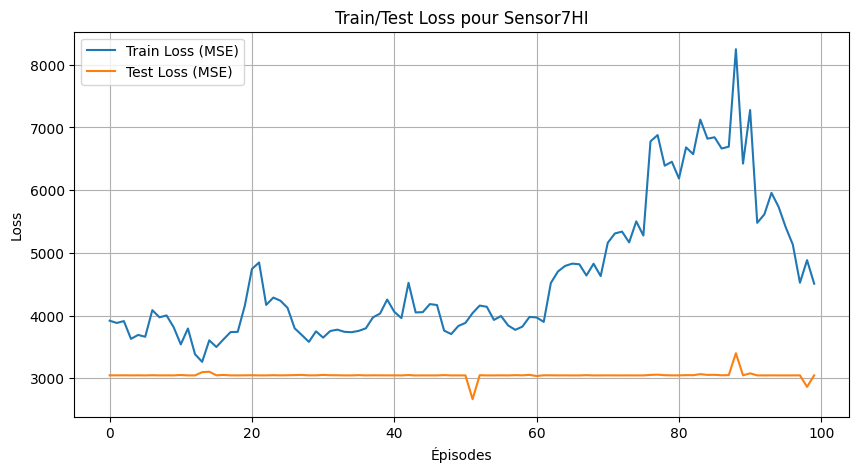


🚀 Traitement : Sensor8HI
Épisode 1/100 - Capteur Sensor8HI
Train Loss: 3974.4366 | Test Loss: 3022.1489 | RMSE: 54.9741 | S-score: -0.9044
Épisode 2/100 - Capteur Sensor8HI
Train Loss: 4919.6500 | Test Loss: 3070.3723 | RMSE: 55.4109 | S-score: -0.9134
Épisode 3/100 - Capteur Sensor8HI
Train Loss: 4015.0479 | Test Loss: 2860.9768 | RMSE: 53.4881 | S-score: -0.8868
Épisode 4/100 - Capteur Sensor8HI
Train Loss: 4168.4378 | Test Loss: 2794.5163 | RMSE: 52.8632 | S-score: -0.8887
Épisode 5/100 - Capteur Sensor8HI
Train Loss: 4029.3972 | Test Loss: 2679.5010 | RMSE: 51.7639 | S-score: -0.8683
Épisode 6/100 - Capteur Sensor8HI
Train Loss: 4230.7541 | Test Loss: 2828.8182 | RMSE: 53.1866 | S-score: -0.8812
Épisode 7/100 - Capteur Sensor8HI
Train Loss: 3752.5861 | Test Loss: 2809.3998 | RMSE: 53.0038 | S-score: -0.8854
Épisode 8/100 - Capteur Sensor8HI
Train Loss: 4320.8676 | Test Loss: 4019.7102 | RMSE: 63.4012 | S-score: -0.8921
Épisode 9/100 - Capteur Sensor8HI
Train Loss: 3945.7954 | Test

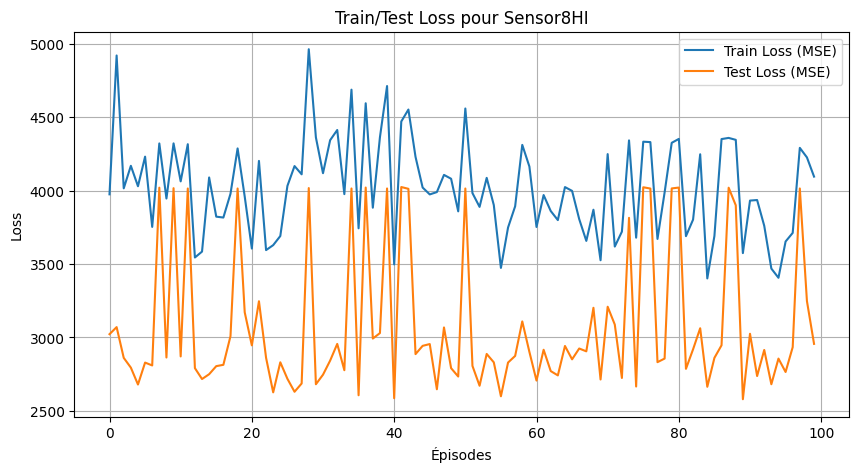


🚀 Traitement : Sensor9HI
Épisode 1/100 - Capteur Sensor9HI
Train Loss: 988.3095 | Test Loss: 935.4009 | RMSE: 30.5843 | S-score: -0.7574
Épisode 2/100 - Capteur Sensor9HI
Train Loss: 986.2955 | Test Loss: 902.3685 | RMSE: 30.0394 | S-score: -0.7571
Épisode 3/100 - Capteur Sensor9HI
Train Loss: 954.5686 | Test Loss: 872.5210 | RMSE: 29.5385 | S-score: -0.7245
Épisode 4/100 - Capteur Sensor9HI
Train Loss: 941.5448 | Test Loss: 869.9121 | RMSE: 29.4943 | S-score: -0.7534
Épisode 5/100 - Capteur Sensor9HI
Train Loss: 963.0879 | Test Loss: 939.5889 | RMSE: 30.6527 | S-score: -0.7693
Épisode 6/100 - Capteur Sensor9HI
Train Loss: 964.3585 | Test Loss: 890.4898 | RMSE: 29.8411 | S-score: -0.7439
Épisode 7/100 - Capteur Sensor9HI
Train Loss: 955.0502 | Test Loss: 876.0968 | RMSE: 29.5989 | S-score: -0.7319
Épisode 8/100 - Capteur Sensor9HI
Train Loss: 969.1197 | Test Loss: 935.8327 | RMSE: 30.5914 | S-score: -0.7483
Épisode 9/100 - Capteur Sensor9HI
Train Loss: 963.2257 | Test Loss: 935.7814 |

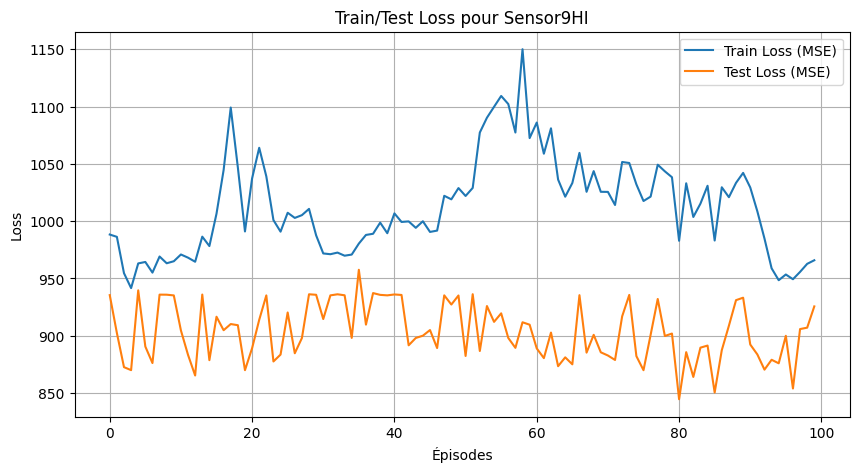


🚀 Traitement : Sensor10HI
Épisode 1/100 - Capteur Sensor10HI
Train Loss: 1139.0329 | Test Loss: 1059.9477 | RMSE: 32.5568 | S-score: -0.7824
Épisode 2/100 - Capteur Sensor10HI
Train Loss: 1119.4789 | Test Loss: 1070.8585 | RMSE: 32.7240 | S-score: -0.7847
Épisode 3/100 - Capteur Sensor10HI
Train Loss: 1112.9128 | Test Loss: 1071.7785 | RMSE: 32.7380 | S-score: -0.7916
Épisode 4/100 - Capteur Sensor10HI
Train Loss: 1114.1850 | Test Loss: 1068.9641 | RMSE: 32.6950 | S-score: -0.7882
Épisode 5/100 - Capteur Sensor10HI
Train Loss: 1109.8999 | Test Loss: 1073.6142 | RMSE: 32.7661 | S-score: -0.7921
Épisode 6/100 - Capteur Sensor10HI
Train Loss: 1092.1927 | Test Loss: 1070.5140 | RMSE: 32.7187 | S-score: -0.7851
Épisode 7/100 - Capteur Sensor10HI
Train Loss: 1094.3927 | Test Loss: 1069.0064 | RMSE: 32.6957 | S-score: -0.7879
Épisode 8/100 - Capteur Sensor10HI
Train Loss: 1097.5151 | Test Loss: 1071.6122 | RMSE: 32.7355 | S-score: -0.7915
Épisode 9/100 - Capteur Sensor10HI
Train Loss: 1089.6

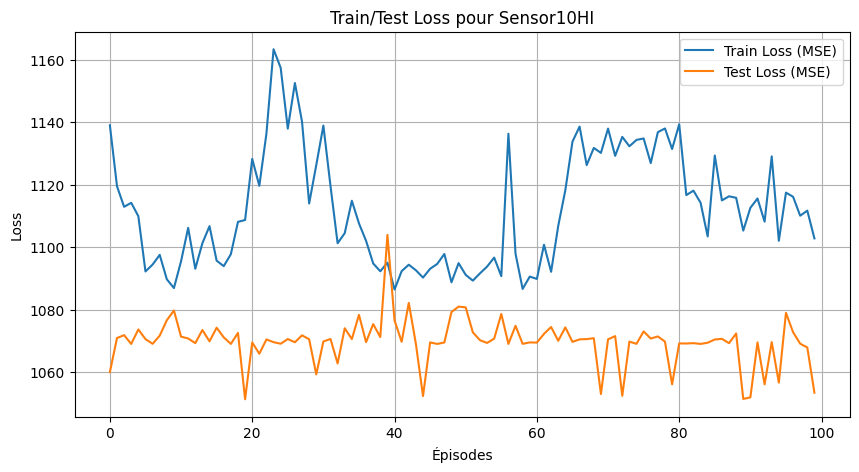


🚀 Traitement : Sensor11HI
Épisode 1/100 - Capteur Sensor11HI
Train Loss: 13.7339 | Test Loss: 11.9532 | RMSE: 3.4573 | S-score: -0.1576
Épisode 2/100 - Capteur Sensor11HI
Train Loss: 13.2490 | Test Loss: 11.8661 | RMSE: 3.4447 | S-score: -0.1562
Épisode 3/100 - Capteur Sensor11HI
Train Loss: 13.3119 | Test Loss: 11.9751 | RMSE: 3.4605 | S-score: -0.1690
Épisode 4/100 - Capteur Sensor11HI
Train Loss: 13.0084 | Test Loss: 11.9697 | RMSE: 3.4597 | S-score: -0.1676
Épisode 5/100 - Capteur Sensor11HI
Train Loss: 13.1320 | Test Loss: 11.8823 | RMSE: 3.4471 | S-score: -0.1600
Épisode 6/100 - Capteur Sensor11HI
Train Loss: 12.9494 | Test Loss: 11.7368 | RMSE: 3.4259 | S-score: -0.1597
Épisode 7/100 - Capteur Sensor11HI
Train Loss: 13.0114 | Test Loss: 11.9741 | RMSE: 3.4604 | S-score: -0.1638
Épisode 8/100 - Capteur Sensor11HI
Train Loss: 14.1573 | Test Loss: 12.0732 | RMSE: 3.4746 | S-score: -0.1705
Épisode 9/100 - Capteur Sensor11HI
Train Loss: 13.6191 | Test Loss: 11.9568 | RMSE: 3.4579 | 

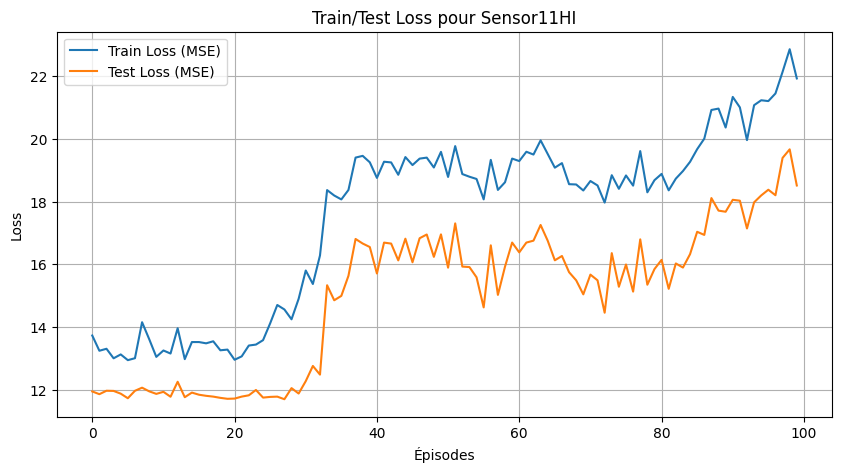


📊 Résumé des performances :

            RMSE final  S-score final
Sensor1HI    60.827000         -0.888
Sensor2HI    66.007004         -0.897
Sensor3HI     9.555000         -0.347
Sensor4HI    50.306000         -0.872
Sensor6HI   103.700996         -0.941
Sensor7HI    55.192001         -0.848
Sensor8HI    54.370998         -0.908
Sensor9HI    30.423000         -0.751
Sensor10HI   32.455002         -0.777
Sensor11HI    4.302000         -0.176


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader

# ==== CONFIG ====
SEQ_LEN = 30
EPISODES = 100  # Nombre d'épisodes RLHT
BATCH_SIZE = 64
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ACTION_SPACE = ['inc_lr', 'dec_lr', 'inc_lstm', 'dec_lstm', 'inc_cnn', 'dec_cnn']
HYPERPARAM_BOUNDS = {'lr': [1e-5, 1e-1], 'lstm': [32, 256], 'cnn': [16, 128]}

# ==== Dataset ====
class SensorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# ==== Modèle Hybride ====
class HybridModel(nn.Module):
    def __init__(self, input_size, cnn_filters, lstm_hidden):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(input_size, cnn_filters, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(cnn_filters, cnn_filters*2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=cnn_filters*2, nhead=2, batch_first=True),
            num_layers=1)
        self.lstm = nn.LSTM(cnn_filters*2, lstm_hidden, num_layers=2,
                            batch_first=True, dropout=0.2)
        self.regressor = nn.Sequential(
            nn.Linear(lstm_hidden, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.cnn(x.permute(0, 2, 1)).permute(0, 2, 1)
        x = self.transformer(x)
        x, _ = self.lstm(x)
        return self.regressor(x[:, -1, :])

# ==== Q-Network RLHT ====
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, action_size)
    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.out(x)

class ReplayBuffer:
    def __init__(self, capacity): self.buffer = deque(maxlen=capacity)
    def push(self, t): self.buffer.append(t)
    def sample(self, size): return random.sample(self.buffer, size)
    def __len__(self): return len(self.buffer)

class RLHTAgent:
    def __init__(self, state_size, action_size, lr=1e-3, gamma=0.9,
                 eps=1.0, eps_min=0.05, eps_decay=0.95):
        self.q_net = QNetwork(state_size, action_size).float().to(DEVICE)
        self.target_net = QNetwork(state_size, action_size).float().to(DEVICE)
        self.target_net.load_state_dict(self.q_net.state_dict())
        self.memory = ReplayBuffer(10000)
        self.opt = optim.Adam(self.q_net.parameters(), lr=lr)
        self.gamma = gamma
        self.eps = eps
        self.eps_min = eps_min
        self.eps_decay = eps_decay
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.eps:
            return random.randint(0, len(ACTION_SPACE)-1)
        with torch.no_grad():
            state_t = torch.FloatTensor(state).to(DEVICE)
            return torch.argmax(self.q_net(state_t)).item()

    def remember(self, t): self.memory.push(t)

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        batch = self.memory.sample(batch_size)
        for s, a, r, s_next in batch:
            s, s_next = torch.FloatTensor(s).to(DEVICE), torch.FloatTensor(s_next).to(DEVICE)
            target = self.q_net(s).detach()
            target[a] = r + self.gamma * torch.max(self.target_net(s_next)).item()
            output = self.q_net(s)[a]
            loss = self.loss_fn(output, target[a])
            self.opt.zero_grad()
            loss.backward()
            self.opt.step()
        self.eps = max(self.eps * self.eps_decay, self.eps_min)

# ==== Utilitaires ====
def apply_action(p, a):
    if ACTION_SPACE[a] == 'inc_lr': p['lr'] = min(p['lr'] * 1.5, HYPERPARAM_BOUNDS['lr'][1])
    elif ACTION_SPACE[a] == 'dec_lr': p['lr'] = max(p['lr'] / 1.5, HYPERPARAM_BOUNDS['lr'][0])
    elif ACTION_SPACE[a] == 'inc_lstm': p['lstm'] = min(p['lstm'] + 16, HYPERPARAM_BOUNDS['lstm'][1])
    elif ACTION_SPACE[a] == 'dec_lstm': p['lstm'] = max(p['lstm'] - 16, HYPERPARAM_BOUNDS['lstm'][0])
    elif ACTION_SPACE[a] == 'inc_cnn': p['cnn'] = min(p['cnn'] + 8, HYPERPARAM_BOUNDS['cnn'][1])
    elif ACTION_SPACE[a] == 'dec_cnn': p['cnn'] = max(p['cnn'] - 8, HYPERPARAM_BOUNDS['cnn'][0])
    return p

def preprocess(df):
    df.columns = df.columns.str.strip()
    if 'RUL_jour' not in df.columns:
        return None, None
    if 'Heure' in df.columns:
        df = df.drop(columns=['Heure'])
    y = df['RUL_jour'].values
    X = df.drop(columns=[c for c in df.columns if 'RUL' in c], errors='ignore')
    X_scaled = StandardScaler().fit_transform(X)
    segs, labels = [], []
    for i in range(len(X_scaled) - SEQ_LEN):
        segs.append(X_scaled[i:i+SEQ_LEN])
        labels.append(y[i+SEQ_LEN-1])
    return np.array(segs), np.array(labels)

def rmse_metric(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def s_score_metric(y_true, y_pred):
    error = y_pred - y_true
    score = np.where(error >= 0,
                     np.exp(-error / 13) - 1,
                     np.exp(error / 10) - 1)
    return np.mean(score)

def plot_rul_prediction(engine_ids, true_rul, predicted_rul, sensor_name="SensorXHI"):
    true_rul = np.array(true_rul)
    predicted_rul = np.array(predicted_rul)
    error = np.abs(predicted_rul - true_rul)

    plt.figure(figsize=(10, 5))
    plt.plot(engine_ids, predicted_rul, 'b-', label='Predicted RUL')
    plt.plot(engine_ids, true_rul, 'ro', label='True RUL')
    plt.fill_between(engine_ids, predicted_rul - error, predicted_rul + error,
                     color='orange', alpha=0.3, label='Error Range')

    plt.title(f"RUL Prediction for {sensor_name}", fontsize=13)
    plt.xlabel("Sample Index")
    plt.ylabel("Remaining Useful Life (RUL)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{sensor_name}_rul_prediction.png")
    plt.close()

# ==== Boucle principale ====
xls = pd.ExcelFile("10_Sensor_Data_with_Rul.xlsx")
results_rmse = {}
results_sscore = {}

for sheet in xls.sheet_names:
    print(f"\n🚀 Traitement : {sheet}")
    df = pd.read_excel(xls, sheet_name=sheet).dropna()
    X, y = preprocess(df)
    if X is None or len(X) < 200:
        print(f"❌ Données insuffisantes : {sheet}")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    agent = RLHTAgent(state_size=3, action_size=len(ACTION_SPACE))
    params = {'lr': 1e-3, 'lstm': 64, 'cnn': 32}

    train_losses, test_losses = [], []

    for ep in range(EPISODES):
        print(f"Épisode {ep+1}/{EPISODES} - Capteur {sheet}")
        state = [params['lr'], params['lstm'], params['cnn']]
        action = agent.act(state)
        params = apply_action(params, action)

        model = HybridModel(X.shape[2], params['cnn'], params['lstm']).to(DEVICE)
        optimizer = optim.Adam(model.parameters(), lr=params['lr'])
        train_loader = DataLoader(SensorDataset(X_train, y_train), batch_size=64, shuffle=True)
        test_loader = DataLoader(SensorDataset(X_test, y_test), batch_size=64)

        # Train
        model.train()
        running_train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE).view(-1, 1)
            optimizer.zero_grad()
            pred = model(xb)
            loss = nn.MSELoss()(pred, yb)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * xb.size(0)
        train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Test
        model.eval()
        running_test_loss = 0
        y_pred, y_true = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE).view(-1, 1)
                pred = model(xb)
                loss = nn.MSELoss()(pred, yb)
                running_test_loss += loss.item() * xb.size(0)
                y_pred.extend(pred.cpu().numpy().flatten())
                y_true.extend(yb.cpu().numpy().flatten())
        test_loss = running_test_loss / len(test_loader.dataset)
        test_losses.append(test_loss)

        rmse_val = rmse_metric(np.array(y_true), np.array(y_pred))
        sscore_val = s_score_metric(np.array(y_true), np.array(y_pred))

        print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | RMSE: {rmse_val:.4f} | S-score: {sscore_val:.4f}")

        reward = -rmse_val
        next_state = [params['lr'], params['lstm'], params['cnn']]
        agent.remember((state, action, reward, next_state))
        agent.replay()
        agent.target_net.load_state_dict(agent.q_net.state_dict())

    results_rmse[sheet] = rmse_val
    results_sscore[sheet] = sscore_val

    # Courbes train/test loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss (RMSE)")
    plt.plot(test_losses, label="Test Loss (RMSE)")
    plt.title(f"Train/Test Loss pour {sheet}")
    plt.xlabel("Épisodes")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualisation RUL prédits vs réels
    engine_ids = list(range(len(y_true)))
    plot_rul_prediction(engine_ids, y_true, y_pred, sensor_name=sheet)

# Résumé performances
df_final = pd.DataFrame({
    "RMSE final": results_rmse,
    "S-score final": results_sscore
})
print("\n📊 Résumé des performances :\n")
print(df_final.round(3))


## Version2

In [29]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader

# ==== CONFIG ====
SEQ_LEN = 30
EPISODES = 100
BATCH_SIZE = 64
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ACTION_SPACE = ['inc_lr', 'dec_lr', 'inc_lstm', 'dec_lstm', 'inc_cnn', 'dec_cnn']
HYPERPARAM_BOUNDS = {'lr': [1e-5, 1e-1], 'lstm': [32, 256], 'cnn': [16, 128]}

# ==== Dataset ====
class SensorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# ==== Modèle Hybride ====
class HybridModel(nn.Module):
    def __init__(self, input_size, cnn_filters, lstm_hidden):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(input_size, cnn_filters, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(cnn_filters, cnn_filters*2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=cnn_filters*2, nhead=2, batch_first=True),
            num_layers=1)
        self.lstm = nn.LSTM(cnn_filters*2, lstm_hidden, num_layers=2,
                            batch_first=True, dropout=0.2)
        self.regressor = nn.Sequential(
            nn.Linear(lstm_hidden, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        x = self.cnn(x.permute(0, 2, 1)).permute(0, 2, 1)
        x = self.transformer(x)
        x, _ = self.lstm(x)
        return self.regressor(x[:, -1, :])

# ==== Q-Network RLHT ====
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, action_size)
    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.out(x)

class ReplayBuffer:
    def __init__(self, capacity): self.buffer = deque(maxlen=capacity)
    def push(self, t): self.buffer.append(t)
    def sample(self, size): return random.sample(self.buffer, size)
    def __len__(self): return len(self.buffer)

class RLHTAgent:
    def __init__(self, state_size, action_size, lr=1e-3, gamma=0.9,
                 eps=1.0, eps_min=0.05, eps_decay=0.95):
        self.q_net = QNetwork(state_size, action_size).float().to(DEVICE)
        self.target_net = QNetwork(state_size, action_size).float().to(DEVICE)
        self.target_net.load_state_dict(self.q_net.state_dict())
        self.memory = ReplayBuffer(10000)
        self.opt = optim.Adam(self.q_net.parameters(), lr=lr)
        self.gamma = gamma
        self.eps = eps
        self.eps_min = eps_min
        self.eps_decay = eps_decay
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if random.random() < self.eps:
            return random.randint(0, len(ACTION_SPACE)-1)
        with torch.no_grad():
            state_t = torch.FloatTensor(state).to(DEVICE)
            return torch.argmax(self.q_net(state_t)).item()

    def remember(self, t): self.memory.push(t)

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return
        batch = self.memory.sample(batch_size)
        for s, a, r, s_next in batch:
            s, s_next = torch.FloatTensor(s).to(DEVICE), torch.FloatTensor(s_next).to(DEVICE)
            target = self.q_net(s).detach()
            target[a] = r + self.gamma * torch.max(self.target_net(s_next)).item()
            output = self.q_net(s)[a]
            loss = self.loss_fn(output, target[a])
            self.opt.zero_grad()
            loss.backward()
            self.opt.step()
        self.eps = max(self.eps * self.eps_decay, self.eps_min)

# ==== Utilitaires ====
def apply_action(p, a):
    if ACTION_SPACE[a] == 'inc_lr': p['lr'] = min(p['lr'] * 1.5, HYPERPARAM_BOUNDS['lr'][1])
    elif ACTION_SPACE[a] == 'dec_lr': p['lr'] = max(p['lr'] / 1.5, HYPERPARAM_BOUNDS['lr'][0])
    elif ACTION_SPACE[a] == 'inc_lstm': p['lstm'] = min(p['lstm'] + 16, HYPERPARAM_BOUNDS['lstm'][1])
    elif ACTION_SPACE[a] == 'dec_lstm': p['lstm'] = max(p['lstm'] - 16, HYPERPARAM_BOUNDS['lstm'][0])
    elif ACTION_SPACE[a] == 'inc_cnn': p['cnn'] = min(p['cnn'] + 8, HYPERPARAM_BOUNDS['cnn'][1])
    elif ACTION_SPACE[a] == 'dec_cnn': p['cnn'] = max(p['cnn'] - 8, HYPERPARAM_BOUNDS['cnn'][0])
    return p

def preprocess(df):
    df.columns = df.columns.str.strip()
    if 'RUL_jour' not in df.columns:
        return None, None
    if 'Heure' in df.columns:
        df = df.drop(columns=['Heure'])
    y = df['RUL_jour'].values
    X = df.drop(columns=[c for c in df.columns if 'RUL' in c], errors='ignore')
    X_scaled = StandardScaler().fit_transform(X)
    segs, labels = [], []
    for i in range(len(X_scaled) - SEQ_LEN):
        segs.append(X_scaled[i:i+SEQ_LEN])
        labels.append(y[i+SEQ_LEN-1])
    return np.array(segs), np.array(labels)

def rmse_metric(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def s_score_metric(y_true, y_pred):
    error = y_pred - y_true
    score = np.where(error >= 0,
                     np.exp(-error / 13) - 1,
                     np.exp(error / 10) - 1)
    return np.mean(score)

def plot_rul_prediction(engine_ids, true_rul, predicted_rul, sensor_name="SensorXHI"):
    true_rul = np.array(true_rul)
    predicted_rul = np.array(predicted_rul)
    error = np.abs(predicted_rul - true_rul)

    plt.figure(figsize=(10, 5))
    plt.plot(engine_ids, predicted_rul, 'b-', label='Predicted RUL')
    plt.plot(engine_ids, true_rul, 'ro', label='True RUL')
    plt.fill_between(engine_ids, predicted_rul - error, predicted_rul + error,
                     color='orange', alpha=0.3, label='Error Range')

    plt.title(f"RUL Prediction for {sensor_name}", fontsize=13)
    plt.xlabel("Sample Index")
    plt.ylabel("Remaining Useful Life (RUL)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{sensor_name}_rul_prediction.png")
    plt.close()

# ==== Boucle principale ====
xls = pd.ExcelFile("10_Sensor_Data_with_Rul.xlsx")
results_rmse = {}
results_sscore = {}

for sheet in xls.sheet_names:
    print(f"\n🚀 Traitement : {sheet}")
    df = pd.read_excel(xls, sheet_name=sheet).dropna()
    X, y = preprocess(df)
    if X is None or len(X) < 200:
        print(f"❌ Données insuffisantes : {sheet}")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    agent = RLHTAgent(state_size=3, action_size=len(ACTION_SPACE))
    params = {'lr': 1e-3, 'lstm': 64, 'cnn': 32}

    train_losses, test_losses = [], []

    for ep in range(EPISODES):
        print(f"Épisode {ep+1}/{EPISODES} - Capteur {sheet}")
        state = [params['lr'], params['lstm'], params['cnn']]
        action = agent.act(state)
        params = apply_action(params, action)

        model = HybridModel(X.shape[2], params['cnn'], params['lstm']).to(DEVICE)
        optimizer = optim.Adam(model.parameters(), lr=params['lr'])
        train_loader = DataLoader(SensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
        test_loader = DataLoader(SensorDataset(X_test, y_test), batch_size=BATCH_SIZE)

        # Entraînement
        model.train()
        running_train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE).view(-1, 1)
            optimizer.zero_grad()
            pred = model(xb)
            loss = nn.MSELoss()(pred, yb)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * xb.size(0)
        train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Évaluation
        model.eval()
        running_test_loss = 0
        y_pred, y_true = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE).view(-1, 1)
                pred = model(xb)
                loss = nn.MSELoss()(pred, yb)
                running_test_loss += loss.item() * xb.size(0)
                y_pred.extend(pred.cpu().numpy().flatten())
                y_true.extend(yb.cpu().numpy().flatten())
        test_loss = running_test_loss / len(test_loader.dataset)
        test_losses.append(test_loss)

        rmse_val = rmse_metric(np.array(y_true), np.array(y_pred))
        sscore_val = s_score_metric(np.array(y_true), np.array(y_pred))

        print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | RMSE: {rmse_val:.4f} | S-score: {sscore_val:.4f}")

        reward = -rmse_val
        next_state = [params['lr'], params['lstm'], params['cnn']]
        agent.remember((state, action, reward, next_state))
        agent.replay()
        agent.target_net.load_state_dict(agent.q_net.state_dict())

    results_rmse[sheet] = rmse_val
    results_sscore[sheet] = sscore_val

    # Tracer les courbes de perte pour chaque capteur
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss (MSE)")
    plt.plot(test_losses, label="Test Loss (MSE)")
    plt.title(f"Train/Test Loss pour {sheet}")
    plt.xlabel("Épisodes")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualiser la prédiction du RUL
    engine_ids = list(range(len(y_true)))
    plot_rul_prediction(engine_ids, y_true, y_pred, sensor_name=sheet)

# Résumé des performances
df_final = pd.DataFrame({
    "RMSE final": results_rmse,
    "S-score final": results_sscore
})
print("\n📊 Résumé des performances :\n")
print(df_final.round(3))



🚀 Traitement : Sensor1HI
Épisode 1/100 - Capteur Sensor1HI
Train Loss: 4275.8167 | Test Loss: 3698.3978 | RMSE: 60.8145 | S-score: -0.8891
Épisode 2/100 - Capteur Sensor1HI
Train Loss: 4582.4082 | Test Loss: 3696.7302 | RMSE: 60.8007 | S-score: -0.8888
Épisode 3/100 - Capteur Sensor1HI
Train Loss: 4353.7912 | Test Loss: 2825.1089 | RMSE: 53.1518 | S-score: -0.8603
Épisode 4/100 - Capteur Sensor1HI
Train Loss: 4712.4859 | Test Loss: 3696.7080 | RMSE: 60.8006 | S-score: -0.8886
Épisode 5/100 - Capteur Sensor1HI
Train Loss: 5330.0073 | Test Loss: 3696.7881 | RMSE: 60.8012 | S-score: -0.8888
Épisode 6/100 - Capteur Sensor1HI
Train Loss: 5546.2613 | Test Loss: 3697.3789 | RMSE: 60.8061 | S-score: -0.8885
Épisode 7/100 - Capteur Sensor1HI
Train Loss: 5211.5533 | Test Loss: 3697.3169 | RMSE: 60.8056 | S-score: -0.8885
Épisode 8/100 - Capteur Sensor1HI
Train Loss: 5952.5342 | Test Loss: 2986.9810 | RMSE: 54.6533 | S-score: -0.8995
Épisode 9/100 - Capteur Sensor1HI
Train Loss: 5893.6928 | Test

KeyboardInterrupt: 

In [30]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR
import warnings
warnings.filterwarnings('ignore')

# ==== CONFIG AMÉLIORÉE ====
SEQ_LEN = 50  # Augmenté pour capturer plus de dépendances temporelles
EPISODES = 150  # Plus d'épisodes pour un meilleur apprentissage
BATCH_SIZE = 32  # Réduit pour une meilleure généralisation
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
PATIENCE = 15  # Early stopping
MIN_DELTA = 1e-4

ACTION_SPACE = ['inc_lr', 'dec_lr', 'inc_lstm', 'dec_lstm', 'inc_cnn', 'dec_cnn', 
                'inc_dropout', 'dec_dropout', 'change_scheduler']
HYPERPARAM_BOUNDS = {
    'lr': [1e-5, 1e-2], 
    'lstm': [32, 512], 
    'cnn': [16, 256],
    'dropout': [0.1, 0.6]
}

# ==== Dataset Amélioré ====
class SensorDataset(Dataset):
    def __init__(self, X, y, augment=False):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.augment = augment
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        x, y = self.X[idx], self.y[idx]
        if self.augment and random.random() < 0.3:
            # Ajout de bruit gaussien léger
            noise = torch.randn_like(x) * 0.01
            x = x + noise
        return x, y

# ==== Modèle Hybride Amélioré ====
class ImprovedHybridModel(nn.Module):
    def __init__(self, input_size, cnn_filters, lstm_hidden, dropout_rate=0.3):
        super().__init__()
        
        # CNN avec BatchNorm et Dropout
        self.cnn = nn.Sequential(
            nn.Conv1d(input_size, cnn_filters, kernel_size=5, padding=2),
            nn.BatchNorm1d(cnn_filters),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
            nn.Conv1d(cnn_filters, cnn_filters, kernel_size=3, padding=1),
            nn.BatchNorm1d(cnn_filters),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(cnn_filters, cnn_filters * 2, kernel_size=3, padding=1),
            nn.BatchNorm1d(cnn_filters * 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
            nn.MaxPool1d(2)
        )
        
        # Transformer amélioré
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=cnn_filters * 2, 
                nhead=4, 
                dim_feedforward=cnn_filters * 4,
                dropout=dropout_rate * 0.5,
                batch_first=True
            ),
            num_layers=2
        )
        
        # LSTM bidirectionnel
        self.lstm = nn.LSTM(
            cnn_filters * 2, 
            lstm_hidden, 
            num_layers=3,
            batch_first=True, 
            dropout=dropout_rate,
            bidirectional=True
        )
        
        # Attention mechanism
        self.attention = nn.MultiheadAttention(
            embed_dim=lstm_hidden * 2, 
            num_heads=4, 
            dropout=dropout_rate * 0.5,
            batch_first=True
        )
        
        # Régression avec skip connections
        self.regressor = nn.Sequential(
            nn.Linear(lstm_hidden * 2, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        
        # Skip connection
        self.skip_connection = nn.Linear(input_size, 1)
        
    def forward(self, x):
        batch_size = x.size(0)
        
        # Skip connection pour les informations résiduelles
        skip = self.skip_connection(x.mean(dim=1))
        
        # CNN
        x_cnn = self.cnn(x.permute(0, 2, 1)).permute(0, 2, 1)
        
        # Transformer
        x_trans = self.transformer(x_cnn)
        
        # LSTM
        x_lstm, _ = self.lstm(x_trans)
        
        # Attention
        x_att, _ = self.attention(x_lstm, x_lstm, x_lstm)
        
        # Prendre la dernière séquence
        x_final = x_att[:, -1, :]
        
        # Régression
        output = self.regressor(x_final)
        
        # Ajouter skip connection
        return output + skip * 0.1

# ==== Q-Network RLHT Amélioré ====
class ImprovedQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, action_size)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        return self.out(x)

class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.6):
        self.capacity = capacity
        self.buffer = []
        self.priorities = np.zeros((capacity,), dtype=np.float32)
        self.pos = 0
        self.alpha = alpha
        
    def push(self, transition):
        max_prio = self.priorities.max() if self.buffer else 1.0
        
        if len(self.buffer) < self.capacity:
            self.buffer.append(transition)
        else:
            self.buffer[self.pos] = transition
            
        self.priorities[self.pos] = max_prio
        self.pos = (self.pos + 1) % self.capacity
        
    def sample(self, batch_size, beta=0.4):
        if len(self.buffer) == self.capacity:
            prios = self.priorities
        else:
            prios = self.priorities[:self.pos]
            
        probs = prios ** self.alpha
        probs /= probs.sum()
        
        indices = np.random.choice(len(self.buffer), batch_size, p=probs)
        samples = [self.buffer[idx] for idx in indices]
        
        total = len(self.buffer)
        weights = (total * probs[indices]) ** (-beta)
        weights /= weights.max()
        
        return samples, indices, np.array(weights, dtype=np.float32)
    
    def update_priorities(self, indices, priorities):
        for idx, prio in zip(indices, priorities):
            self.priorities[idx] = prio
            
    def __len__(self):
        return len(self.buffer)

class ImprovedRLHTAgent:
    def __init__(self, state_size, action_size, lr=1e-3, gamma=0.95,
                 eps=1.0, eps_min=0.01, eps_decay=0.995):
        self.q_net = ImprovedQNetwork(state_size, action_size).float().to(DEVICE)
        self.target_net = ImprovedQNetwork(state_size, action_size).float().to(DEVICE)
        self.target_net.load_state_dict(self.q_net.state_dict())
        
        self.memory = PrioritizedReplayBuffer(20000)
        self.opt = optim.Adam(self.q_net.parameters(), lr=lr, weight_decay=1e-5)
        self.scheduler = ReduceLROnPlateau(self.opt, patience=10, factor=0.5)
        
        self.gamma = gamma
        self.eps = eps
        self.eps_min = eps_min
        self.eps_decay = eps_decay
        self.loss_fn = nn.HuberLoss()  # Plus robuste que MSE
        self.update_target_freq = 10
        self.step_count = 0

    def act(self, state):
        if random.random() < self.eps:
            return random.randint(0, len(ACTION_SPACE)-1)
        with torch.no_grad():
            state_t = torch.FloatTensor(state).unsqueeze(0).to(DEVICE)
            q_values = self.q_net(state_t)
            return torch.argmax(q_values).item()

    def remember(self, transition):
        self.memory.push(transition)

    def replay(self, batch_size=64):
        if len(self.memory) < batch_size:
            return
            
        batch, indices, weights = self.memory.sample(batch_size)
        weights = torch.FloatTensor(weights).to(DEVICE)
        
        states = torch.FloatTensor([t[0] for t in batch]).to(DEVICE)
        actions = torch.LongTensor([t[1] for t in batch]).to(DEVICE)
        rewards = torch.FloatTensor([t[2] for t in batch]).to(DEVICE)
        next_states = torch.FloatTensor([t[3] for t in batch]).to(DEVICE)
        
        current_q_values = self.q_net(states).gather(1, actions.unsqueeze(1))
        
        with torch.no_grad():
            next_q_values = self.target_net(next_states).max(1)[0]
            target_q_values = rewards + (self.gamma * next_q_values)
        
        td_errors = torch.abs(current_q_values.squeeze() - target_q_values)
        loss = (weights * self.loss_fn(current_q_values.squeeze(), target_q_values)).mean()
        
        self.opt.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.q_net.parameters(), 1.0)
        self.opt.step()
        
        # Mise à jour des priorités
        priorities = td_errors.detach().cpu().numpy() + 1e-6
        self.memory.update_priorities(indices, priorities)
        
        self.eps = max(self.eps * self.eps_decay, self.eps_min)
        self.step_count += 1
        
        if self.step_count % self.update_target_freq == 0:
            self.target_net.load_state_dict(self.q_net.state_dict())

# ==== Utilitaires Améliorés ====
def apply_action(params, action):
    p = params.copy()
    action_name = ACTION_SPACE[action]
    
    if action_name == 'inc_lr':
        p['lr'] = min(p['lr'] * 1.2, HYPERPARAM_BOUNDS['lr'][1])
    elif action_name == 'dec_lr':
        p['lr'] = max(p['lr'] / 1.2, HYPERPARAM_BOUNDS['lr'][0])
    elif action_name == 'inc_lstm':
        p['lstm'] = min(p['lstm'] + 32, HYPERPARAM_BOUNDS['lstm'][1])
    elif action_name == 'dec_lstm':
        p['lstm'] = max(p['lstm'] - 32, HYPERPARAM_BOUNDS['lstm'][0])
    elif action_name == 'inc_cnn':
        p['cnn'] = min(p['cnn'] + 16, HYPERPARAM_BOUNDS['cnn'][1])
    elif action_name == 'dec_cnn':
        p['cnn'] = max(p['cnn'] - 16, HYPERPARAM_BOUNDS['cnn'][0])
    elif action_name == 'inc_dropout':
        p['dropout'] = min(p['dropout'] + 0.05, HYPERPARAM_BOUNDS['dropout'][1])
    elif action_name == 'dec_dropout':
        p['dropout'] = max(p['dropout'] - 0.05, HYPERPARAM_BOUNDS['dropout'][0])
    elif action_name == 'change_scheduler':
        p['scheduler_type'] = 'cosine' if p.get('scheduler_type', 'plateau') == 'plateau' else 'plateau'
    
    return p

def improved_preprocess(df):
    """Préprocessing amélioré avec normalisation robuste"""
    df.columns = df.columns.str.strip()
    if 'RUL_jour' not in df.columns:
        return None, None
    
    # Supprimer les colonnes temporelles
    time_cols = [col for col in df.columns if any(x in col.lower() for x in ['heure', 'time', 'date'])]
    if time_cols:
        df = df.drop(columns=time_cols)
    
    y = df['RUL_jour'].values
    X = df.drop(columns=[c for c in df.columns if 'RUL' in c], errors='ignore')
    
    # Utiliser RobustScaler pour être moins sensible aux outliers
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Créer des séquences avec chevauchement
    segs, labels = [], []
    step_size = max(1, SEQ_LEN // 4)  # Chevauchement pour plus de données
    
    for i in range(0, len(X_scaled) - SEQ_LEN, step_size):
        segs.append(X_scaled[i:i+SEQ_LEN])
        labels.append(y[i+SEQ_LEN-1])
    
    return np.array(segs), np.array(labels)

def custom_loss_function(y_pred, y_true, alpha=0.5):
    """Loss personnalisée combinant MSE et MAE"""
    mse = F.mse_loss(y_pred, y_true)
    mae = F.l1_loss(y_pred, y_true)
    return alpha * mse + (1 - alpha) * mae

def train_model_with_early_stopping(model, train_loader, val_loader, optimizer, scheduler, epochs=50):
    """Entraînement avec early stopping"""
    best_val_loss = float('inf')
    patience_counter = 0
    train_losses, val_losses = [], []
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(DEVICE), y_batch.to(DEVICE).view(-1, 1)
            
            optimizer.zero_grad()
            predictions = model(x_batch)
            loss = custom_loss_function(predictions, y_batch)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for x_batch, y_batch in val_loader:
                x_batch, y_batch = x_batch.to(DEVICE), y_batch.to(DEVICE).view(-1, 1)
                predictions = model(x_batch)
                loss = custom_loss_function(predictions, y_batch)
                val_loss += loss.item()
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Scheduler update
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(val_loss)
        else:
            scheduler.step()
        
        # Early stopping
        if val_loss < best_val_loss - MIN_DELTA:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= PATIENCE:
            print(f"Early stopping à l'époque {epoch+1}")
            break
    
    return train_losses, val_losses

def rmse_metric(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def s_score_metric(y_true, y_pred):
    error = y_pred - y_true
    score = np.where(error >= 0,
                     np.exp(-error / 13) - 1,
                     np.exp(error / 10) - 1)
    return np.mean(score)

def plot_comprehensive_results(train_losses, val_losses, y_true, y_pred, sensor_name):
    """Visualisation complète des résultats"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss curves
    ax1.plot(train_losses, label='Train Loss', color='blue')
    ax1.plot(val_losses, label='Validation Loss', color='red')
    ax1.set_title(f'Courbes de perte - {sensor_name}')
    ax1.set_xlabel('Époques')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Prédictions vs Réalité
    ax2.scatter(y_true, y_pred, alpha=0.6, color='green')
    ax2.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    ax2.set_xlabel('RUL Réel')
    ax2.set_ylabel('RUL Prédit')
    ax2.set_title(f'Prédictions vs Réalité - {sensor_name}')
    ax2.grid(True)
    
    # Série temporelle
    indices = range(len(y_true))
    ax3.plot(indices, y_true, label='RUL Réel', color='blue', linewidth=2)
    ax3.plot(indices, y_pred, label='RUL Prédit', color='red', linewidth=2, alpha=0.7)
    ax3.fill_between(indices, y_true, y_pred, alpha=0.3, color='orange')
    ax3.set_title(f'Évolution temporelle - {sensor_name}')
    ax3.set_xlabel('Échantillon')
    ax3.set_ylabel('RUL')
    ax3.legend()
    ax3.grid(True)
    
    # Distribution des erreurs
    errors = y_pred - y_true
    ax4.hist(errors, bins=30, alpha=0.7, color='purple', edgecolor='black')
    ax4.axvline(0, color='red', linestyle='--', linewidth=2)
    ax4.set_title(f'Distribution des erreurs - {sensor_name}')
    ax4.set_xlabel('Erreur de prédiction')
    ax4.set_ylabel('Fréquence')
    ax4.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'{sensor_name}_comprehensive_results.png', dpi=300, bbox_inches='tight')
    plt.show()

# ==== Boucle principale améliorée ====
def main():
    xls = pd.ExcelFile("10_Sensor_Data_with_Rul.xlsx")
    results_rmse = {}
    results_sscore = {}
    all_results = []

    for sheet in xls.sheet_names:
        print(f"\n🚀 Traitement : {sheet}")
        print("="*50)
        
        df = pd.read_excel(xls, sheet_name=sheet).dropna()
        X, y = improved_preprocess(df)
        
        if X is None or len(X) < 300:
            print(f"❌ Données insuffisantes : {sheet}")
            continue

        # Division des données avec stratification
        X_train, X_temp, y_train, y_temp = train_test_split(
            X, y, test_size=0.4, random_state=42
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.5, random_state=42
        )
        
        print(f"Données d'entraînement: {len(X_train)}")
        print(f"Données de validation: {len(X_val)}")
        print(f"Données de test: {len(X_test)}")

        # Initialisation de l'agent RLHT
        agent = ImprovedRLHTAgent(state_size=4, action_size=len(ACTION_SPACE))
        params = {
            'lr': 1e-3, 
            'lstm': 128, 
            'cnn': 64, 
            'dropout': 0.3,
            'scheduler_type': 'plateau'
        }

        best_rmse = float('inf')
        best_model_state = None
        episode_results = []

        for episode in range(EPISODES):
            print(f"\nÉpisode {episode+1}/{EPISODES} - {sheet}")
            
            # Action de l'agent
            state = [params['lr'], params['lstm'], params['cnn'], params['dropout']]
            action = agent.act(state)
            new_params = apply_action(params, action)
            
            # Création du modèle
            model = ImprovedHybridModel(
                X.shape[2], 
                new_params['cnn'], 
                new_params['lstm'], 
                new_params['dropout']
            ).to(DEVICE)
            
            # Optimiseur et scheduler
            optimizer = optim.AdamW(
                model.parameters(), 
                lr=new_params['lr'], 
                weight_decay=1e-4
            )
            
            if new_params.get('scheduler_type') == 'cosine':
                scheduler = CosineAnnealingLR(optimizer, T_max=50)
            else:
                scheduler = ReduceLROnPlateau(optimizer, patience=8, factor=0.5)

            # DataLoaders
            train_dataset = SensorDataset(X_train, y_train, augment=True)
            val_dataset = SensorDataset(X_val, y_val, augment=False)
            test_dataset = SensorDataset(X_test, y_test, augment=False)
            
            train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
            val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
            test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

            # Entraînement avec early stopping
            train_losses, val_losses = train_model_with_early_stopping(
                model, train_loader, val_loader, optimizer, scheduler
            )

            # Évaluation sur le test set
            model.eval()
            y_pred_list, y_true_list = [], []
            test_loss = 0
            
            with torch.no_grad():
                for x_batch, y_batch in test_loader:
                    x_batch, y_batch = x_batch.to(DEVICE), y_batch.to(DEVICE).view(-1, 1)
                    predictions = model(x_batch)
                    loss = custom_loss_function(predictions, y_batch)
                    test_loss += loss.item()
                    
                    y_pred_list.extend(predictions.cpu().numpy().flatten())
                    y_true_list.extend(y_batch.cpu().numpy().flatten())

            y_pred_array = np.array(y_pred_list)
            y_true_array = np.array(y_true_list)
            
            # Métriques
            rmse_val = rmse_metric(y_true_array, y_pred_array)
            sscore_val = s_score_metric(y_true_array, y_pred_array)
            final_train_loss = train_losses[-1] if train_losses else float('inf')
            final_val_loss = val_losses[-1] if val_losses else float('inf')
            test_loss /= len(test_loader)

            print(f"Train Loss: {final_train_loss:.4f}")
            print(f"Val Loss: {final_val_loss:.4f}")
            print(f"Test Loss: {test_loss:.4f}")
            print(f"RMSE: {rmse_val:.4f}")
            print(f"S-score: {sscore_val:.4f}")
            print(f"Params: {new_params}")

            # Sauvegarde du meilleur modèle
            if rmse_val < best_rmse:
                best_rmse = rmse_val
                best_model_state = {
                    'model_state': model.state_dict(),
                    'params': new_params,
                    'rmse': rmse_val,
                    'sscore': sscore_val,
                    'y_pred': y_pred_array,
                    'y_true': y_true_array,
                    'train_losses': train_losses,
                    'val_losses': val_losses
                }

            # Reward pour l'agent (combinaison de métriques)
            reward = -rmse_val - abs(sscore_val) * 0.1 - test_loss * 0.1
            next_state = [new_params['lr'], new_params['lstm'], new_params['cnn'], new_params['dropout']]
            
            agent.remember((state, action, reward, next_state))
            agent.replay(batch_size=64)
            
            params = new_params
            episode_results.append({
                'episode': episode+1,
                'rmse': rmse_val,
                'sscore': sscore_val,
                'train_loss': final_train_loss,
                'val_loss': final_val_loss,
                'test_loss': test_loss
            })

        # Sauvegarde des meilleurs résultats
        if best_model_state:
            results_rmse[sheet] = best_model_state['rmse']
            results_sscore[sheet] = best_model_state['sscore']
            
            # Visualisation complète
            plot_comprehensive_results(
                best_model_state['train_losses'],
                best_model_state['val_losses'],
                best_model_state['y_true'],
                best_model_state['y_pred'],
                sheet
            )
            
            all_results.append({
                'Sensor': sheet,
                'Best_RMSE': best_model_state['rmse'],
                'Best_S_score': best_model_state['sscore'],
                'Best_Params': best_model_state['params']
            })

    # Résumé final
    if results_rmse:
        df_final = pd.DataFrame({
            "RMSE final": results_rmse,
            "S-score final": results_sscore
        })
        
        print("\n" + "="*60)
        print("📊 RÉSUMÉ FINAL DES PERFORMANCES")
        print("="*60)
        print(df_final.round(4))
        print(f"\nRMSE moyen: {np.mean(list(results_rmse.values())):.4f}")
        print(f"S-score moyen: {np.mean(list(results_sscore.values())):.4f}")
        
        # Sauvegarde des résultats détaillés
        detailed_results = pd.DataFrame(all_results)
        detailed_results.to_csv('detailed_results.csv', index=False)
        print("\n💾 Résultats détaillés sauvegardés dans 'detailed_results.csv'")

if __name__ == "__main__":
    main()


🚀 Traitement : Sensor1HI
Données d'entraînement: 4615
Données de validation: 1539
Données de test: 1539

Épisode 1/150 - Sensor1HI
Early stopping à l'époque 18
Train Loss: 1900.7649
Val Loss: 1911.8818
Test Loss: 1931.5514
RMSE: 61.8317
S-score: -0.8888
Params: {'lr': 0.001, 'lstm': 128, 'cnn': 64, 'dropout': 0.25, 'scheduler_type': 'plateau'}

Épisode 2/150 - Sensor1HI
Early stopping à l'époque 21
Train Loss: 1882.9564
Val Loss: 2052.5565
Test Loss: 2089.1225
RMSE: 64.3411
S-score: -0.8769
Params: {'lr': 0.0012, 'lstm': 128, 'cnn': 64, 'dropout': 0.25, 'scheduler_type': 'plateau'}

Épisode 3/150 - Sensor1HI
Early stopping à l'époque 20
Train Loss: 1862.3288
Val Loss: 1891.7292
Test Loss: 1901.2422
RMSE: 61.3262
S-score: -0.8938
Params: {'lr': 0.0012, 'lstm': 128, 'cnn': 48, 'dropout': 0.25, 'scheduler_type': 'plateau'}

Épisode 4/150 - Sensor1HI


KeyboardInterrupt: 

In [17]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader

# ==== CONFIG ====
SEQ_LEN = 30
EPISODES = 20  # augmenté pour meilleure convergence
DEVICE = torch.device("cpu")  # ou "cuda" si GPU dispo

ACTION_SPACE = ['inc_lr', 'dec_lr', 'inc_lstm', 'dec_lstm', 'inc_cnn', 'dec_cnn']
HYPERPARAM_BOUNDS = {'lr': [1e-5, 1e-1], 'lstm': [32, 256], 'cnn': [16, 128]}

# ==== VISUALISATION ====
def plot_rul_prediction(engine_ids, true_rul, predicted_rul, sensor_name="SensorXHI"):
    true_rul = np.array(true_rul)
    predicted_rul = np.array(predicted_rul)
    error = np.abs(predicted_rul - true_rul)

    plt.figure(figsize=(10, 5))
    plt.plot(engine_ids, predicted_rul, 'b-', label='Predicted RUL')
    plt.plot(engine_ids, true_rul, 'ro', label='True RUL')
    plt.fill_between(engine_ids, predicted_rul - error, predicted_rul + error,
                     color='orange', alpha=0.3, label='Error Range')

    plt.title(f"RUL Prediction for {sensor_name}", fontsize=13)
    plt.xlabel("Sample Index")
    plt.ylabel("Remaining Useful Life (RUL)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{sensor_name}_rul_prediction.png")
    plt.close()

# ==== DATASET ====
class SensorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# ==== MODEL ====
class HybridModel(nn.Module):
    def __init__(self, input_size, cnn_filters, lstm_hidden):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(input_size, cnn_filters, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(cnn_filters, cnn_filters*2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=cnn_filters*2, nhead=2, batch_first=True), num_layers=1)
        self.lstm = nn.LSTM(cnn_filters*2, lstm_hidden, num_layers=2, batch_first=True, dropout=0.2)
        self.regressor = nn.Sequential(nn.Linear(lstm_hidden, 64), nn.ReLU(), nn.Linear(64, 1))

    def forward(self, x):
        x = self.cnn(x.permute(0, 2, 1)).permute(0, 2, 1)
        x = self.transformer(x)
        x, _ = self.lstm(x)
        return self.regressor(x[:, -1, :])

# ==== RLHT AGENT ====
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, action_size)
    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.out(x)

class ReplayBuffer:
    def __init__(self, capacity): self.buffer = deque(maxlen=capacity)
    def push(self, t): self.buffer.append(t)
    def sample(self, size): return random.sample(self.buffer, size)
    def __len__(self): return len(self.buffer)

class RLHTAgent:
    def __init__(self, state_size, action_size, lr=1e-3, gamma=0.9,
                 eps=1.0, eps_min=0.05, eps_decay=0.95):
        self.q_net = QNetwork(state_size, action_size).float()
        self.target_net = QNetwork(state_size, action_size).float()
        self.target_net.load_state_dict(self.q_net.state_dict())
        self.memory = ReplayBuffer(10000)
        self.opt = optim.Adam(self.q_net.parameters(), lr=lr)
        self.gamma = gamma
        self.eps = eps
        self.eps_min = eps_min
        self.eps_decay = eps_decay
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.eps:
            return random.randint(0, len(ACTION_SPACE)-1)
        with torch.no_grad():
            return torch.argmax(self.q_net(torch.FloatTensor(state))).item()

    def remember(self, t): self.memory.push(t)

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size: return
        batch = self.memory.sample(batch_size)
        for s, a, r, s_next in batch:
            s, s_next = torch.FloatTensor(s), torch.FloatTensor(s_next)
            target = self.q_net(s).detach()
            target[a] = r + self.gamma * torch.max(self.target_net(s_next)).item()
            output = self.q_net(s)[a]
            loss = self.loss_fn(output, target[a])
            self.opt.zero_grad()
            loss.backward()
            self.opt.step()
        self.eps = max(self.eps * self.eps_decay, self.eps_min)

# ==== UTILS ====
def apply_action(p, a):
    if ACTION_SPACE[a] == 'inc_lr': p['lr'] = min(p['lr'] * 1.5, HYPERPARAM_BOUNDS['lr'][1])
    elif ACTION_SPACE[a] == 'dec_lr': p['lr'] = max(p['lr'] / 1.5, HYPERPARAM_BOUNDS['lr'][0])
    elif ACTION_SPACE[a] == 'inc_lstm': p['lstm'] = min(p['lstm'] + 16, HYPERPARAM_BOUNDS['lstm'][1])
    elif ACTION_SPACE[a] == 'dec_lstm': p['lstm'] = max(p['lstm'] - 16, HYPERPARAM_BOUNDS['lstm'][0])
    elif ACTION_SPACE[a] == 'inc_cnn': p['cnn'] = min(p['cnn'] + 8, HYPERPARAM_BOUNDS['cnn'][1])
    elif ACTION_SPACE[a] == 'dec_cnn': p['cnn'] = max(p['cnn'] - 8, HYPERPARAM_BOUNDS['cnn'][0])
    return p

def preprocess(df):
    df.columns = df.columns.str.strip()
    if 'RUL_jour' not in df.columns: return None, None
    if 'Heure' in df.columns: df = df.drop(columns=['Heure'])
    y = df['RUL_jour'].values
    X = df.drop(columns=[c for c in df.columns if 'RUL' in c], errors='ignore')
    X_scaled = StandardScaler().fit_transform(X)
    segs, labels = [], []
    for i in range(len(X_scaled) - SEQ_LEN):
        segs.append(X_scaled[i:i+SEQ_LEN])
        labels.append(y[i+SEQ_LEN-1])
    return np.array(segs), np.array(labels)

def s_score(y_true, y_pred):
    score = 0
    for yt, yp in zip(y_true, y_pred):
        d = yt - yp
        if d >= 0:
            score += np.exp(-d / 13) - 1
        else:
            score += np.exp(d / 10) - 1
    return -score / len(y_true)

# ==== MAIN LOOP ====
xls = pd.ExcelFile("10_Sensor_Data_with_Rul.xlsx")  # ← Mets ton fichier ici
results_rmse = {}
results_sscore = {}

for sheet in xls.sheet_names:
    print(f"\n🚀 Traitement : {sheet}")
    df = pd.read_excel(xls, sheet_name=sheet).dropna()
    X, y = preprocess(df)
    if X is None or len(X) < 200:
        print(f"❌ Données insuffisantes : {sheet}")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    agent = RLHTAgent(state_size=3, action_size=len(ACTION_SPACE))
    params = {'lr': 1e-3, 'lstm': 64, 'cnn': 32}
    rmse_curve = []

    for ep in range(EPISODES):
        print(f"Épisode {ep+1}/{EPISODES} - Capteur {sheet}")
        state = [params['lr'], params['lstm'], params['cnn']]
        a = agent.act(state)
        params = apply_action(params, a)

        model = HybridModel(X.shape[2], params['cnn'], params['lstm']).to(DEVICE)
        opt = optim.Adam(model.parameters(), lr=params['lr'])
        train_loader = DataLoader(SensorDataset(X_train, y_train), batch_size=64, shuffle=True)
        test_loader = DataLoader(SensorDataset(X_test, y_test), batch_size=64)

        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE).view(-1, 1)
            opt.zero_grad()
            loss = nn.MSELoss()(model(xb), yb)
            loss.backward()
            opt.step()

        model.eval()
        y_pred, y_true = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb = xb.to(DEVICE)
                y_pred.extend(model(xb).cpu().numpy().flatten())
                y_true.extend(yb.numpy().flatten())
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        rmse_curve.append(rmse)

        reward = -rmse
        next_state = [params['lr'], params['lstm'], params['cnn']]
        agent.remember((state, a, reward, next_state))
        agent.replay()
        agent.target_net.load_state_dict(agent.q_net.state_dict())

    results_rmse[sheet] = rmse_curve[-1]
    results_sscore[sheet] = s_score(y_true, y_pred)

    # 🎯 Visualisation RUL
    engine_ids = list(range(len(y_true)))
    plot_rul_prediction(engine_ids, y_true, y_pred, sensor_name=sheet)

# 📋 Résumé final
df_final = pd.DataFrame({
    "RMSE final": results_rmse,
    "S-score final": results_sscore
})
print("\n📊 Résumé des performances :\n")
print(df_final.round(3))



🚀 Traitement : Sensor1HI
Épisode 1/20 - Capteur Sensor1HI
Épisode 2/20 - Capteur Sensor1HI
Épisode 3/20 - Capteur Sensor1HI
Épisode 4/20 - Capteur Sensor1HI
Épisode 5/20 - Capteur Sensor1HI
Épisode 6/20 - Capteur Sensor1HI
Épisode 7/20 - Capteur Sensor1HI
Épisode 8/20 - Capteur Sensor1HI
Épisode 9/20 - Capteur Sensor1HI
Épisode 10/20 - Capteur Sensor1HI
Épisode 11/20 - Capteur Sensor1HI
Épisode 12/20 - Capteur Sensor1HI
Épisode 13/20 - Capteur Sensor1HI
Épisode 14/20 - Capteur Sensor1HI
Épisode 15/20 - Capteur Sensor1HI
Épisode 16/20 - Capteur Sensor1HI
Épisode 17/20 - Capteur Sensor1HI
Épisode 18/20 - Capteur Sensor1HI
Épisode 19/20 - Capteur Sensor1HI
Épisode 20/20 - Capteur Sensor1HI

🚀 Traitement : Sensor2HI
Épisode 1/20 - Capteur Sensor2HI
Épisode 2/20 - Capteur Sensor2HI
Épisode 3/20 - Capteur Sensor2HI
Épisode 4/20 - Capteur Sensor2HI
Épisode 5/20 - Capteur Sensor2HI
Épisode 6/20 - Capteur Sensor2HI
Épisode 7/20 - Capteur Sensor2HI
Épisode 8/20 - Capteur Sensor2HI
Épisode 9/20 

## CNN-Transformers-LSTM-SSM with RLHT 

In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader

# ==== CONFIG ====
SEQ_LEN = 30
EPISODES = 5
DEVICE = torch.device("cpu")  # CPU

ACTION_SPACE = ['inc_lr', 'dec_lr', 'inc_lstm', 'dec_lstm', 'inc_cnn', 'dec_cnn']
HYPERPARAM_BOUNDS = {'lr': [1e-5, 1e-1], 'lstm': [32, 256], 'cnn': [16, 128]}

# ==== VISUALISATION ====
def plot_rul_prediction(engine_ids, true_rul, predicted_rul, sensor_name="SensorXHI"):
    true_rul = np.array(true_rul)
    predicted_rul = np.array(predicted_rul)
    error = np.abs(predicted_rul - true_rul)

    plt.figure(figsize=(10, 5))
    plt.plot(engine_ids, predicted_rul, 'b-', label='Predicted RUL')
    plt.plot(engine_ids, true_rul, 'ro', label='True RUL')
    plt.fill_between(engine_ids, predicted_rul - error, predicted_rul + error,
                     color='orange', alpha=0.3, label='Error Range')

    plt.title(f"RUL Prediction for {sensor_name}", fontsize=13)
    plt.xlabel("Sample Index")
    plt.ylabel("Remaining Useful Life (RUL)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{sensor_name}_rul_prediction.png")
    plt.close()

# ==== DATASET ====
class SensorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# ==== SSM LAYER ====
class SSMLayer(nn.Module):
    def __init__(self, theta):
        super().__init__()
        self.theta = nn.ParameterDict({
            'a': nn.Parameter(torch.tensor(theta['a'], dtype=torch.float32)),
            'b': nn.Parameter(torch.tensor(theta['b'], dtype=torch.float32)),
            'sigma': nn.Parameter(torch.tensor(theta['sigma'], dtype=torch.float32)),
            'kappa': nn.Parameter(torch.tensor(theta['kappa'], dtype=torch.float32)),
            'lambda': nn.Parameter(torch.tensor(theta['lambda'], dtype=torch.float32)),
            'nu': nn.Parameter(torch.tensor(theta['nu'], dtype=torch.float32))
        })

    def forward(self, z0, dt=1.0, steps=1):
        z = z0.clone()
        for _ in range(steps):
            drift = (self.theta['a'] + self.theta['b'] * z) * dt
            diffusion = self.theta['sigma'] * torch.exp(-self.theta['kappa'] * z) * torch.randn_like(z) * np.sqrt(dt)
            jumps = self.theta['nu'] * torch.sin(z) * (torch.rand_like(z) < self.theta['lambda']).float()
            z = z + drift + diffusion + jumps
        return z

# ==== HYBRID MODEL ====
class HybridModel(nn.Module):
    def __init__(self, input_size, cnn_filters, lstm_hidden):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(input_size, cnn_filters, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(cnn_filters, cnn_filters*2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=cnn_filters*2, nhead=2, batch_first=True),
            num_layers=1
        )
        self.lstm = nn.LSTM(cnn_filters*2, lstm_hidden, num_layers=2, batch_first=True, dropout=0.2)
        self.ssm = SSMLayer(theta={
            'a': 0.1, 'b': -0.02, 'sigma': 0.15, 'kappa': 0.05, 'lambda': 0.2, 'nu': 0.4
        })
        self.regressor = nn.Linear(lstm_hidden, 1)  # couche de sortie scalaire

    def forward(self, x):
        x = self.cnn(x.permute(0, 2, 1)).permute(0, 2, 1)
        x = self.transformer(x)
        x, _ = self.lstm(x)
        last_hidden = x[:, -1, :]
        z = self.ssm(last_hidden)
        out = self.regressor(z)
        return out

# ==== RLHT AGENT ====
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.out = nn.Linear(64, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.out(x)

class ReplayBuffer:
    def __init__(self, capacity): self.buffer = deque(maxlen=capacity)
    def push(self, t): self.buffer.append(t)
    def sample(self, size): return random.sample(self.buffer, size)
    def __len__(self): return len(self.buffer)

class RLHTAgent:
    def __init__(self, state_size, action_size, lr=1e-3, gamma=0.9,
                 eps=1.0, eps_min=0.05, eps_decay=0.95):
        self.q_net = QNetwork(state_size, action_size).float()
        self.target_net = QNetwork(state_size, action_size).float()
        self.target_net.load_state_dict(self.q_net.state_dict())
        self.memory = ReplayBuffer(10000)
        self.opt = optim.Adam(self.q_net.parameters(), lr=lr)
        self.gamma = gamma
        self.eps = eps
        self.eps_min = eps_min
        self.eps_decay = eps_decay
        self.loss_fn = nn.MSELoss()

    def act(self, state):
        if np.random.rand() < self.eps:
            return random.randint(0, len(ACTION_SPACE)-1)
        with torch.no_grad():
            return torch.argmax(self.q_net(torch.FloatTensor(state))).item()

    def remember(self, t): self.memory.push(t)

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size: return
        batch = self.memory.sample(batch_size)
        for s, a, r, s_next in batch:
            s, s_next = torch.FloatTensor(s), torch.FloatTensor(s_next)
            target = self.q_net(s).detach()
            target[a] = r + self.gamma * torch.max(self.target_net(s_next)).item()
            output = self.q_net(s)[a]
            loss = self.loss_fn(output, target[a])
            self.opt.zero_grad()
            loss.backward()
            self.opt.step()
        self.eps = max(self.eps * self.eps_decay, self.eps_min)

# ==== UTILS ====
def apply_action(p, a):
    if ACTION_SPACE[a] == 'inc_lr': p['lr'] = min(p['lr'] * 1.5, HYPERPARAM_BOUNDS['lr'][1])
    elif ACTION_SPACE[a] == 'dec_lr': p['lr'] = max(p['lr'] / 1.5, HYPERPARAM_BOUNDS['lr'][0])
    elif ACTION_SPACE[a] == 'inc_lstm': p['lstm'] = min(p['lstm'] + 16, HYPERPARAM_BOUNDS['lstm'][1])
    elif ACTION_SPACE[a] == 'dec_lstm': p['lstm'] = max(p['lstm'] - 16, HYPERPARAM_BOUNDS['lstm'][0])
    elif ACTION_SPACE[a] == 'inc_cnn': p['cnn'] = min(p['cnn'] + 8, HYPERPARAM_BOUNDS['cnn'][1])
    elif ACTION_SPACE[a] == 'dec_cnn': p['cnn'] = max(p['cnn'] - 8, HYPERPARAM_BOUNDS['cnn'][0])
    return p

def preprocess(df):
    df.columns = df.columns.str.strip()
    if 'RUL_jour' not in df.columns: return None, None
    if 'Heure' in df.columns: df = df.drop(columns=['Heure'])
    y = df['RUL_jour'].values
    X = df.drop(columns=[c for c in df.columns if 'RUL' in c], errors='ignore')
    X_scaled = StandardScaler().fit_transform(X)
    segs, labels = [], []
    for i in range(len(X_scaled) - SEQ_LEN):
        segs.append(X_scaled[i:i+SEQ_LEN])
        labels.append(y[i+SEQ_LEN-1])
    return np.array(segs), np.array(labels)

def s_score(y_true, y_pred):
    score = 0
    for yt, yp in zip(y_true, y_pred):
        d = yt - yp
        if d >= 0:
            score += np.exp(-d / 13) - 1
        else:
            score += np.exp(d / 10) - 1
    return -score / len(y_true)

def em_update_theta(ssm_layer, z_true, z_pred, lr=1e-2):
    delta_z = z_true - z_pred.detach()
    a_grad = delta_z.mean()
    b_grad = (delta_z * z_pred.detach()).mean()
    with torch.no_grad():
        ssm_layer.theta['a'].add_(lr * a_grad)
        ssm_layer.theta['b'].add_(lr * b_grad)

# ==== MAIN LOOP ====
xls = pd.ExcelFile("10_Sensor_Data_with_Rul.xlsx")
results_rmse = {}
results_sscore = {}

for sheet in xls.sheet_names:
    print(f"\n🚀 Traitement : {sheet}")
    df = pd.read_excel(xls, sheet_name=sheet).dropna()
    X, y = preprocess(df)
    if X is None or len(X) < 200:
        print(f"❌ Données insuffisantes : {sheet}")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    agent = RLHTAgent(state_size=3, action_size=len(ACTION_SPACE))
    params = {'lr': 1e-3, 'lstm': 64, 'cnn': 32}

    for ep in range(EPISODES):
        state = [params['lr'], params['lstm'], params['cnn']]
        a = agent.act(state)
        params = apply_action(params, a)

        model = HybridModel(X.shape[2], params['cnn'], params['lstm']).to(DEVICE)
        opt = optim.Adam(model.parameters(), lr=params['lr'])
        train_loader = DataLoader(SensorDataset(X_train, y_train), batch_size=64, shuffle=True)
        test_loader = DataLoader(SensorDataset(X_test, y_test), batch_size=64)

        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE).view(-1, 1)
            opt.zero_grad()
            loss = nn.MSELoss()(model(xb), yb)
            loss.backward()
            opt.step()

        model.eval()
        y_pred, y_true = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb = xb.to(DEVICE)
                y_pred.extend(model(xb).cpu().numpy().flatten())
                y_true.extend(yb.numpy().flatten())

        y_true_tensor = torch.tensor(y_true, dtype=torch.float32, device=DEVICE)
        y_pred_tensor = torch.tensor(y_pred, dtype=torch.float32, device=DEVICE)
        em_update_theta(model.ssm, y_true_tensor, y_pred_tensor)

        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        reward = -rmse
        next_state = [params['lr'], params['lstm'], params['cnn']]
        agent.remember((state, a, reward, next_state))
        agent.replay()
        agent.target_net.load_state_dict(agent.q_net.state_dict())

    results_rmse[sheet] = rmse
    results_sscore[sheet] = s_score(y_true, y_pred)

    plot_rul_prediction(list(range(len(y_true))), y_true, y_pred, sensor_name=sheet)

print("\n📊 Résumé des performances RLHT + SSM :")
df_final = pd.DataFrame({
    "RMSE final": results_rmse,
    "S-score final": results_sscore
})
print(df_final.round(3))



🚀 Traitement : Sensor1HI

🚀 Traitement : Sensor2HI

🚀 Traitement : Sensor3HI

🚀 Traitement : Sensor4HI

🚀 Traitement : Sensor6HI

🚀 Traitement : Sensor7HI

🚀 Traitement : Sensor8HI

🚀 Traitement : Sensor9HI

🚀 Traitement : Sensor10HI

🚀 Traitement : Sensor11HI

📊 Résumé des performances RLHT + SSM :
            RMSE final  S-score final
Sensor1HI       60.773          0.884
Sensor2HI       66.380          0.901
Sensor3HI        9.589          0.369
Sensor4HI       49.204          0.878
Sensor6HI       99.947          0.951
Sensor7HI       54.949          0.844
Sensor8HI       63.361          0.896
Sensor9HI       30.619          0.790
Sensor10HI      32.513          0.786
Sensor11HI       3.404          0.169


Epoch 1/50 | Train Loss: 8536.6160 | Test Loss: 5112.5324
Epoch 2/50 | Train Loss: 4201.8729 | Test Loss: 3758.7283
Epoch 3/50 | Train Loss: 3722.6788 | Test Loss: 3709.5995
Epoch 4/50 | Train Loss: 3710.3628 | Test Loss: 3709.9504


KeyboardInterrupt: 


📡 Capteur : Sensor1HI
🔍 Test combinaison: {'lstm_hidden': 128, 'dropout_rate': 0.2, 'lr': 0.001}
Epoch 1/50 | Train Loss: 1.1913 | Test Loss: 1.0036
Epoch 2/50 | Train Loss: 1.0214 | Test Loss: 0.9696
Epoch 3/50 | Train Loss: 1.0086 | Test Loss: 0.9850
Epoch 4/50 | Train Loss: 1.0042 | Test Loss: 0.9550
Epoch 5/50 | Train Loss: 0.9921 | Test Loss: 0.9417
Epoch 6/50 | Train Loss: 0.9774 | Test Loss: 0.9352
Epoch 7/50 | Train Loss: 0.9582 | Test Loss: 0.9446
Epoch 8/50 | Train Loss: 0.9258 | Test Loss: 0.8936
Epoch 9/50 | Train Loss: 0.8821 | Test Loss: 0.8337
Epoch 10/50 | Train Loss: 0.8295 | Test Loss: 0.7680
Epoch 11/50 | Train Loss: 0.7620 | Test Loss: 0.7012
Epoch 12/50 | Train Loss: 0.6818 | Test Loss: 0.6848
Epoch 13/50 | Train Loss: 0.6110 | Test Loss: 0.5615
Epoch 14/50 | Train Loss: 0.5363 | Test Loss: 0.5698
Epoch 15/50 | Train Loss: 0.4690 | Test Loss: 0.4919
Epoch 16/50 | Train Loss: 0.4115 | Test Loss: 0.4059
Epoch 17/50 | Train Loss: 0.3525 | Test Loss: 0.3602
Epoch 18/5

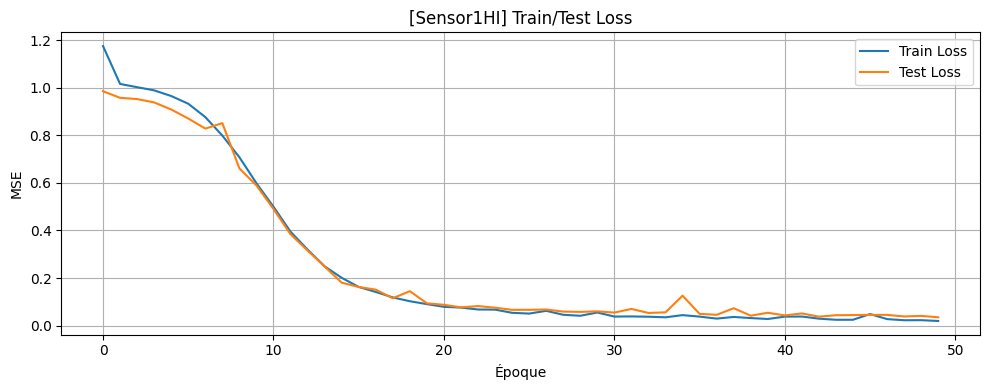

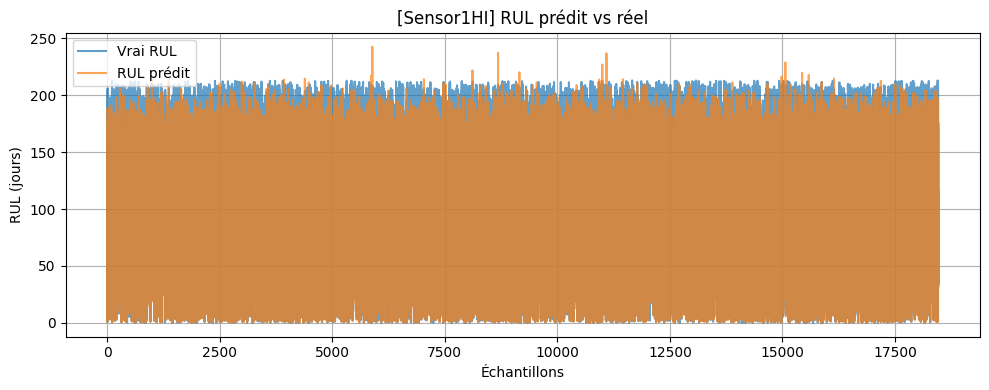


📡 Capteur : Sensor2HI
🔍 Test combinaison: {'lstm_hidden': 128, 'dropout_rate': 0.2, 'lr': 0.001}
Epoch 1/50 | Train Loss: 1.6659 | Test Loss: 1.5342
Epoch 2/50 | Train Loss: 1.5579 | Test Loss: 1.5439
Epoch 3/50 | Train Loss: 1.5575 | Test Loss: 1.5295
Epoch 4/50 | Train Loss: 1.5542 | Test Loss: 1.5293
Epoch 5/50 | Train Loss: 1.5509 | Test Loss: 1.5473
Epoch 6/50 | Train Loss: 1.5549 | Test Loss: 1.5321
Epoch 7/50 | Train Loss: 1.5505 | Test Loss: 1.5315
Epoch 8/50 | Train Loss: 1.5489 | Test Loss: 1.5301
Epoch 9/50 | Train Loss: 1.5491 | Test Loss: 1.5362
Epoch 10/50 | Train Loss: 1.5458 | Test Loss: 1.5313
Epoch 11/50 | Train Loss: 1.5455 | Test Loss: 1.5303
Epoch 12/50 | Train Loss: 1.5432 | Test Loss: 1.5310
Epoch 13/50 | Train Loss: 1.5446 | Test Loss: 1.5311
Epoch 14/50 | Train Loss: 1.5388 | Test Loss: 1.5358
Epoch 15/50 | Train Loss: 1.5409 | Test Loss: 1.5411
Epoch 16/50 | Train Loss: 1.5385 | Test Loss: 1.5302
Epoch 17/50 | Train Loss: 1.5378 | Test Loss: 1.5377
Epoch 18/5

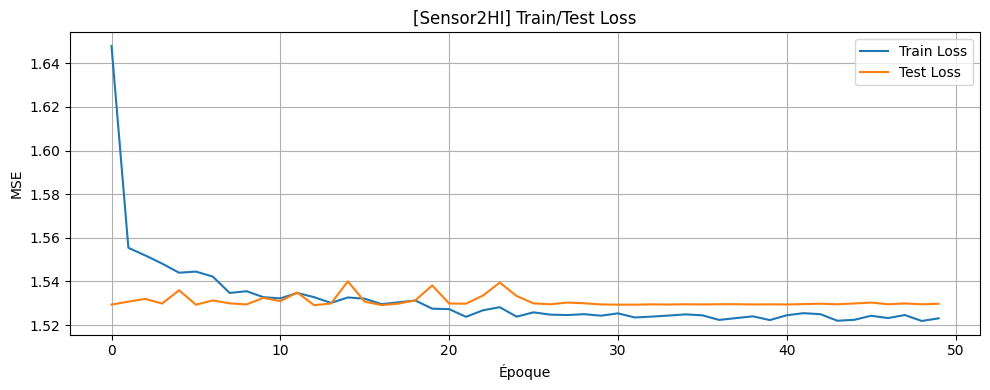

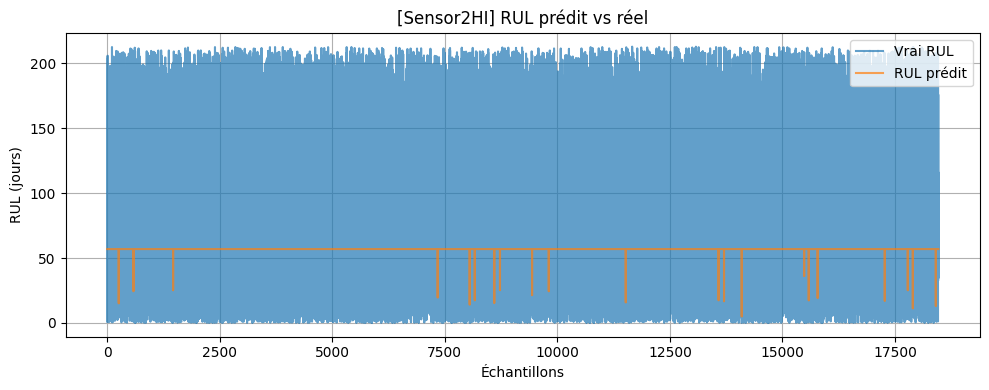


📡 Capteur : Sensor3HI
🔍 Test combinaison: {'lstm_hidden': 128, 'dropout_rate': 0.2, 'lr': 0.001}
Epoch 1/50 | Train Loss: 1.1366 | Test Loss: 1.0941
Epoch 2/50 | Train Loss: 1.1210 | Test Loss: 1.0989
Epoch 3/50 | Train Loss: 1.1174 | Test Loss: 1.0946
Epoch 4/50 | Train Loss: 1.1167 | Test Loss: 1.1003
Epoch 5/50 | Train Loss: 1.1163 | Test Loss: 1.0988
Epoch 6/50 | Train Loss: 1.1158 | Test Loss: 1.0952
Epoch 7/50 | Train Loss: 1.1155 | Test Loss: 1.0942
Epoch 8/50 | Train Loss: 1.1124 | Test Loss: 1.0931
Epoch 9/50 | Train Loss: 1.1123 | Test Loss: 1.0924
Epoch 10/50 | Train Loss: 1.1121 | Test Loss: 1.0960
Epoch 11/50 | Train Loss: 1.1117 | Test Loss: 1.0919
Epoch 12/50 | Train Loss: 1.1107 | Test Loss: 1.0935
Epoch 13/50 | Train Loss: 1.1103 | Test Loss: 1.0925
Epoch 14/50 | Train Loss: 1.1108 | Test Loss: 1.0910
Epoch 15/50 | Train Loss: 1.1092 | Test Loss: 1.0900
Epoch 16/50 | Train Loss: 1.1094 | Test Loss: 1.0901
Epoch 17/50 | Train Loss: 1.1084 | Test Loss: 1.0892
Epoch 18/5

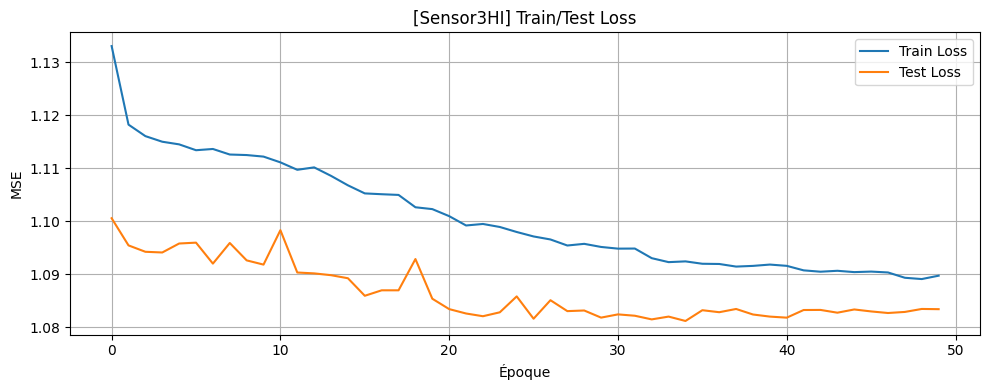

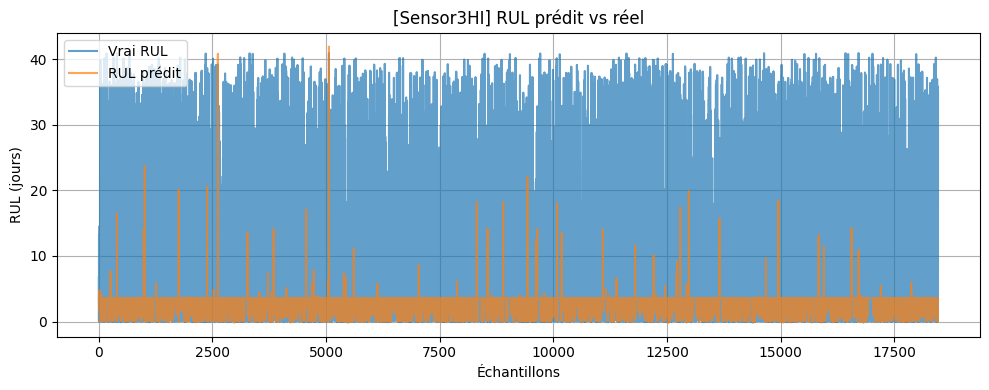


📡 Capteur : Sensor4HI
🔍 Test combinaison: {'lstm_hidden': 128, 'dropout_rate': 0.2, 'lr': 0.001}
Epoch 1/50 | Train Loss: 2.2779 | Test Loss: 2.1846
Epoch 2/50 | Train Loss: 2.2140 | Test Loss: 2.1809
Epoch 3/50 | Train Loss: 2.2075 | Test Loss: 2.1887
Epoch 4/50 | Train Loss: 2.2039 | Test Loss: 2.2016
Epoch 5/50 | Train Loss: 2.2049 | Test Loss: 2.1788
Epoch 6/50 | Train Loss: 2.2066 | Test Loss: 2.1991
Epoch 7/50 | Train Loss: 2.2032 | Test Loss: 2.1831
Epoch 8/50 | Train Loss: 2.2024 | Test Loss: 2.1840
Epoch 9/50 | Train Loss: 2.2001 | Test Loss: 2.1793
Epoch 10/50 | Train Loss: 2.1998 | Test Loss: 2.1808
Epoch 11/50 | Train Loss: 2.1979 | Test Loss: 2.1840
Epoch 12/50 | Train Loss: 2.1960 | Test Loss: 2.1813
Epoch 13/50 | Train Loss: 2.1944 | Test Loss: 2.1798
Epoch 14/50 | Train Loss: 2.1983 | Test Loss: 2.1797
Epoch 15/50 | Train Loss: 2.1964 | Test Loss: 2.1845
Epoch 16/50 | Train Loss: 2.1947 | Test Loss: 2.1789
Epoch 17/50 | Train Loss: 2.1967 | Test Loss: 2.1797
Epoch 18/5

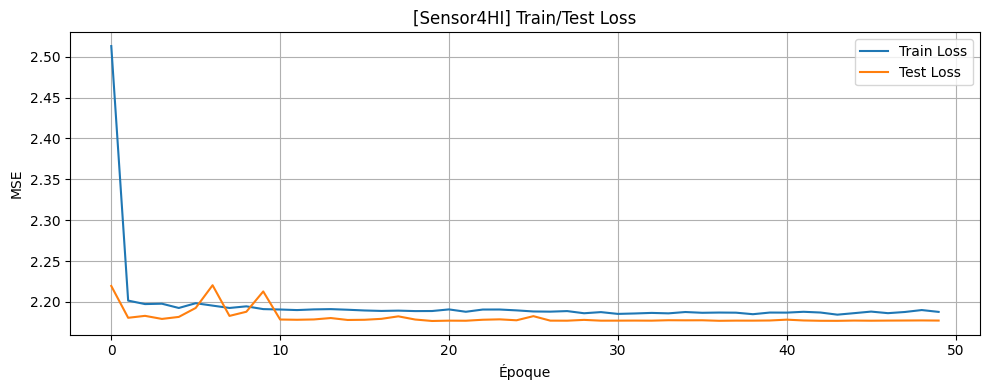

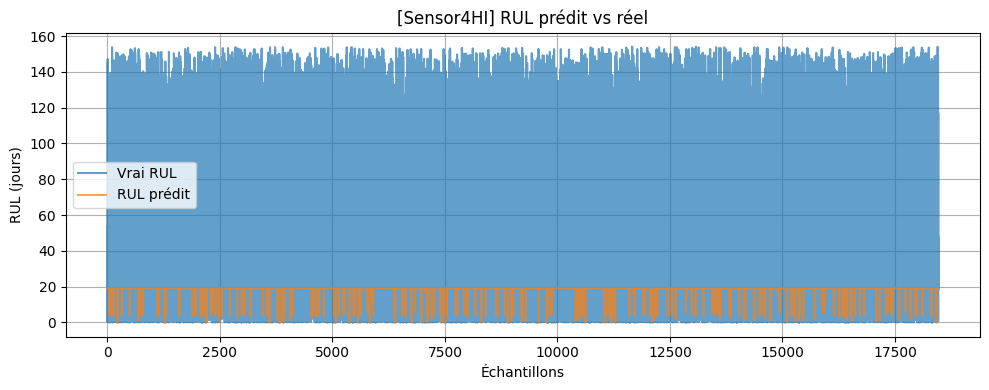


📡 Capteur : Sensor6HI
🔍 Test combinaison: {'lstm_hidden': 128, 'dropout_rate': 0.2, 'lr': 0.001}
Epoch 1/50 | Train Loss: 1.3693 | Test Loss: 1.1524
Epoch 2/50 | Train Loss: 1.2170 | Test Loss: 1.1532
Epoch 3/50 | Train Loss: 1.2141 | Test Loss: 1.1479
Epoch 4/50 | Train Loss: 1.2094 | Test Loss: 1.1611
Epoch 5/50 | Train Loss: 1.2062 | Test Loss: 1.1801
Epoch 6/50 | Train Loss: 1.2110 | Test Loss: 1.1477
Epoch 7/50 | Train Loss: 1.2041 | Test Loss: 1.1481
Epoch 8/50 | Train Loss: 1.2007 | Test Loss: 1.1484
Epoch 9/50 | Train Loss: 1.2006 | Test Loss: 1.1479
Epoch 10/50 | Train Loss: 1.2044 | Test Loss: 1.1488
Epoch 11/50 | Train Loss: 1.2016 | Test Loss: 1.1801
Epoch 12/50 | Train Loss: 1.2030 | Test Loss: 1.1481
Epoch 13/50 | Train Loss: 1.1949 | Test Loss: 1.1628
Epoch 14/50 | Train Loss: 1.1922 | Test Loss: 1.1500
Epoch 15/50 | Train Loss: 1.1951 | Test Loss: 1.1478
Epoch 16/50 | Train Loss: 1.1943 | Test Loss: 1.1600
Epoch 17/50 | Train Loss: 1.1919 | Test Loss: 1.1485
Epoch 18/5

KeyboardInterrupt: 

In [42]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools

# ==== CONFIGURATION ====
SEQ_LEN = 40
BATCH_SIZE = 64
EPOCHS = 50
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
FILE = "10_Sensor_Data_with_Rul.xlsx"
SENSOR_SHEETS = [f"Sensor{i}HI" for i in [1,2,3,4,6,7,8,9,10,11]]

# ==== DATASET ====
class SensorDataset(Dataset):
    def __init__(self, sequences, targets):
        self.sequences = sequences
        self.targets = targets
    def __len__(self):
        return len(self.sequences)
    def __getitem__(self, idx):
        return (torch.tensor(self.sequences[idx], dtype=torch.float32),
                torch.tensor(self.targets[idx], dtype=torch.float32))

# ==== CNN PROFOND + LSTM ====
class CNNLSTMDeep(nn.Module):
    def __init__(self, lstm_hidden=128, dropout_rate=0.3):
        super(CNNLSTMDeep, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )
        self.lstm = nn.LSTM(input_size=128, hidden_size=lstm_hidden, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(lstm_hidden, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.cnn(x)
        x = x.permute(0, 2, 1)
        out, _ = self.lstm(x)
        out = self.dropout(out[:, -1, :])
        return self.fc(out)

# ==== CREATION DES SEQUENCES ====
def create_sequences(data, targets, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(targets[i+seq_len])
    return np.array(X), np.array(y)

# ==== FONCTION D’ENTRAINEMENT ====
def train_and_eval(model, train_loader, test_loader, lr):
    model.to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)
    criterion = nn.MSELoss()
    best_test_loss = float('inf')
    train_losses, test_losses = [], []

    for epoch in range(EPOCHS):
        model.train()
        train_loss = 0
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(DEVICE), yb.to(DEVICE).unsqueeze(1)
            optimizer.zero_grad()
            preds = model(Xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * Xb.size(0)
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for Xb, yb in test_loader:
                Xb, yb = Xb.to(DEVICE), yb.to(DEVICE).unsqueeze(1)
                preds = model(Xb)
                loss = criterion(preds, yb)
                test_loss += loss.item() * Xb.size(0)
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)

        scheduler.step(test_loss)

        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_state_dict = model.state_dict()

        print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

    return best_test_loss, train_losses, test_losses, best_state_dict

# ==== GRID SEARCH ====
grid = {
    "lstm_hidden": [128, 256],
    "dropout_rate": [0.2, 0.3, 0.4],
    "lr": [0.001, 0.0005, 0.0001]
}
grid_combinations = list(itertools.product(*grid.values()))
param_names = list(grid.keys())

# ==== BOUCLE CAPTEUR PAR CAPTEUR ====
for sheet in SENSOR_SHEETS:
    print(f"\n📡 Capteur : {sheet}")
    df = pd.read_excel(FILE, sheet_name=sheet)

    X_raw = df.iloc[:, 2].values.reshape(-1, 1)
    y_raw = np.log1p(df["RUL_jour"].values)

    X_mean = X_raw.mean()
    X_std = X_raw.std()
    X_scaled = ((X_raw - X_mean) / X_std).flatten()

    X_seq, y_seq = create_sequences(X_scaled, y_raw, SEQ_LEN)
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    train_loader = DataLoader(SensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(SensorDataset(X_test, y_test), batch_size=BATCH_SIZE)

    best_loss = float("inf")
    best_params = None
    best_train_losses, best_test_losses, best_weights = [], [], None

    for values in grid_combinations:
        params = dict(zip(param_names, values))
        print(f"🔍 Test combinaison: {params}")
        model = CNNLSTMDeep(lstm_hidden=params['lstm_hidden'], dropout_rate=params['dropout_rate'])
        loss, train_losses, test_losses, weights = train_and_eval(model, train_loader, test_loader, params['lr'])

        print(f"    ➤ Test Loss: {loss:.4f}")
        if loss < best_loss:
            best_loss = loss
            best_params = params
            best_train_losses = train_losses
            best_test_losses = test_losses
            best_weights = weights

    print(f"\n✅ Meilleure configuration pour {sheet} : {best_params}")
    print(f"🏆 Meilleure Test Loss : {best_loss:.4f}")

    model = CNNLSTMDeep(**{k: best_params[k] for k in ['lstm_hidden', 'dropout_rate']})
    model.load_state_dict(best_weights)
    model.to(DEVICE)

    # === Courbe des pertes
    plt.figure(figsize=(10, 4))
    plt.plot(best_train_losses, label="Train Loss")
    plt.plot(best_test_losses, label="Test Loss")
    plt.xlabel("Époque")
    plt.ylabel("MSE")
    plt.title(f"[{sheet}] Train/Test Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Prédictions finales
    model.eval()
    preds = []
    with torch.no_grad():
        for Xb, _ in test_loader:
            Xb = Xb.to(DEVICE)
            out = model(Xb)
            preds.extend(out.cpu().numpy().flatten())

    preds = np.expm1(preds)
    y_true = np.expm1(y_test[:len(preds)])

    plt.figure(figsize=(10, 4))
    plt.plot(y_true, label="Vrai RUL", alpha=0.7)
    plt.plot(preds, label="RUL prédit", alpha=0.7)
    plt.xlabel("Échantillons")
    plt.ylabel("RUL (jours)")
    plt.title(f"[{sheet}] RUL prédit vs réel")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [59]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn.functional as F
import math, random

# === Prétraitement ===
def normalize_and_segment(file_path, sheet_name, feature_col, target_col, window_size=60, step=5):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df.columns = df.columns.str.strip()
    scaler = StandardScaler()
    df[feature_col] = scaler.fit_transform(df[[feature_col]])
    segments, targets = [], []
    for i in range(0, len(df) - window_size + 1, step):
        segment = df[feature_col].iloc[i:i+window_size].values
        target = np.log1p(df[target_col].iloc[i + window_size - 1])  # log1p pour stabiliser
        segments.append(segment)
        targets.append(target)
    return np.array(segments), np.array(targets)

# === Dataset ===
class SensorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# === Attention Layer ===
class Attention(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.attn = nn.Linear(dim, 1)

    def forward(self, x):
        weights = F.softmax(self.attn(x), dim=1)  # [B, T, 1]
        weighted = (x * weights).sum(dim=1)
        return weighted

# === Modèle amélioré avec Attention
class HybridModelV2(nn.Module):
    def __init__(self, transformer_dim=32, dropout=0.3):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(1, 64, 5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Conv1d(64, 128, 3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(2),
        )
        self.flatten = nn.Flatten()
        self.fc_cnn = nn.Linear(128 * 30, 64)

        self.embed = nn.Linear(1, transformer_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=transformer_dim, nhead=4, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=1)

        self.lstm = nn.LSTM(input_size=transformer_dim, hidden_size=64, num_layers=1, batch_first=True)
        self.attn = Attention(64)
        self.dropout = nn.Dropout(dropout)

        self.fc_out = nn.Sequential(
            nn.Linear(64 + 64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        cnn_feat = self.cnn(x.permute(0, 2, 1))
        cnn_out = self.fc_cnn(self.flatten(cnn_feat))

        x_embed = self.embed(x)
        x_trans = self.transformer(x_embed)
        lstm_out, _ = self.lstm(x_trans)
        attn_out = self.attn(lstm_out)

        combined = torch.cat([cnn_out, attn_out], dim=1)
        return self.fc_out(self.dropout(combined)).squeeze(1)

# === Custom Loss Function (mixte) ===
def custom_loss(y_pred, y_true):
    rmse = torch.sqrt(F.mse_loss(y_pred, y_true))
    smooth = F.smooth_l1_loss(y_pred, y_true)
    return 0.6 * rmse + 0.4 * smooth

# === Évaluation ===
def evaluate(model, loader, device):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            pred = model(xb).cpu().numpy()
            y_true.extend(yb.numpy())
            y_pred.extend(pred)
    y_true = np.expm1(np.array(y_true))
    y_pred = np.expm1(np.array(y_pred))
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    s_score = np.mean(np.exp(-np.abs(y_pred - y_true) / (y_true + 1e-6)))
    return rmse, s_score, y_true, y_pred

# === Entraînement Principal ===
def train_model(file_path, sheet, feature_col, target_col, device):
    X, y = normalize_and_segment(file_path, sheet, feature_col, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    train_loader = DataLoader(SensorDataset(X_train, y_train), batch_size=32, shuffle=True)
    test_loader = DataLoader(SensorDataset(X_test, y_test), batch_size=32)

    model = HybridModelV2().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.0003)
    scheduler = CosineAnnealingLR(optimizer, T_max=10)

    best_loss = float('inf')
    patience = 10
    patience_counter = 0
    train_losses, test_losses = [], []

    for epoch in range(1, 101):
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            pred = model(xb)
            loss = custom_loss(pred, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_loss = total_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                val_loss += custom_loss(pred, yb).item()
        val_loss /= len(test_loader)
        test_losses.append(val_loss)
        scheduler.step()

        print(f"Epoch {epoch}/100 - Train Loss: {train_loss:.4f} - Test Loss: {val_loss:.4f}")

        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("⏹️ Early stopping triggered.")
                break

    rmse, s_score, y_true, y_pred = evaluate(model, test_loader, device)

    # Courbes
    plt.figure()
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.legend()
    plt.grid()
    plt.title("Train/Test Loss")
    plt.savefig(f"loss_curve_{sheet}.png")
    plt.close()

    plt.figure()
    plt.plot(y_true, label="RUL réel")
    plt.plot(y_pred, label="RUL prédit")
    plt.legend()
    plt.grid()
    plt.title("RUL Prédit vs Réel")
    plt.savefig(f"prediction_{sheet}.png")
    plt.close()

    return rmse, s_score

# === Main ===
if __name__ == "__main__":
    file_path = "10_Sensor_Data_with_Rul2.xlsx"
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    capteurs = [
        ("Sensor1HI", "Temp échappement Droit 540", "RUL_jour"),
        ("Sensor2HI", "Temp échappement gauche 538", "RUL_jour"),
        ("Sensor3HI", "Temp liquide refroidissement 525", "RUL_jour"),
        ("Sensor4HI", "Temp sortie convertisseur 544", "RUL_jour"),
        ("Sensor6HI", "Température Essieux avant 531", "RUL_jour"),
        ("Sensor7HI", "Régime moteur 530", "RUL_jour"),
        ("Sensor8HI", "Température huile direction 541", "RUL_jour"),
        ("Sensor9HI", "Température huile freinage 522", "RUL_jour"),
        ("Sensor10HI", "Température PTO avant 532", "RUL_jour"),
        ("Sensor11HI", "Pression huile moteur 529", "RUL_jour"),
    ]

    for sheet, feat_col, target_col in capteurs:
        print(f"\n📡 Capteur: {sheet}")
        rmse, s_score = train_model(file_path, sheet, feat_col, target_col, device)
        print(f"📊 Résultats: RMSE={rmse:.4f}, S-Score={s_score:.4f}")



📡 Capteur: Sensor1HI
Epoch 1/100 - Train Loss: 0.3788 - Test Loss: 0.0908
Epoch 2/100 - Train Loss: 0.3617 - Test Loss: 0.0775
Epoch 3/100 - Train Loss: 0.3533 - Test Loss: 0.0984
Epoch 4/100 - Train Loss: 0.3460 - Test Loss: 0.0922
Epoch 5/100 - Train Loss: 0.3411 - Test Loss: 0.0919
Epoch 6/100 - Train Loss: 0.3371 - Test Loss: 0.0817
Epoch 7/100 - Train Loss: 0.3309 - Test Loss: 0.0870
Epoch 8/100 - Train Loss: 0.3264 - Test Loss: 0.0861
Epoch 9/100 - Train Loss: 0.3197 - Test Loss: 0.0828
Epoch 10/100 - Train Loss: 0.3160 - Test Loss: 0.0818
Epoch 11/100 - Train Loss: 0.3169 - Test Loss: 0.0800
Epoch 12/100 - Train Loss: 0.3166 - Test Loss: 0.0827
⏹️ Early stopping triggered.
📊 Résultats: RMSE=0.2682, S-Score=0.2086

📡 Capteur: Sensor2HI
Epoch 1/100 - Train Loss: 0.0185 - Test Loss: 0.0039
Epoch 2/100 - Train Loss: 0.0086 - Test Loss: 0.0007
Epoch 3/100 - Train Loss: 0.0077 - Test Loss: 0.0005
Epoch 4/100 - Train Loss: 0.0072 - Test Loss: 0.0002
Epoch 5/100 - Train Loss: 0.0065 - 

ValueError: Worksheet named 'Sensor5HI' not found

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader
import random

# === Prétraitement ===
def normalize_and_segment_from_sheet(file_path, sheet_name, capteur_col, target_col, window_size=60, step=5):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df.columns = df.columns.str.strip()
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[capteur_col] = scaler.fit_transform(df[[capteur_col]])
    X_segments, y_targets = [], []
    for start in range(0, len(df_scaled) - window_size + 1, step):
        segment = df_scaled[capteur_col].iloc[start:start + window_size].values
        target = df_scaled[target_col].iloc[start + window_size - 1]
        X_segments.append(segment)
        y_targets.append(target)
    return np.array(X_segments), np.array(y_targets)

# === Dataset ===
class CapteurDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# === Modèle hybride CNN + Transformer + LSTM avec embedding ===
class HybridModel(nn.Module):
    def __init__(self, input_dim=1, window_size=60, transformer_dim=16):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(input_dim, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
        )
        cnn_output_dim = (window_size // 4) * 128
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(cnn_output_dim, 64)

        self.embedding = nn.Linear(1, transformer_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=transformer_dim, nhead=4, dim_feedforward=128, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)

        self.lstm = nn.LSTM(input_size=transformer_dim, hidden_size=128, num_layers=2, batch_first=True, dropout=0.3)

        self.fc_out = nn.Sequential(
            nn.Linear(64 + 128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        cnn_feat = self.cnn(x.permute(0, 2, 1))
        cnn_flat = self.flatten(cnn_feat)
        cnn_out = self.fc1(cnn_flat)

        x_embed = self.embedding(x)
        lstm_out, _ = self.lstm(x_embed)

        combined = torch.cat([cnn_out, lstm_out[:, -1, :]], dim=1)
        return self.fc_out(combined).squeeze(1)

# === Évaluation ===
def evaluate_model(model, test_loader, device):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            preds = model(xb).cpu().numpy()
            y_true.extend(yb.numpy())
            y_pred.extend(preds)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    s_score = np.mean(np.exp(-np.abs(y_pred - y_true) / (y_true + 1e-6)))
    return rmse, s_score, y_true, y_pred

# === Entraînement + courbes ===
def train_and_tune(file_path, sheet_name, capteur_col, target_col, device, n_trials=3, final_epochs=20):
    print(f"📄 Traitement : {sheet_name} ({capteur_col})")
    X, y = normalize_and_segment_from_sheet(file_path, sheet_name, capteur_col, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    best_rmse = float("inf")
    best_config = {}

    for trial in range(n_trials):
        lr = random.choice([0.001, 0.0005])
        batch_size = random.choice([32, 64])

        train_loader = DataLoader(CapteurDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(CapteurDataset(X_test, y_test), batch_size=batch_size)

        model = HybridModel().to(device)
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
        criterion = nn.SmoothL1Loss()

        for _ in range(40):
            model.train()
            for xb, yb in train_loader:
                xb, yb = xb.to(device), yb.to(device)
                optimizer.zero_grad()
                loss = criterion(model(xb), yb)
                loss.backward()
                optimizer.step()

        rmse, s_score, _, _ = evaluate_model(model, test_loader, device)
        print(f"Trial {trial+1}: lr={lr}, batch={batch_size} → RMSE={rmse:.4f}, S-Score={s_score:.4f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_config = {"lr": lr, "batch_size": batch_size}

    print(f"🎯 Meilleure config: LR={best_config['lr']}, Batch={best_config['batch_size']}")

    train_loader = DataLoader(CapteurDataset(X_train, y_train), batch_size=best_config["batch_size"], shuffle=True)
    test_loader = DataLoader(CapteurDataset(X_test, y_test), batch_size=best_config["batch_size"])
    model = HybridModel().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=best_config["lr"])
    criterion = nn.SmoothL1Loss()

    train_losses, test_losses = [], []

    for epoch in range(final_epochs):
        model.train()
        epoch_train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
        train_losses.append(epoch_train_loss / len(train_loader))

        model.eval()
        epoch_test_loss = 0
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb)
                loss = criterion(preds, yb)
                epoch_test_loss += loss.item()
        test_losses.append(epoch_test_loss / len(test_loader))

        print(f"✅ Epoch {epoch+1}/{final_epochs} - Train Loss: {train_losses[-1]:.4f} | Test Loss: {test_losses[-1]:.4f}")

    final_rmse, final_s_score, y_true, y_pred = evaluate_model(model, test_loader, device)

    # Courbes
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label='Train Loss', marker='o')
    plt.plot(test_losses, label='Test Loss', marker='x')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Train/Test Loss - {sheet_name}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"loss_curves_{sheet_name}.png")
    plt.close()

    plt.figure(figsize=(8, 5))
    plt.plot(y_true, label='RUL réel')
    plt.plot(y_pred, label='RUL prédit', linestyle='--')
    plt.xlabel("Échantillons")
    plt.ylabel("RUL")
    plt.title(f"RUL prédit vs réel - {sheet_name}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"prediction_{sheet_name}.png")
    plt.close()

    return {
        "sheet": sheet_name,
        "rmse": final_rmse,
        "s_score": final_s_score,
        "lr": best_config["lr"],
        "batch_size": best_config["batch_size"]
    }

# === Boucle principale ===
if __name__ == "__main__":
    file_path = r"C:\Users\user\Desktop\Code UM6P\Analyse\10_Sensor_Data_with_Rul2.xlsx"
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    capteurs = [
        ("Sensor1HI", "Temp échappement Droit 540", "RUL_jour"),
        ("Sensor2HI", "Temp échappement gauche 538", "RUL_jour"),
        ("Sensor3HI", "Temp liquide refroidissement 525", "RUL_jour"),
        ("Sensor4HI", "Temp sortie convertisseur 544", "RUL_jour"),
        ("Sensor6HI", "Température Essieux avant 531", "RUL_jour"),
        ("Sensor7HI", "Régime moteur 530", "RUL_jour"),
        ("Sensor8HI", "Température huile direction 541", "RUL_jour"),
        ("Sensor9HI", "Température huile freinage 522", "RUL_jour"),
        ("Sensor10HI", "Température PTO avant 532", "RUL_jour"),
        ("Sensor11HI", "Pression huile moteur 529", "RUL_jour"),
    ]

    results = []
    for sheet_name, capteur_col, target_col in capteurs:
        metrics = train_and_tune(file_path, sheet_name, capteur_col, target_col, device)
        results.append(metrics)

    print("\n📊 Résumé des résultats finaux :")
    for res in results:
        print(f"{res['sheet']} → RMSE: {res['rmse']:.4f}, S-Score: {res['s_score']:.4f}, LR: {res['lr']}, Batch: {res['batch_size']}")


📄 Traitement : Sensor1HI (Temp échappement Droit 540)
Trial 1: lr=0.0005, batch=32 → RMSE=0.4804, S-Score=0.1484
Trial 2: lr=0.0005, batch=32 → RMSE=0.3880, S-Score=0.1705
Trial 3: lr=0.0005, batch=64 → RMSE=0.3770, S-Score=0.1487
🎯 Meilleure config: LR=0.0005, Batch=64
✅ Epoch 1/20 - Train Loss: 0.6909 | Test Loss: 0.0320
✅ Epoch 2/20 - Train Loss: 0.6673 | Test Loss: 0.0363
✅ Epoch 3/20 - Train Loss: 0.6605 | Test Loss: 0.0326
✅ Epoch 4/20 - Train Loss: 0.6565 | Test Loss: 0.0371
✅ Epoch 5/20 - Train Loss: 0.6448 | Test Loss: 0.0307
✅ Epoch 6/20 - Train Loss: 0.6403 | Test Loss: 0.0352
✅ Epoch 7/20 - Train Loss: 0.6343 | Test Loss: 0.0283
✅ Epoch 8/20 - Train Loss: 0.6203 | Test Loss: 0.0262
✅ Epoch 9/20 - Train Loss: 0.6131 | Test Loss: 0.0473
✅ Epoch 10/20 - Train Loss: 0.6000 | Test Loss: 0.0505
✅ Epoch 11/20 - Train Loss: 0.5922 | Test Loss: 0.0320
✅ Epoch 12/20 - Train Loss: 0.5866 | Test Loss: 0.0253
✅ Epoch 13/20 - Train Loss: 0.5654 | Test Loss: 0.0343
✅ Epoch 14/20 - Train L

ValueError: Worksheet named 'Sensor5HI' not found

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (LSTM, Dense, Dropout, BatchNormalization, 
                                   Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D,
                                   Flatten, Input, concatenate, GlobalAveragePooling1D,
                                   SeparableConv1D, DepthwiseConv1D)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

def segment_signal(x, window_size):
    """Création de séquences avec chevauchement"""
    segments = []
    for i in range(len(x) - window_size + 1):
        segments.append(x[i:i+window_size])
    return np.array(segments)

def create_features(df, capteur_col):
    """Création de features engineered"""
    # Features statistiques sur fenêtre glissante
    window_sizes = [5, 10, 20]
    
    for w in window_sizes:
        df[f'{capteur_col}_mean_{w}'] = df[capteur_col].rolling(window=w, min_periods=1).mean()
        df[f'{capteur_col}_std_{w}'] = df[capteur_col].rolling(window=w, min_periods=1).std()
        df[f'{capteur_col}_min_{w}'] = df[capteur_col].rolling(window=w, min_periods=1).min()
        df[f'{capteur_col}_max_{w}'] = df[capteur_col].rolling(window=w, min_periods=1).max()
    
    # Tendance (différences)
    df[f'{capteur_col}_diff1'] = df[capteur_col].diff(1).fillna(0)
    df[f'{capteur_col}_diff2'] = df[capteur_col].diff(2).fillna(0)
    
    # Features temporelles
    if 'Heure' in df.columns:
        df['heure_sin'] = np.sin(2 * np.pi * df.index / len(df))
        df['heure_cos'] = np.cos(2 * np.pi * df.index / len(df))
    
    return df

def create_cnn_model(window_size, n_features):
    """Modèle CNN pur pour extraction de features"""
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(window_size, n_features)),
        BatchNormalization(),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        
        Conv1D(128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        
        Conv1D(256, kernel_size=3, activation='relu'),
        GlobalAveragePooling1D(),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1)
    ])
    return model

def create_cnn_lstm_model(window_size, n_features, architecture='parallel'):
    """Modèles hybrides CNN-LSTM"""
    
    if architecture == 'sequential':
        # Architecture séquentielle : CNN puis LSTM
        model = Sequential([
            Conv1D(64, kernel_size=3, activation='relu', input_shape=(window_size, n_features)),
            BatchNormalization(),
            Conv1D(64, kernel_size=3, activation='relu'),
            MaxPooling1D(pool_size=2),
            Dropout(0.3),
            
            Conv1D(128, kernel_size=3, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            # LSTM après CNN
            LSTM(128, return_sequences=True),
            Dropout(0.3),
            LSTM(64),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    
    elif architecture == 'parallel':
        # Architecture parallèle : CNN et LSTM séparés puis fusion
        input_layer = Input(shape=(window_size, n_features))
        
        # Branche CNN
        cnn_branch = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
        cnn_branch = BatchNormalization()(cnn_branch)
        cnn_branch = Conv1D(64, kernel_size=3, activation='relu')(cnn_branch)
        cnn_branch = MaxPooling1D(pool_size=2)(cnn_branch)
        cnn_branch = Dropout(0.3)(cnn_branch)
        cnn_branch = Conv1D(128, kernel_size=3, activation='relu')(cnn_branch)
        cnn_branch = GlobalAveragePooling1D()(cnn_branch)
        cnn_branch = Dense(64, activation='relu')(cnn_branch)
        cnn_branch = Dropout(0.3)(cnn_branch)
        
        # Branche LSTM
        lstm_branch = Bidirectional(LSTM(128, return_sequences=True))(input_layer)
        lstm_branch = Dropout(0.3)(lstm_branch)
        lstm_branch = Bidirectional(LSTM(64))(lstm_branch)
        lstm_branch = Dropout(0.3)(lstm_branch)
        lstm_branch = Dense(64, activation='relu')(lstm_branch)
        lstm_branch = Dropout(0.3)(lstm_branch)
        
        # Fusion des branches
        merged = concatenate([cnn_branch, lstm_branch])
        merged = Dense(128, activation='relu')(merged)
        merged = BatchNormalization()(merged)
        merged = Dropout(0.4)
        merged = Dense(64, activation='relu')(merged)
        merged = Dropout(0.3)(merged)
        output = Dense(1)(merged)
        
        model = Model(inputs=input_layer, outputs=output)
    
    elif architecture == 'multi_scale_cnn':
        # CNN multi-échelle avec différentes tailles de filtres
        input_layer = Input(shape=(window_size, n_features))
        
        # Différentes échelles de convolution
        conv1 = Conv1D(32, kernel_size=3, activation='relu', padding='same')(input_layer)
        conv1 = BatchNormalization()(conv1)
        
        conv2 = Conv1D(32, kernel_size=5, activation='relu', padding='same')(input_layer)
        conv2 = BatchNormalization()(conv2)
        
        conv3 = Conv1D(32, kernel_size=7, activation='relu', padding='same')(input_layer)
        conv3 = BatchNormalization()(conv3)
        
        # Fusion des différentes échelles
        merged_conv = concatenate([conv1, conv2, conv3])
        merged_conv = MaxPooling1D(pool_size=2)(merged_conv)
        merged_conv = Dropout(0.3)(merged_conv)
        
        # Couches CNN supplémentaires
        x = Conv1D(128, kernel_size=3, activation='relu')(merged_conv)
        x = BatchNormalization()(x)
        x = Conv1D(128, kernel_size=3, activation='relu')(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = Dropout(0.3)(x)
        
        # LSTM final
        x = LSTM(128, return_sequences=True)(x)
        x = Dropout(0.3)(x)
        x = LSTM(64)(x)
        x = Dropout(0.3)(x)
        
        # Couches denses finales
        x = Dense(128, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.4)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.3)(x)
        output = Dense(1)(x)
        
        model = Model(inputs=input_layer, outputs=output)
    
    elif architecture == 'depthwise_separable':
        # CNN avec convolutions séparables (plus efficace)
        model = Sequential([
            SeparableConv1D(64, kernel_size=3, activation='relu', input_shape=(window_size, n_features)),
            BatchNormalization(),
            SeparableConv1D(64, kernel_size=3, activation='relu'),
            MaxPooling1D(pool_size=2),
            Dropout(0.3),
            
            SeparableConv1D(128, kernel_size=3, activation='relu'),
            BatchNormalization(),
            SeparableConv1D(128, kernel_size=3, activation='relu'),
            MaxPooling1D(pool_size=2),
            Dropout(0.3),
            
            # LSTM après CNN séparable
            LSTM(128, return_sequences=True),
            Dropout(0.3),
            LSTM(64),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    
    else:  # 'residual_cnn_lstm'
        # Architecture avec connexions résiduelles
        input_layer = Input(shape=(window_size, n_features))
        
        # Premier bloc CNN
        x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
        x = BatchNormalization()(x)
        residual1 = x
        
        x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = tf.keras.layers.Add()([x, residual1])  # Connexion résiduelle
        x = MaxPooling1D(pool_size=2)(x)
        x = Dropout(0.3)(x)
        
        # Deuxième bloc CNN
        x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        residual2 = x
        
        x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = tf.keras.layers.Add()([x, residual2])  # Connexion résiduelle
        x = MaxPooling1D(pool_size=2)(x)
        x = Dropout(0.3)(x)
        
        # LSTM
        x = Bidirectional(LSTM(128, return_sequences=True))(x)
        x = Dropout(0.3)(x)
        x = Bidirectional(LSTM(64))(x)
        x = Dropout(0.3)(x)
        
        # Couches finales
        x = Dense(128, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.4)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.3)(x)
        output = Dense(1)(x)
        
        model = Model(inputs=input_layer, outputs=output)
    
    return model

def create_improved_model(window_size, n_features, architecture='bidirectional'):
    """Modèles LSTM classiques (de l'ancien code)"""
    if architecture == 'bidirectional':
        model = Sequential([
            Bidirectional(LSTM(128, return_sequences=True), input_shape=(window_size, n_features)),
            Dropout(0.3),
            Bidirectional(LSTM(64)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    else:
        model = Sequential([
            LSTM(128, activation='tanh', input_shape=(window_size, n_features)),
            Dropout(0.4),
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(16, activation='relu'),
            Dense(1)
        ])
    
    return model

# Charger les données
file_path = r"C:\Users\user\Desktop\Code UM6P\Analyse\10_Sensor_Data_with_Rul2.xlsx"
sheet = "Sensor1HI"
df = pd.read_excel(file_path, sheet_name=sheet)
df = df.sort_values('Heure').reset_index(drop=True)

# Feature engineering
capteur_col = df.columns[2]
df = create_features(df, capteur_col)

# Sélection des features
feature_cols = [col for col in df.columns if col not in ['Heure', 'RUL_jour'] and not df[col].isna().all()]
X_features = df[feature_cols].fillna(method='ffill').fillna(method='bfill').values
y_target = df['RUL_jour'].values.reshape(-1, 1)

print(f"Nombre de features utilisées: {len(feature_cols)}")
print(f"Features: {feature_cols[:5]}...")

# Configuration des tests
scalers = {
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

# Architectures à tester (CNN + LSTM + modèles classiques)
architectures = {
    # Modèles CNN purs
    'CNN': 'cnn',
    
    # Modèles hybrides CNN-LSTM
    'CNN-LSTM Sequential': 'sequential',
    'CNN-LSTM Parallel': 'parallel',
    'Multi-Scale CNN-LSTM': 'multi_scale_cnn',
    'Separable CNN-LSTM': 'depthwise_separable',
    'Residual CNN-LSTM': 'residual_cnn_lstm',
    
    # Modèles LSTM classiques pour comparaison
    'Bidirectional LSTM': 'bidirectional',
    'Simple LSTM': 'simple'
}

best_r2 = -np.inf
best_config = None
results = []

for scaler_name, scaler_X in scalers.items():
    print(f"\n=== Test avec {scaler_name}Scaler ===")
    
    # Normalisation
    X_scaled = scaler_X.fit_transform(X_features)
    scaler_y = MinMaxScaler()
    y_scaled = scaler_y.fit_transform(y_target)
    
    # Test de différentes tailles de fenêtre
    for window_size in [20, 30, 40]:  # Fenêtres plus grandes pour CNN
        print(f"Fenêtre: {window_size}")
        
        # Création des séquences
        X_seq = segment_signal(X_scaled, window_size)
        y_seq = y_scaled[window_size-1:]
        
        # Reshape pour modèles
        X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], X_seq.shape[2]))
        
        # Split temporel
        split_idx = int(0.8 * len(X_seq))
        X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
        y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]
        
        # Test de toutes les architectures
        for arch_name, arch_type in architectures.items():
            try:
                print(f"  Architecture: {arch_name}")
                
                # Création du modèle selon le type
                if arch_type == 'cnn':
                    model = create_cnn_model(window_size, X_seq.shape[2])
                elif arch_type in ['sequential', 'parallel', 'multi_scale_cnn', 
                                 'depthwise_separable', 'residual_cnn_lstm']:
                    model = create_cnn_lstm_model(window_size, X_seq.shape[2], arch_type)
                else:  # LSTM classiques
                    model = create_improved_model(window_size, X_seq.shape[2], arch_type)
                
                # Optimiseur adapté selon l'architecture
                if 'cnn' in arch_type.lower() or arch_type == 'cnn':
                    optimizer = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999)
                else:
                    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
                
                model.compile(optimizer=optimizer, loss='huber', metrics=['mae'])
                
                # Callbacks
                early_stop = EarlyStopping(
                    monitor='val_loss',
                    patience=20,  # Plus de patience pour CNN
                    restore_best_weights=True,
                    min_delta=0.0005
                )
                
                reduce_lr = ReduceLROnPlateau(
                    monitor='val_loss',
                    factor=0.3,
                    patience=10,
                    min_lr=1e-7,
                    verbose=0
                )
                
                # Entraînement
                history = model.fit(
                    X_train, y_train,
                    epochs=200,  # Plus d'epochs pour CNN
                    batch_size=32,  # Batch size plus petit pour CNN
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr],
                    verbose=0
                )
                
                # Prédiction
                y_pred_scaled = model.predict(X_test, verbose=0)
                y_pred = scaler_y.inverse_transform(y_pred_scaled)
                y_test_real = scaler_y.inverse_transform(y_test)
                
                # Métriques
                rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))
                mae = mean_absolute_error(y_test_real, y_pred)
                r2 = r2_score(y_test_real, y_pred)
                
                result = {
                    'scaler': scaler_name,
                    'window': window_size,
                    'architecture': arch_name,
                    'arch_type': arch_type,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'epochs_trained': len(history.history['loss']),
                    'params': model.count_params()
                }
                results.append(result)
                
                print(f"    RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, Params: {model.count_params()}")
                
                # Sauvegarder le meilleur modèle
                if r2 > best_r2:
                    best_r2 = r2
                    best_config = result.copy()
                    best_model = model
                    best_scaler_X = scaler_X
                    best_scaler_y = scaler_y
                    best_y_pred = y_pred
                    best_y_test = y_test_real
                    best_history = history
                
            except Exception as e:
                print(f"    Erreur avec {arch_name}: {str(e)}")
                continue

# Affichage des résultats
print("\n" + "="*80)
print("RÉSULTATS FINAUX - COMPARAISON CNN vs LSTM vs HYBRIDES")
print("="*80)

results_df = pd.DataFrame(results)
if not results_df.empty:
    results_df = results_df.sort_values('r2', ascending=False)
    
    print("\nTop 10 des configurations:")
    display_cols = ['architecture', 'scaler', 'window', 'rmse', 'mae', 'r2', 'params']
    print(results_df[display_cols].head(10).to_string(index=False))
    
    # Analyse par type d'architecture
    print(f"\n" + "="*50)
    print("ANALYSE PAR TYPE D'ARCHITECTURE")
    print("="*50)
    
    arch_analysis = results_df.groupby('arch_type').agg({
        'r2': ['mean', 'max', 'std'],
        'rmse': ['mean', 'min', 'std'],
        'params': 'mean'
    }).round(4)
    print(arch_analysis)
    
    print(f"\nMeilleure configuration globale:")
    print(f"Architecture: {best_config['architecture']}")
    print(f"Type: {best_config['arch_type']}")
    print(f"Scaler: {best_config['scaler']}")
    print(f"Fenêtre: {best_config['window']}")
    print(f"RMSE: {best_config['rmse']:.4f}")
    print(f"MAE: {best_config['mae']:.4f}")
    print(f"R²: {best_config['r2']:.4f}")
    print(f"Epochs entraînés: {best_config['epochs_trained']}")
    print(f"Nombre de paramètres: {best_config['params']:,}")

    # Visualisations complètes
    plt.figure(figsize=(20, 15))
    
    # 1. Comparaison des R² par architecture
    plt.subplot(3, 4, 1)
    arch_r2 = results_df.groupby('architecture')['r2'].max().sort_values(ascending=True)
    arch_r2.plot(kind='barh', alpha=0.8)
    plt.title('R² maximum par architecture')
    plt.xlabel('R²')
    plt.grid(True, alpha=0.3)
    
    # 2. Courbes de perte du meilleur modèle
    plt.subplot(3, 4, 2)
    plt.plot(best_history.history['loss'], label='Train Loss', alpha=0.8)
    plt.plot(best_history.history['val_loss'], label='Val Loss', alpha=0.8)
    plt.title(f'Courbes de perte\n{best_config["architecture"]}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Prédictions vs Réalité
    plt.subplot(3, 4, 3)
    plt.scatter(best_y_test, best_y_pred, alpha=0.6, s=20)
    plt.plot([best_y_test.min(), best_y_test.max()], 
             [best_y_test.min(), best_y_test.max()], 'r--', lw=2)
    plt.xlabel('RUL Réel')
    plt.ylabel('RUL Prédit')
    plt.title(f'Prédictions vs Réalité\nR² = {best_config["r2"]:.4f}')
    plt.grid(True, alpha=0.3)
    
    # 4. Série temporelle
    plt.subplot(3, 4, 4)
    indices = range(len(best_y_test))
    plt.plot(indices, best_y_test, label='RUL réel', alpha=0.8, linewidth=1.5)
    plt.plot(indices, best_y_pred, label='RUL prédit', alpha=0.8, linestyle='--', linewidth=1.5)
    plt.title('Série temporelle RUL')
    plt.xlabel('Échantillon')
    plt.ylabel('RUL (jours)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 5. Boxplot RMSE par type d'architecture
    plt.subplot(3, 4, 5)
    arch_types = results_df['arch_type'].unique()
    rmse_by_type = [results_df[results_df['arch_type'] == arch]['rmse'].values for arch in arch_types]
    plt.boxplot(rmse_by_type, labels=arch_types)
    plt.title('Distribution RMSE par type')
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 6. Scatter R² vs Nombre de paramètres
    plt.subplot(3, 4, 6)
    colors = {'cnn': 'red', 'sequential': 'blue', 'parallel': 'green', 
              'multi_scale_cnn': 'orange', 'bidirectional': 'purple', 'simple': 'brown'}
    for arch_type in results_df['arch_type'].unique():
        mask = results_df['arch_type'] == arch_type
        plt.scatter(results_df[mask]['params'], results_df[mask]['r2'], 
                   label=arch_type, alpha=0.7, s=30,
                   color=colors.get(arch_type, 'black'))
    plt.xlabel('Nombre de paramètres')
    plt.ylabel('R²')
    plt.title('R² vs Complexité du modèle')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # 7. Résidus
    plt.subplot(3, 4, 7)
    residuals = best_y_test.flatten() - best_y_pred.flatten()
    plt.scatter(best_y_pred, residuals, alpha=0.6, s=20)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('RUL Prédit')
    plt.ylabel('Résidus')
    plt.title('Analyse des résidus')
    plt.grid(True, alpha=0.3)
    
    # 8. Distribution des erreurs
    plt.subplot(3, 4, 8)
    plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
    plt.xlabel('Résidus')
    plt.ylabel('Fréquence')
    plt.title('Distribution des erreurs')
    plt.grid(True, alpha=0.3)
    
    # 9. Temps d'entraînement vs Performance
    plt.subplot(3, 4, 9)
    plt.scatter(results_df['epochs_trained'], results_df['r2'], alpha=0.6, s=30)
    plt.xlabel('Epochs entraînés')
    plt.ylabel('R²')
    plt.title('Convergence vs Performance')
    plt.grid(True, alpha=0.3)
    
    # 10. Heatmap des performances par scaler et architecture
    plt.subplot(3, 4, 10)
    pivot_table = results_df.pivot_table(values='r2', index='architecture', columns='scaler', aggfunc='max')
    plt.imshow(pivot_table.values, cmap='RdYlGn', aspect='auto')
    plt.colorbar(label='R²')
    plt.title('Heatmap R² (Arch vs Scaler)')
    plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=45)
    plt.yticks(range(len(pivot_table.index)), pivot_table.index)
    
    # 11. MAE du meilleur modèle
    if 'mae' in best_history.history:
        plt.subplot(3, 4, 11)
        plt.plot(best_history.history['mae'], label='Train MAE', alpha=0.8)
        plt.plot(best_history.history['val_mae'], label='Val MAE', alpha=0.8)
        plt.title('Mean Absolute Error')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 12. Performance par taille de fenêtre
    plt.subplot(3, 4, 12)
    window_perf = results_df.groupby('window')['r2'].max()
    window_perf.plot(kind='bar', alpha=0.8)
    plt.title('Meilleur R² par taille de fenêtre')
    plt.xlabel('Taille de fenêtre')
    plt.ylabel('R²')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Recommandations spécifiques CNN
    print("\n" + "="*80)
    print("ANALYSE ET RECOMMANDATIONS CNN vs LSTM")
    print("="*80)
    
    cnn_results = results_df[results_df['arch_type'].str.contains('cnn|sequential|parallel')]
    lstm_results = results_df[results_df['arch_type'].str.contains('bidirectional|simple')]
    
    if not cnn_results.empty and not lstm_results.empty:
        best_cnn_r2 = cnn_results['r2'].max()
        best_lstm_r2 = lstm_results['r2'].max()
        
        print(f"Meilleur R² CNN/Hybride: {best_cnn_r2:.4f}")
        print(f"Meilleur R² LSTM pur: {best_lstm_r2:.4f}")
        print(f"Amélioration CNN vs LSTM: {((best_cnn_r2 - best_lstm_r2) / abs(best_lstm_r2) * 100):+.2f}%")
        
        if best_cnn_r2 > best_lstm_r2:
            print("\n✅ Les modèles CNN/Hybrides performent mieux!")
            print("• Les CNN capturent mieux les patterns locaux dans vos données")
            print("• L'architecture parallèle ou séquentielle CNN-LSTM est recommandée")
    else:
            print("\n⚠️  Les LSTM purs restent compétitifs")
    

ModuleNotFoundError: No module named 'tensorflow.python'

In [63]:
pip install tensorflow.python

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.python (from versions: none)
ERROR: No matching distribution found for tensorflow.python

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
